<h1 align = "center"> FINAL NOTEBOOK </h1>

##### The final dataframe was created as Final.csv and it can be found in the data folder

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#for viz
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot_mpl
pyo.init_notebook_mode()
#helpers
import os
os.chdir("../scripts/")
import functions as f
import time_series_functions as ts
os.chdir("../Notebooks/")

## Reading the final dataframe

In [2]:
df = pd.read_csv("../data/Final.csv")
#renaming the index from Unnamed to date
df.rename(columns = {"Unnamed: 0":"date"},inplace=True)
#setting the index
df.set_index("date",inplace=True)
cols = [col.replace(" ","_") for col in df.columns]
df.columns = cols
df

zone_name  hh_zonal  nhh_zonal  residual       year  \
date                                                                      
2007-12-31  Southern Scotland   6.36230    0.83014  14.06150 2007.00000   
2007-12-31           Northern   9.88415    1.28715  14.06150 2007.00000   
2007-12-31         North West  13.64617    1.73489  14.06150 2007.00000   
2007-12-31          Yorkshire  13.61527    1.75063  14.06150 2007.00000   
2007-12-31   N Wales & Mersey  14.08436    1.80580  14.06150 2007.00000   
...                       ...       ...        ...       ...        ...   
2018-12-31        South Wales  45.80441    5.55270  46.93343 2018.00000   
2018-12-31         South East  52.11040    7.71320  46.93343 2018.00000   
2018-12-31             London  54.90668    6.10617  46.93343 2018.00000   
2018-12-31           Southern  53.41981    7.31749  46.93343 2018.00000   
2018-12-31      South Western  51.86752    7.56009  46.93343 2018.00000   

             log_nd  inflation  operation_cost  amortization    revenue  \
date                                                                      
2007-12-31 20.31904    5.58824      1433.00000     245.00000 1991.00000   
2007-12-31 20.31904    5.58824      1433.00000     245.00000 1991.00000   
2007-12-31 20.31904    5.58824      1433.00000     245.00000 1991.00000   
2007-12-31 20.31904    5.58824      1433.00000     245.00000 1991.00000   
2007-12-31 20.31904    5.58824      1433.00000     245.00000 1991.00000   
...             ...        ...             ...           ...        ...   
2018-12-31 20.08758    6.86654      3125.00000     464.00000 4158.00000   
2018-12-31 20.08758    6.86654      3125.00000     464.00000 4158.00000   
2018-12-31 20.08758    6.86654      3125.00000     464.00000 4158.00000   
2018-12-31 20.08758    6.86654      3125.00000     464.00000 4158.00000   
2018-12-31 20.08758    6.86654      3125.00000     464.00000 4158.00000   

            total_liabilities  net_payroll_costs  number_of_employees  \
date                                                                    
2007-12-31         5887.00000           89.00000           2073.00000   
2007-12-31         5887.00000           89.00000           2073.00000   
2007-12-31         5887.00000           89.00000           2073.00000   
2007-12-31         5887.00000           89.00000           2073.00000   
2007-12-31         5887.00000           89.00000           2073.00000   
...                       ...                ...                  ...   
2018-12-31        10682.00000          181.00000           3679.00000   
2018-12-31        10682.00000          181.00000           3679.00000   
2018-12-31        10682.00000          181.00000           3679.00000   
2018-12-31        10682.00000          181.00000           3679.00000   
2018-12-31        10682.00000          181.00000           3679.00000   

                 tax  adj_close          volume  
date                                             
2007-12-31 126.00000  393.19169 319381706.75000  
2007-12-31 126.00000  393.19169 319381706.75000  
2007-12-31 126.00000  393.19169 319381706.75000  
2007-12-31 126.00000  393.19169 319381706.75000  
2007-12-31 126.00000  393.19169 319381706.75000  
...              ...        ...             ...  
2018-12-31 165.00000  739.53115 215561334.66667  
2018-12-31 165.00000  739.53115 215561334.66667  
2018-12-31 165.00000  739.53115 215561334.66667  
2018-12-31 165.00000  739.53115 215561334.66667  
2018-12-31 165.00000  739.53115 215561334.66667  

[166 rows x 16 columns]

So the final dataframe has data from 2007 until 2018. It captures all the 14 demand zones.

In [3]:
(list(df.zone_name.unique()))

['Southern Scotland',
 'Northern',
 'North West',
 'Yorkshire',
 'N Wales & Mersey',
 'East Midlands',
 'Midlands',
 'Eastern',
 'South Wales',
 'South East',
 'London',
 'Southern',
 'South Western',
 'Northern Scotland']

In [4]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} features')

The dataframe has 166 rows and 16 features


#### Features:
- zone_name -> The name of the demand zone
- hh_zonal -> The Half Hourly Zonal Tariff
- nhh_zonal -> The Not Half Hourly Zonal Tariff
- residual -> The residual
- log_nd -> The national demand but in log10 form
- inflation -> The CPI index
- operation_cost -> The opearation cost for the National Grid(in mil GBP)
- amortization -> Amortization cost for the National Grid(in mil GBP)
- revenue -> Revenue of National Grid(in mil GBP)
- total_liablities -> Total liablilites of National Grid(in mil GBP)
- net_payroll_costs -> Payroll costs from the National Grid(in mil GBP)
- number_of_employees -> Number of employees in the National Grid
- adj_closer-> Adjusted close price of National Grid Stock
- volume -> volume bought of National Grid Stock

#### Showing the demand zones:

In [5]:
zones = list(df.zone_name.unique())
zones
print(f"There are {len(zones)} zones")

There are 14 zones


ZONE NAME


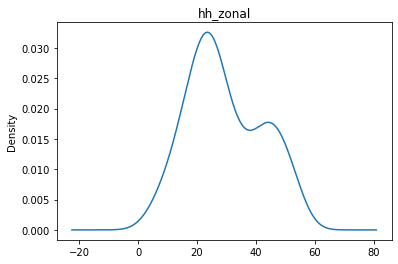

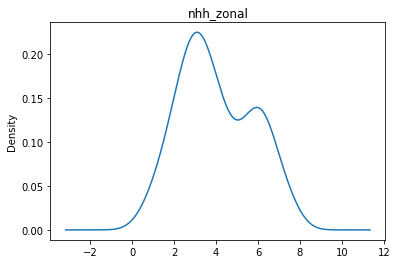

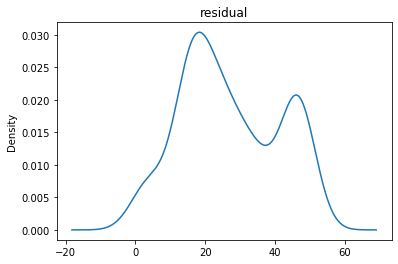

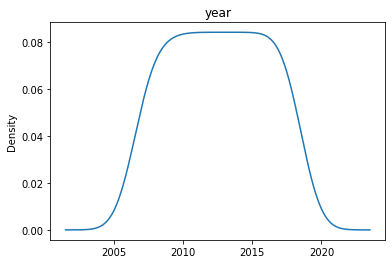

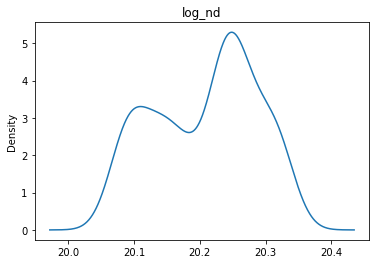

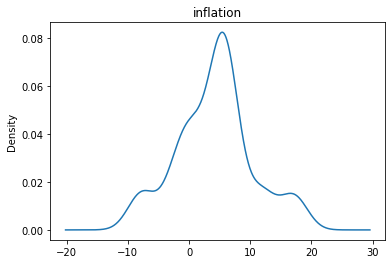

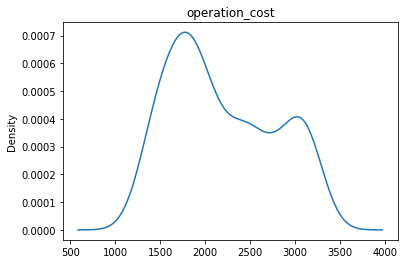

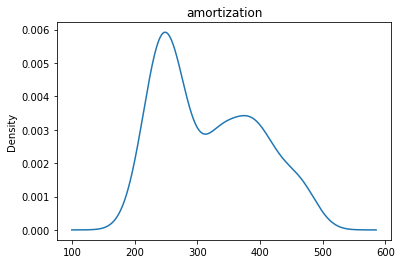

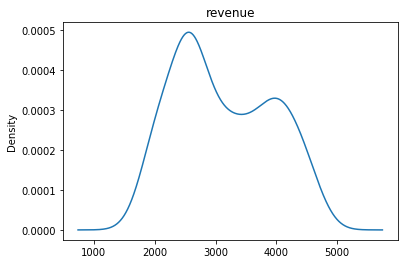

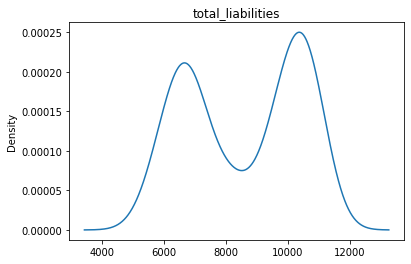

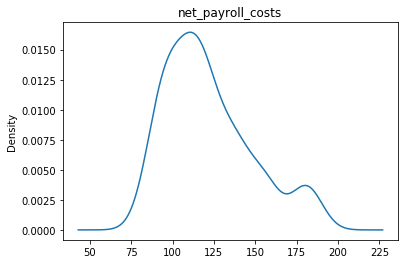

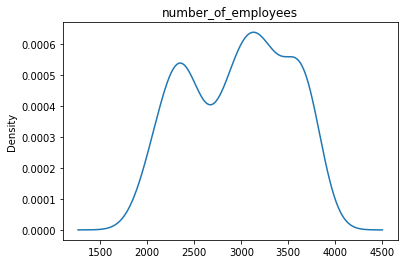

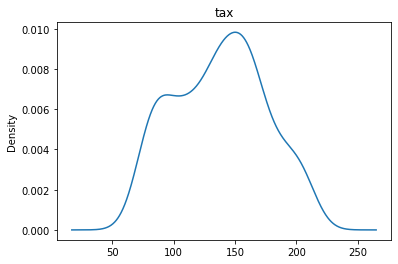

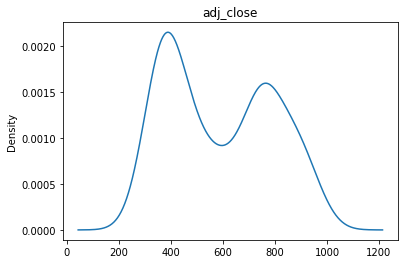

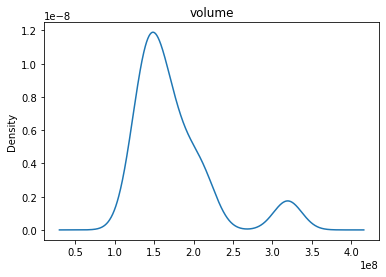

In [6]:
for i in df.columns:
    try:
        df[i].plot.kde()
        plt.title(i)
        plt.show()
    except:
        print("ZONE NAME")

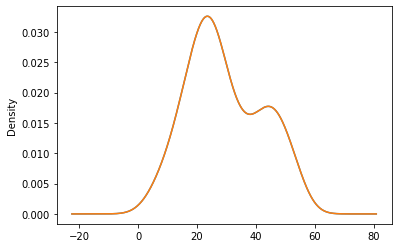

In [7]:
df.hh_zonal.plot.kde()
df["hh_zonal"].plot.kde()

## The Half Hourly zonal tariff from 2007 to 2018

In [10]:
fig = px.line(data_frame=df, x="year", y="hh_zonal", title='HH zonal tariff in UK',color="zone_name")
fig.update_layout(
    yaxis_title="HH Zonal Tariff",
    xaxis_title="Year",
    font=dict(
        size=12,
        color="#000000"
    )
)

In [6]:
df

zone_name   hh_zonal  nhh_zonal   residual    year  \
date                                                                     
2007-12-31  Southern Scotland   6.362303   0.830136  14.061505  2007.0   
2007-12-31           Northern   9.884146   1.287148  14.061505  2007.0   
2007-12-31         North West  13.646168   1.734890  14.061505  2007.0   
2007-12-31          Yorkshire  13.615270   1.750626  14.061505  2007.0   
2007-12-31   N Wales & Mersey  14.084355   1.805802  14.061505  2007.0   
...                       ...        ...        ...        ...     ...   
2018-12-31        South Wales  45.804410   5.552697  46.933426  2018.0   
2018-12-31         South East  52.110398   7.713198  46.933426  2018.0   
2018-12-31             London  54.906683   6.106170  46.933426  2018.0   
2018-12-31           Southern  53.419807   7.317489  46.933426  2018.0   
2018-12-31      South Western  51.867520   7.560093  46.933426  2018.0   

               log_nd  inflation  operation_cost  amortization  revenue  \
date                                                                      
2007-12-31  20.319042   5.588235          1433.0         245.0   1991.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   1991.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   1991.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   1991.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   1991.0   
...               ...        ...             ...           ...      ...   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   

            total_liabilities  net_payroll_costs  number_of_employees    tax  \
date                                                                           
2007-12-31             5887.0               89.0               2073.0  126.0   
2007-12-31             5887.0               89.0               2073.0  126.0   
2007-12-31             5887.0               89.0               2073.0  126.0   
2007-12-31             5887.0               89.0               2073.0  126.0   
2007-12-31             5887.0               89.0               2073.0  126.0   
...                       ...                ...                  ...    ...   
2018-12-31            10682.0              181.0               3679.0  165.0   
2018-12-31            10682.0              181.0               3679.0  165.0   
2018-12-31            10682.0              181.0               3679.0  165.0   
2018-12-31            10682.0              181.0               3679.0  165.0   
2018-12-31            10682.0              181.0               3679.0  165.0   

             adj_close        volume  
date                                  
2007-12-31  393.191688  3.193817e+08  
2007-12-31  393.191688  3.193817e+08  
2007-12-31  393.191688  3.193817e+08  
2007-12-31  393.191688  3.193817e+08  
2007-12-31  393.191688  3.193817e+08  
...                ...           ...  
2018-12-31  739.531153  2.155613e+08  
2018-12-31  739.531153  2.155613e+08  
2018-12-31  739.531153  2.155613e+08  
2018-12-31  739.531153  2.155613e+08  
2018-12-31  739.531153  2.155613e+08  

[166 rows x 16 columns]

In [9]:
fig = px.scatter(data_frame=df, x="log_nd", y="hh_zonal", title='HH zonal tariff in UK and National Demand',color="zone_name")
fig.update_layout(
    yaxis_title="HH Zonal Tariff",
    xaxis_title="National Demand",
    font=dict(
        size=12,
        color="#000000"
    )
)
fig.show()

### From here  we can see that the National Demand and HH tariffs are inversely correlated. That means that HH tariff will move up as ND will move down

### Lets see now how NAtional Grid is affecting HH tariff

#### Plotting Revenue from NG and HH tariff

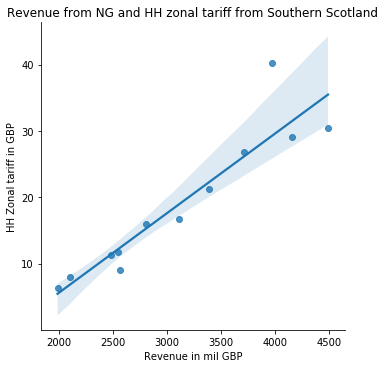

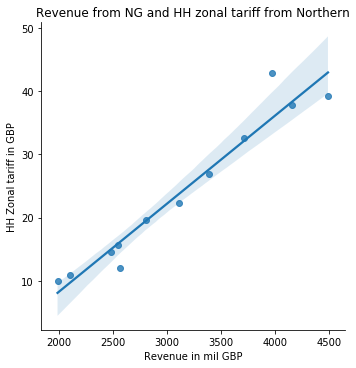

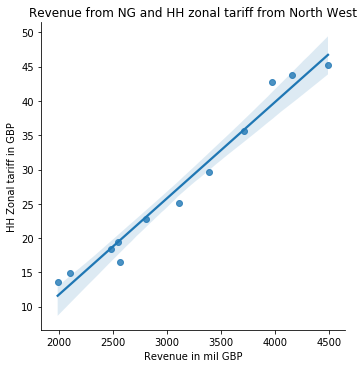

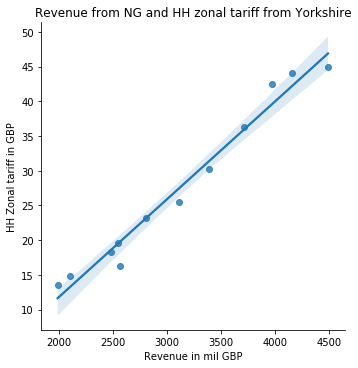

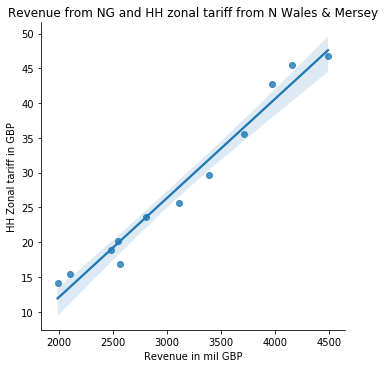

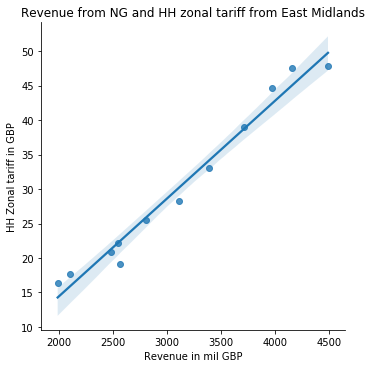

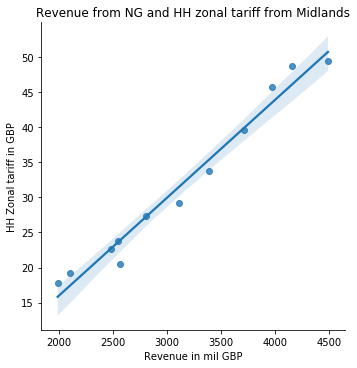

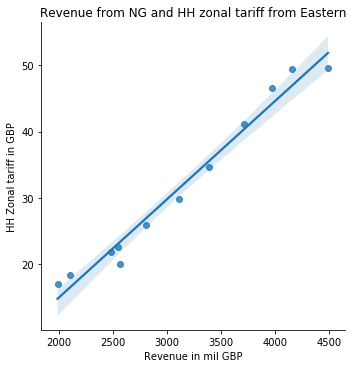

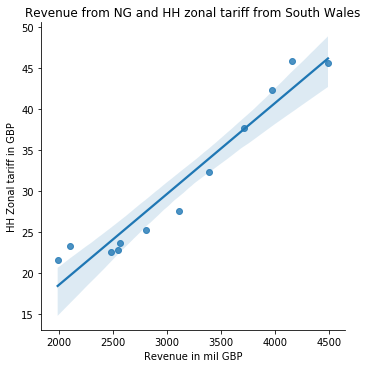

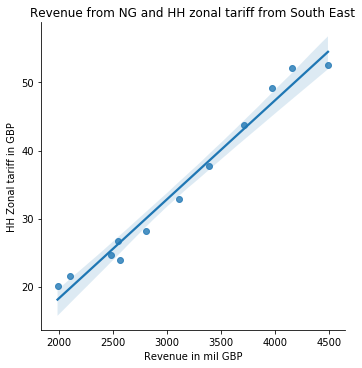

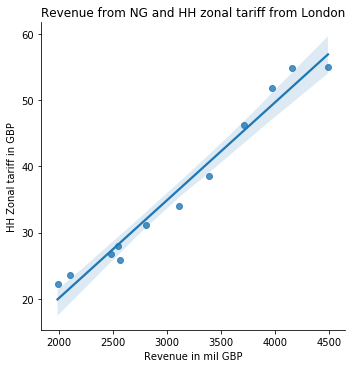

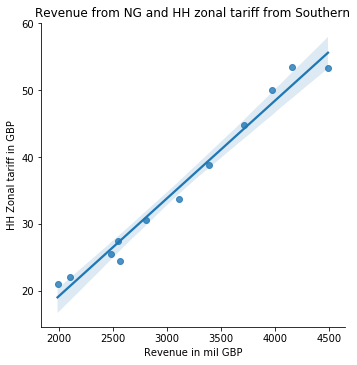

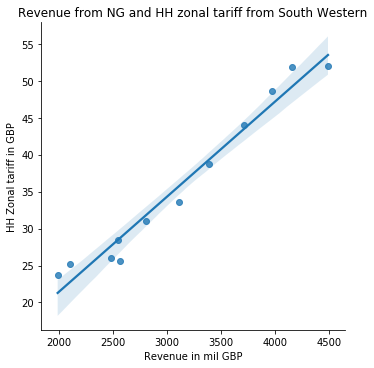

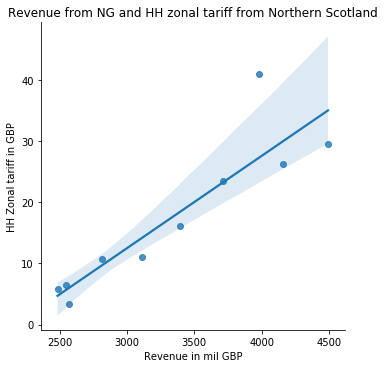

In [8]:
for zone in zones:
    temp = df[df.zone_name == zone]
    sns.lmplot(x = "revenue", y = "hh_zonal",data=temp,height=5)
    plt.title("Revenue from NG and HH zonal tariff from " + zone)
    plt.xlabel("Revenue in mil GBP")
    plt.ylabel("HH Zonal tariff in GBP")

### From the plots above we can see that Revenue and HH tariff are following the trend. Even the CI are small for some demand zones. In other words, Revenue from NG and HH tariff are correlated.

In [23]:
fig=px.scatter(x = "revenue",y="hh_zonal",data_frame=df,color="year",title="National Grid Revenue and Half Hourly zonal tariff by year")
fig.update_layout(
    yaxis_title="HH Zonal Tariff",
    xaxis_title="National Grid Revenue",
    font=dict(
        size=12,
        color="#000000"
    )
)

In [11]:
df

zone_name  hh_zonal  nhh_zonal  residual       year  \
date                                                                      
2007-12-31  Southern Scotland   6.36230    0.83014  14.06150 2007.00000   
2007-12-31           Northern   9.88415    1.28715  14.06150 2007.00000   
2007-12-31         North West  13.64617    1.73489  14.06150 2007.00000   
2007-12-31          Yorkshire  13.61527    1.75063  14.06150 2007.00000   
2007-12-31   N Wales & Mersey  14.08436    1.80580  14.06150 2007.00000   
...                       ...       ...        ...       ...        ...   
2018-12-31        South Wales  45.80441    5.55270  46.93343 2018.00000   
2018-12-31         South East  52.11040    7.71320  46.93343 2018.00000   
2018-12-31             London  54.90668    6.10617  46.93343 2018.00000   
2018-12-31           Southern  53.41981    7.31749  46.93343 2018.00000   
2018-12-31      South Western  51.86752    7.56009  46.93343 2018.00000   

             log_nd  inflation  operation_cost  amortization    revenue  \
date                                                                      
2007-12-31 20.31904    5.58824      1433.00000     245.00000 1991.00000   
2007-12-31 20.31904    5.58824      1433.00000     245.00000 1991.00000   
2007-12-31 20.31904    5.58824      1433.00000     245.00000 1991.00000   
2007-12-31 20.31904    5.58824      1433.00000     245.00000 1991.00000   
2007-12-31 20.31904    5.58824      1433.00000     245.00000 1991.00000   
...             ...        ...             ...           ...        ...   
2018-12-31 20.08758    6.86654      3125.00000     464.00000 4158.00000   
2018-12-31 20.08758    6.86654      3125.00000     464.00000 4158.00000   
2018-12-31 20.08758    6.86654      3125.00000     464.00000 4158.00000   
2018-12-31 20.08758    6.86654      3125.00000     464.00000 4158.00000   
2018-12-31 20.08758    6.86654      3125.00000     464.00000 4158.00000   

            total_liabilities  net_payroll_costs  number_of_employees  \
date                                                                    
2007-12-31         5887.00000           89.00000           2073.00000   
2007-12-31         5887.00000           89.00000           2073.00000   
2007-12-31         5887.00000           89.00000           2073.00000   
2007-12-31         5887.00000           89.00000           2073.00000   
2007-12-31         5887.00000           89.00000           2073.00000   
...                       ...                ...                  ...   
2018-12-31        10682.00000          181.00000           3679.00000   
2018-12-31        10682.00000          181.00000           3679.00000   
2018-12-31        10682.00000          181.00000           3679.00000   
2018-12-31        10682.00000          181.00000           3679.00000   
2018-12-31        10682.00000          181.00000           3679.00000   

                 tax  adj_close          volume  
date                                             
2007-12-31 126.00000  393.19169 319381706.75000  
2007-12-31 126.00000  393.19169 319381706.75000  
2007-12-31 126.00000  393.19169 319381706.75000  
2007-12-31 126.00000  393.19169 319381706.75000  
2007-12-31 126.00000  393.19169 319381706.75000  
...              ...        ...             ...  
2018-12-31 165.00000  739.53115 215561334.66667  
2018-12-31 165.00000  739.53115 215561334.66667  
2018-12-31 165.00000  739.53115 215561334.66667  
2018-12-31 165.00000  739.53115 215561334.66667  
2018-12-31 165.00000  739.53115 215561334.66667  

[166 rows x 16 columns]

### Now plotting operation cost and HH zonal tariff. As this tariff is to mantain the grid, the operation cost must be important to determine the hh tariff.

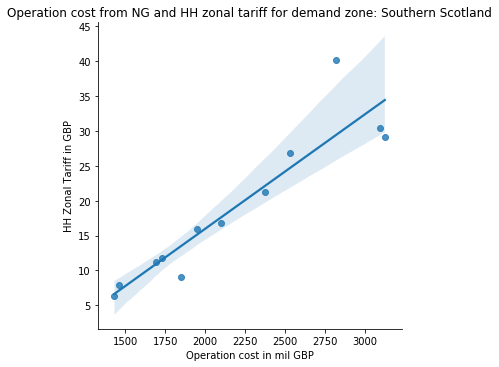

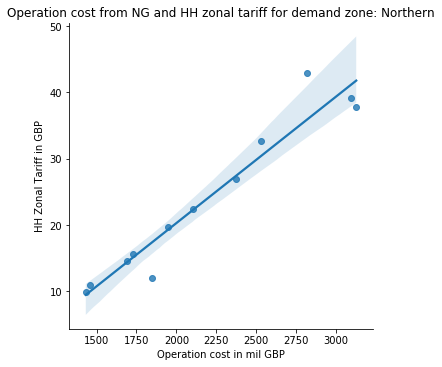

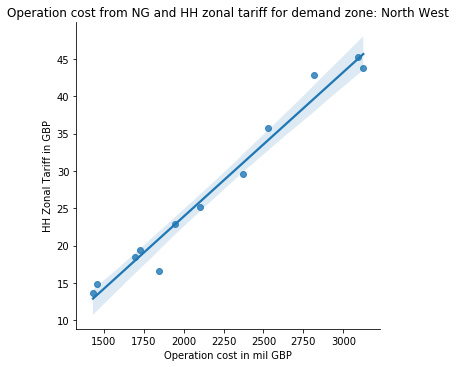

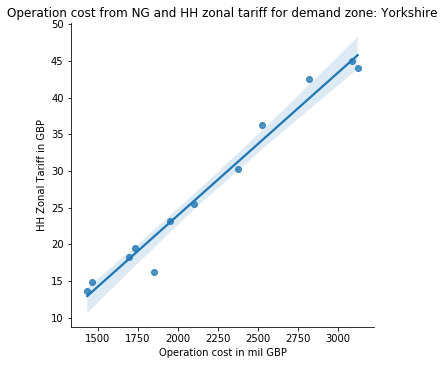

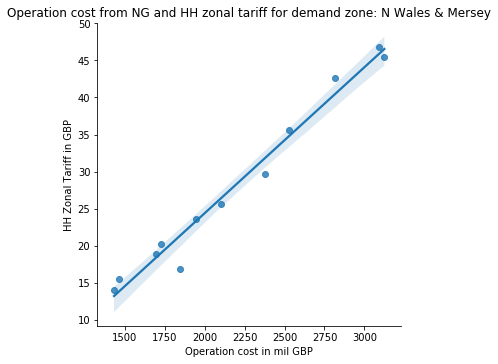

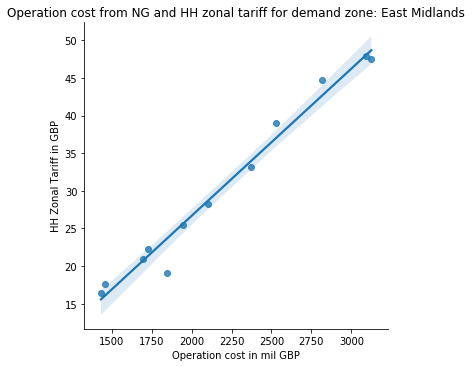

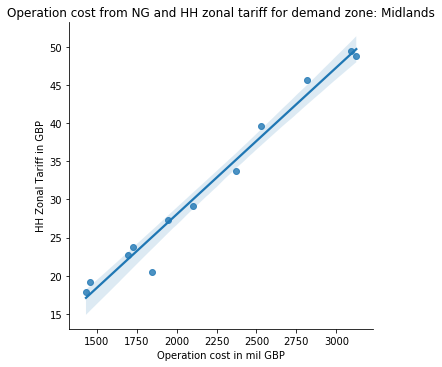

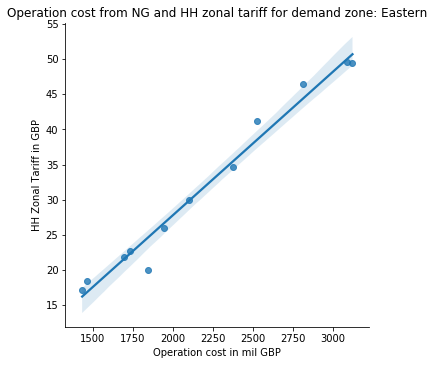

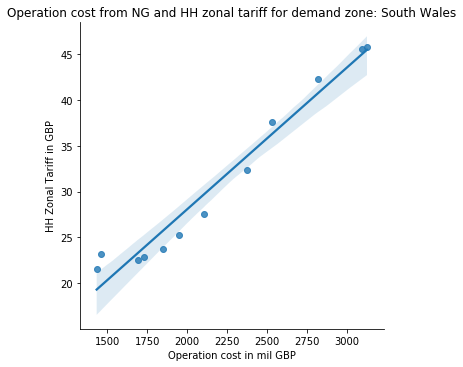

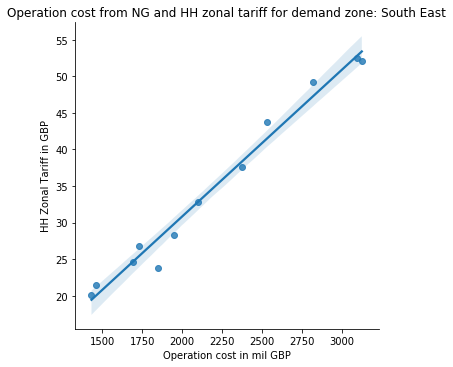

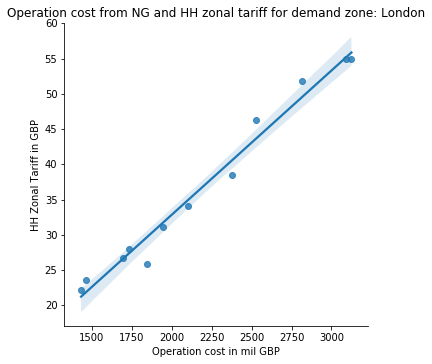

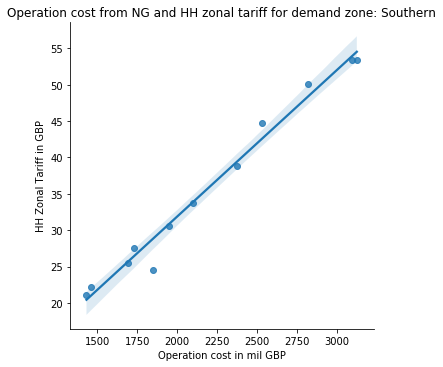

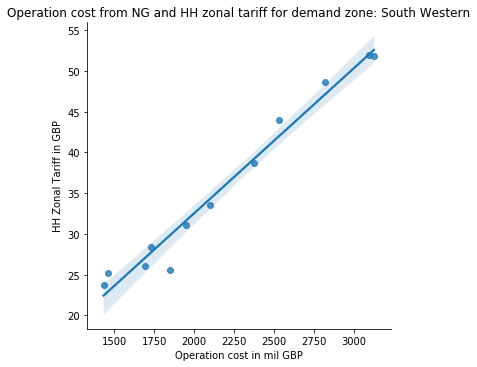

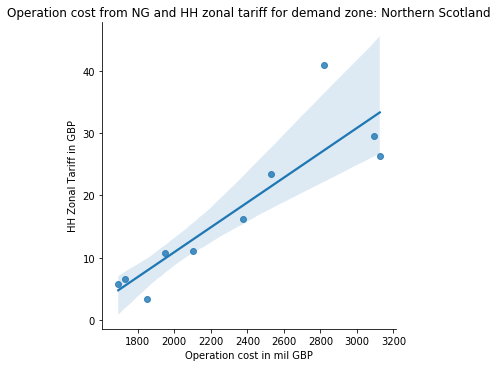

In [9]:
for zone in zones:
    temp = df[df.zone_name == zone]
    sns.lmplot(x="operation_cost",y ="hh_zonal",data=temp)
    plt.title("Operation cost from NG and HH zonal tariff for demand zone: "+zone)
    plt.xlabel("Operation cost in mil GBP")
    plt.ylabel("HH Zonal Tariff in GBP")
    

### We can see the same story here as the revenue, but Northern Scotaland seems to have wider CI, and I do not know the reason. QUESTION: WHAT HAPPENED TO NORTHERN SCOTLAND?

In [388]:
temp

zone_name   hh_zonal  nhh_zonal   residual    year  \
date                                                                     
2009-12-31  Northern Scotland   3.379238   0.459137  16.943694  2009.0   
2010-12-31  Northern Scotland   5.865932   0.790954  18.558560  2010.0   
2011-12-31  Northern Scotland   6.535401   0.886871   3.607933  2011.0   
2012-12-31  Northern Scotland  10.741418   1.481661  22.828373  2012.0   
2013-12-31  Northern Scotland  11.048877   1.515130  25.408454  2013.0   
2014-12-31  Northern Scotland  16.168316   2.189390  30.052442  2014.0   
2015-12-31  Northern Scotland  23.469195   3.388532  35.634955  2015.0   
2016-12-31  Northern Scotland  40.966038   5.767784  45.333826  2016.0   
2017-12-31  Northern Scotland  29.577679   6.215608  47.260756  2017.0   
2018-12-31  Northern Scotland  26.304232   3.509185  46.933426  2018.0   

               log_nd  inflation  operation_cost  amortization  revenue  \
date                                                                      
2009-12-31  20.260050   0.237812          1848.0         221.0   2566.0   
2010-12-31  20.277094   5.812574          1693.0         240.0   2484.0   
2011-12-31  20.238285  11.883410          1730.0         264.0   2549.0   
2012-12-31  20.241926   5.010020          1948.0         276.0   2813.0   
2013-12-31  20.230591   3.339695          2102.0         325.0   3111.0   
2014-12-31  20.180207   0.092336          2375.0         341.0   3393.0   
2015-12-31  20.151214  -7.749077          2529.0         375.0   3713.0   
2016-12-31  20.127212  -2.500000          2818.0         390.0   3979.0   
2017-12-31  20.091862   6.051282          3093.0         419.0   4493.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   

            total_liabilities  net_payroll_costs  number_of_employees    tax  \
date                                                                           
2009-12-31             6681.0              111.0               2352.0  153.0   
2010-12-31             6885.0               97.0               2488.0  183.0   
2011-12-31             7022.0              112.0               2784.0  139.0   
2012-12-31             8178.0              121.0               2978.0  101.0   
2013-12-31             9854.0              104.0               3229.0  161.0   
2014-12-31             9559.0              120.0               3044.0   79.0   
2015-12-31            10467.0              133.0               3270.0  203.0   
2016-12-31            10405.0              141.0               3520.0  114.0   
2017-12-31            10801.0              156.0               3692.0   87.0   
2018-12-31            10682.0              181.0               3679.0  165.0   

             adj_close        volume  
date                                  
2009-12-31  335.913735  1.465296e+08  
2010-12-31  367.357994  1.723851e+08  
2011-12-31  434.997279  1.566390e+08  
2012-12-31  508.046112  1.361455e+08  
2013-12-31  605.459168  1.262065e+08  
2014-12-31  725.807424  1.365219e+08  
2015-12-31  779.542343  1.603617e+08  
2016-12-31  921.059987  1.468067e+08  
2017-12-31  854.296926  1.827168e+08  
2018-12-31  739.531153  2.155613e+08

### Now I will plot total liabilities and HH zonal tariff, they could be correlated

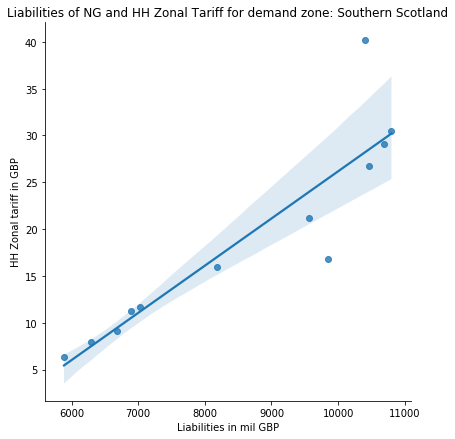

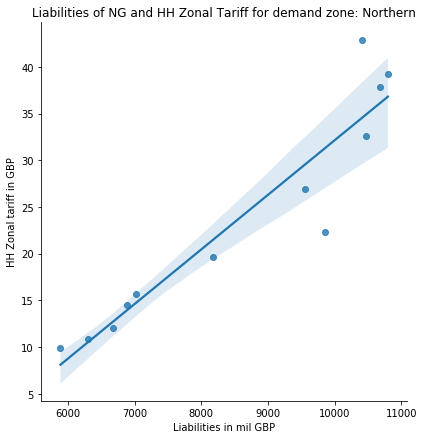

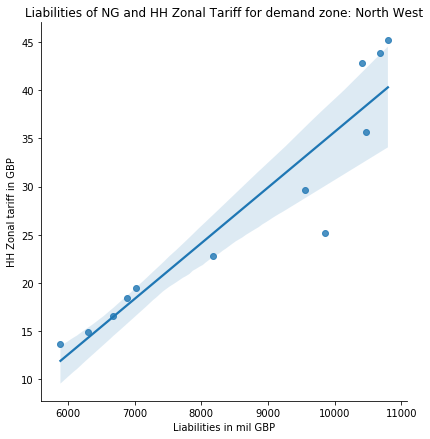

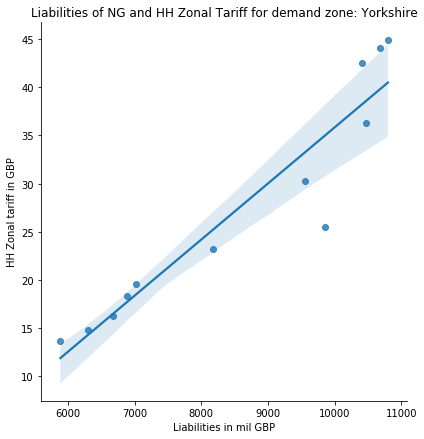

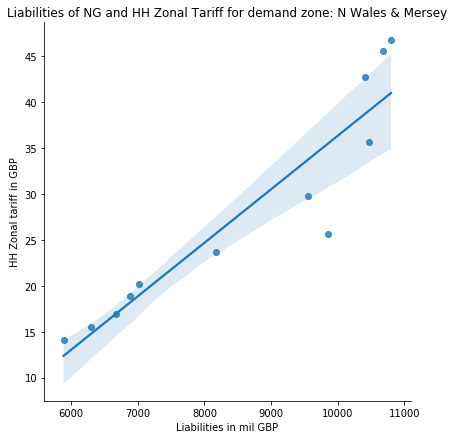

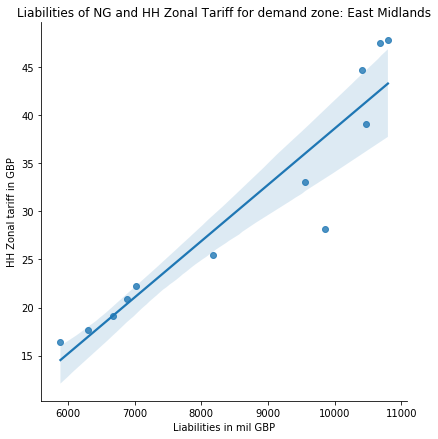

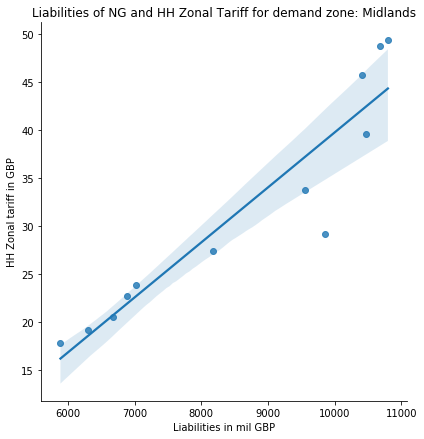

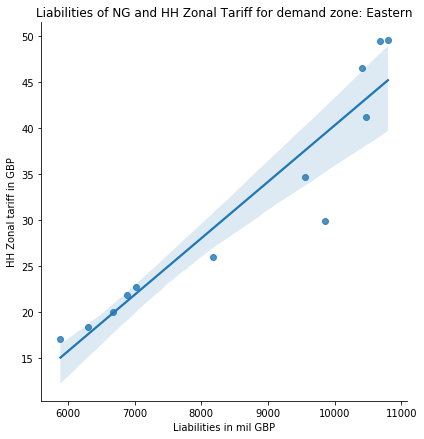

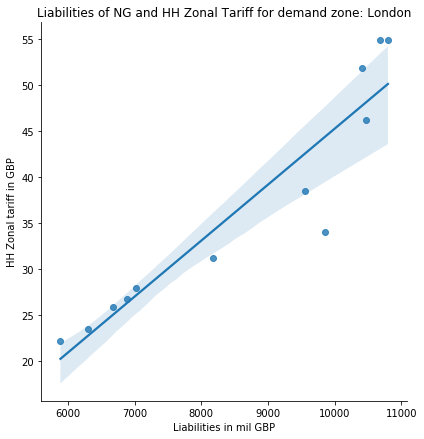

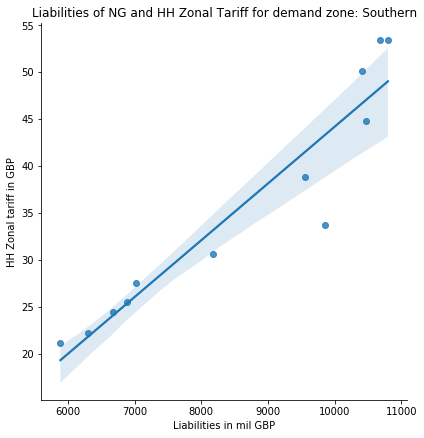

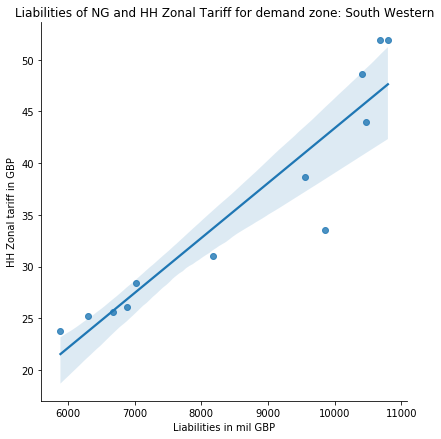

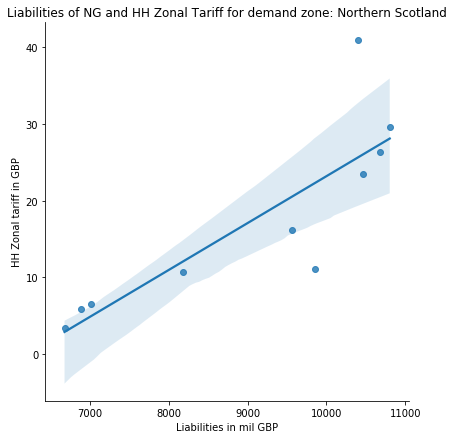

In [10]:
for zone in zones:
    temp = df[df.zone_name == zone]
    sns.lmplot(x = "total_liabilities",y="hh_zonal",data=temp,height=6)
    plt.title("Liabilities of NG and HH Zonal Tariff for demand zone: "+zone)
    plt.ylabel("HH Zonal tariff in GBP")
    plt.xlabel("Liabilities in mil GBP")
    

### From here we can conclude that the country has less ND, but the costs are increasing, so in order to operate with the grid they must increase the HH zonal tariff.

### Now lets see how National Grid was performing. For the NG I have the following features:
- Operation cost              
- Amortisation                   
- Revenue
- total liabilities
- payroll costs
- tax

Text(0.5, 0, 'YEAR')

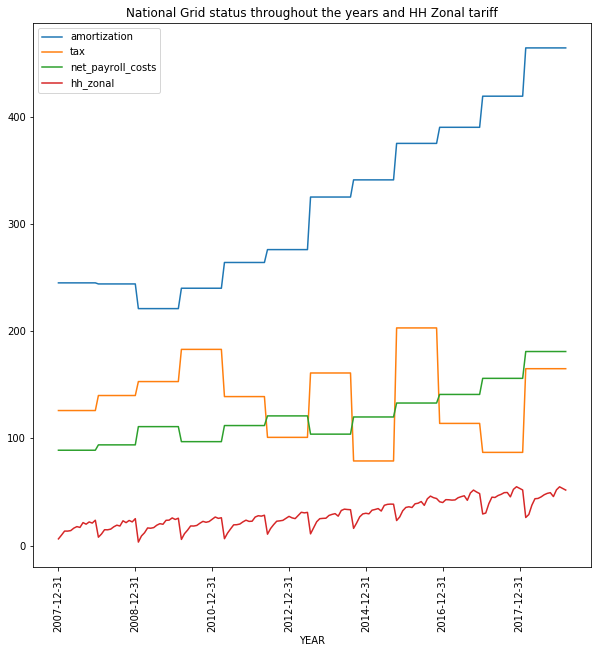

In [26]:
plt.figure(figsize=(10,10))
#df["operation_cost"].plot()
df["amortization"].plot()
#df["revenue"].plot()
#f["total liabilities"].plot()
df["tax"].plot()
df["net_payroll_costs"].plot()
df["hh_zonal"].plot()
plt.xticks(rotation=90)
plt.legend()
plt.title("National Grid status throughout the years and HH Zonal tariff")
plt.xlabel("YEAR")

### From here we can see that the National Grid is increasing the liabilities which means its inovating and the revenue is increasing but at smaller rate. Tue operation costs and revenue are perfectly following each other. For my suprise, the amortisation costs are reducing( I thought they will increase). 

### Also I can see that the revenue in 2017 increased but the op cost remained the same.

### Now I will plot inflation index and hh_zonal tariff to see their relationship

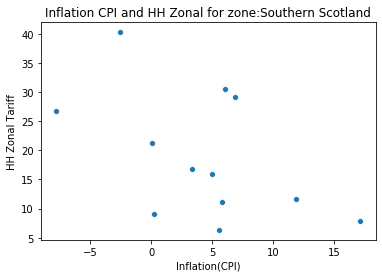

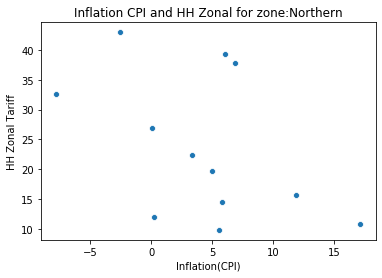

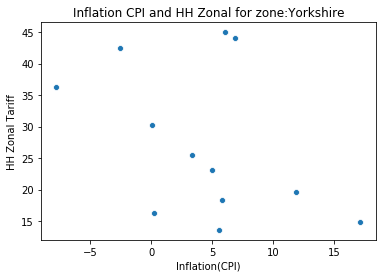

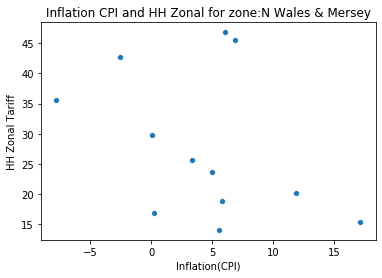

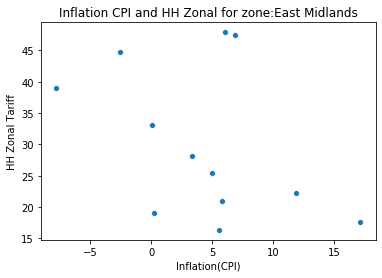

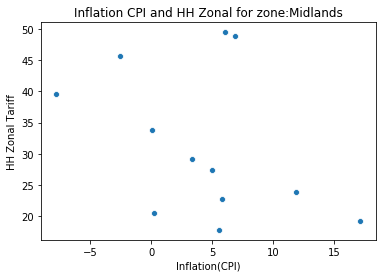

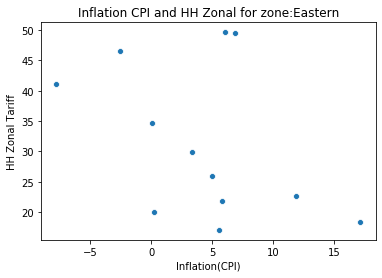

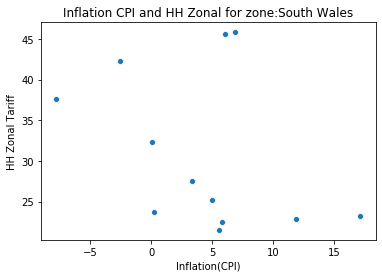

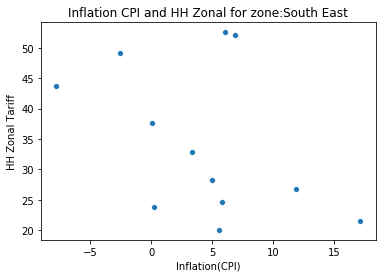

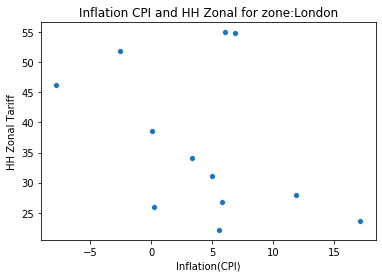

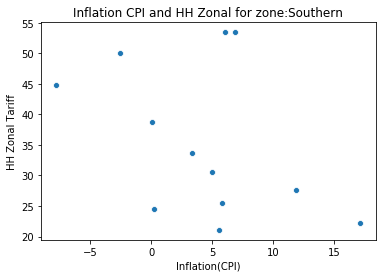

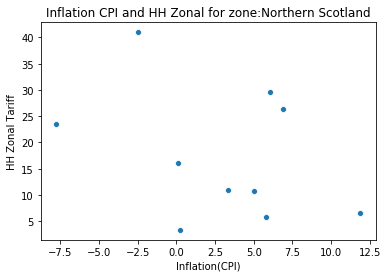

In [12]:
for zone in zones:
    temp = df[df.zone_name==zone]
    sns.scatterplot(x="inflation",y="hh_zonal",data=temp)
    plt.title("Inflation CPI and HH Zonal for zone:"+zone)
    plt.xlabel("Inflation(CPI)")
    plt.ylabel("HH Zonal Tariff")
    plt.show()

### Q2: How would this influence the HH Zonal tariff? Provide me with an example

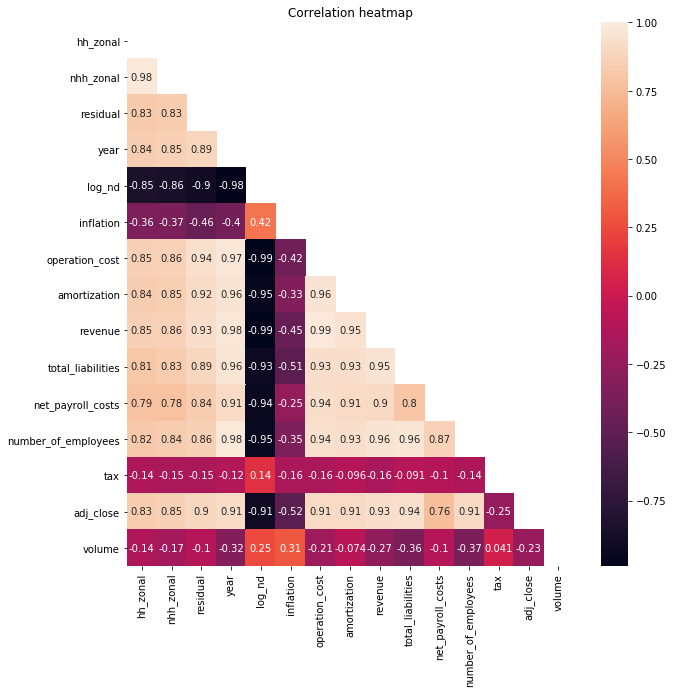

In [27]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,mask=mask)
plt.title("Correlation heatmap")
plt.show()

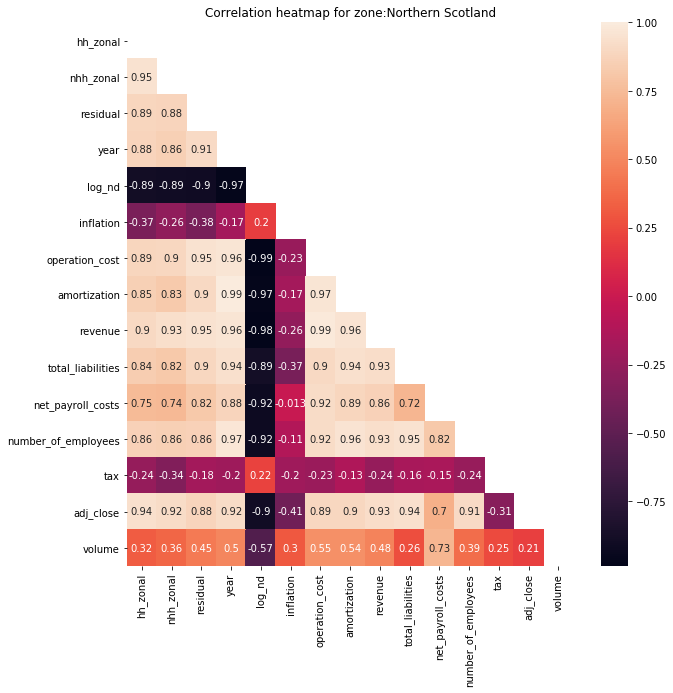

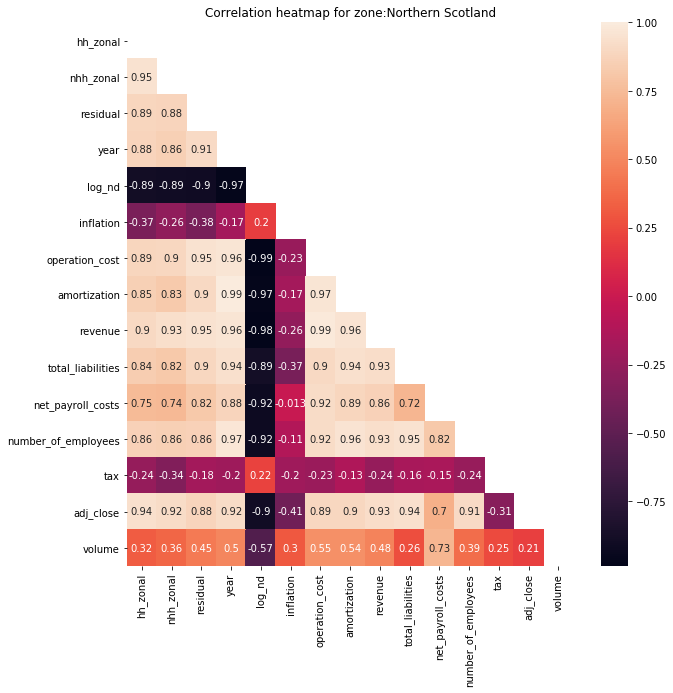

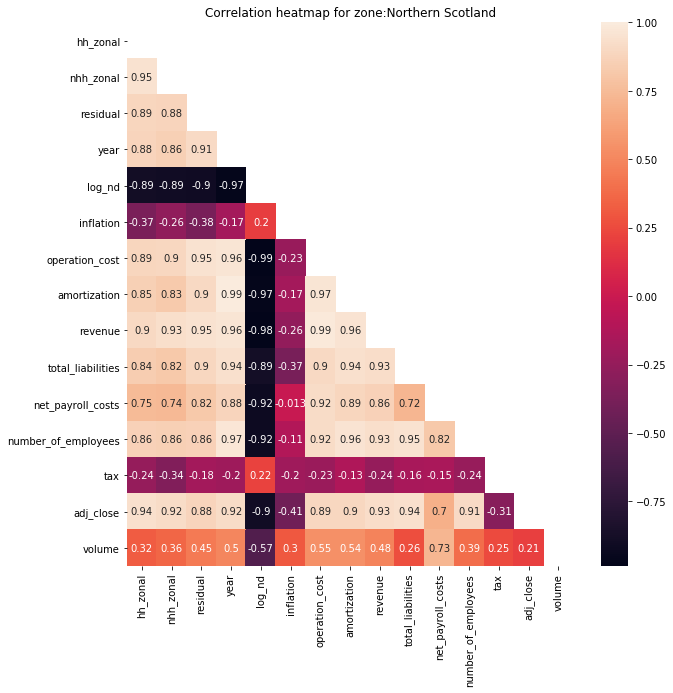

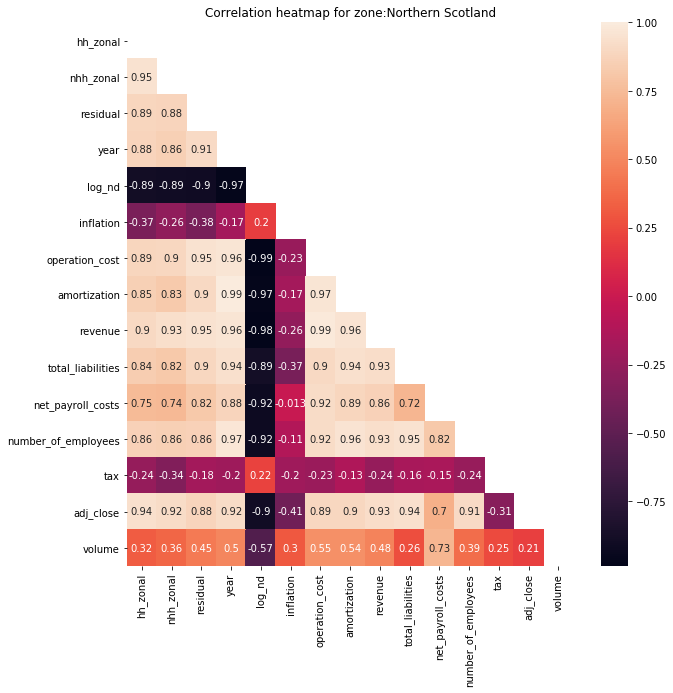

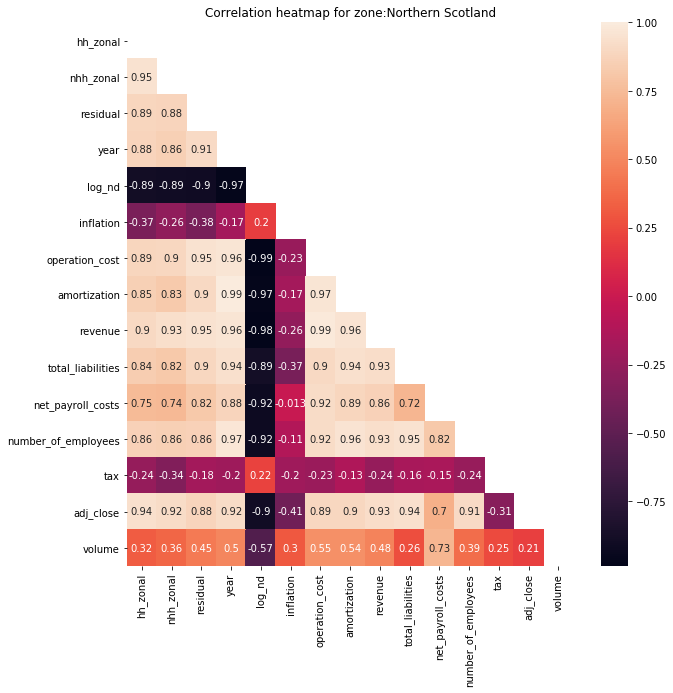

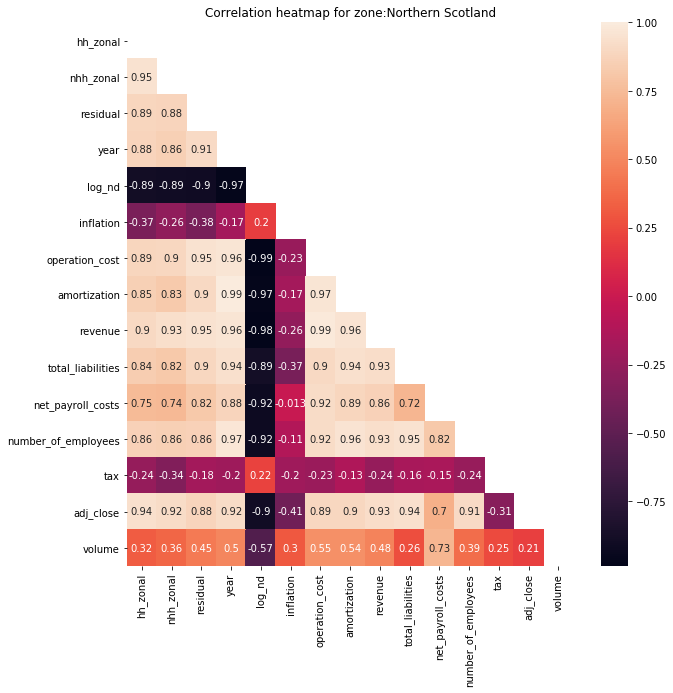

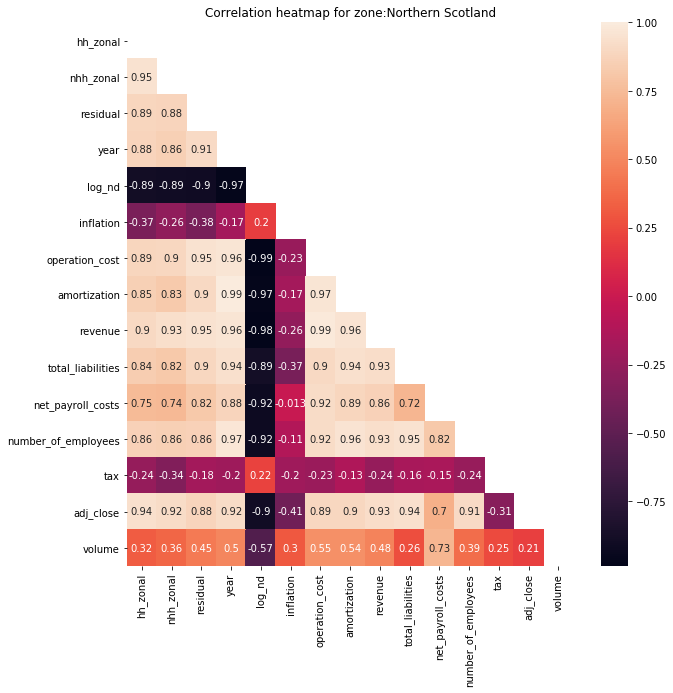

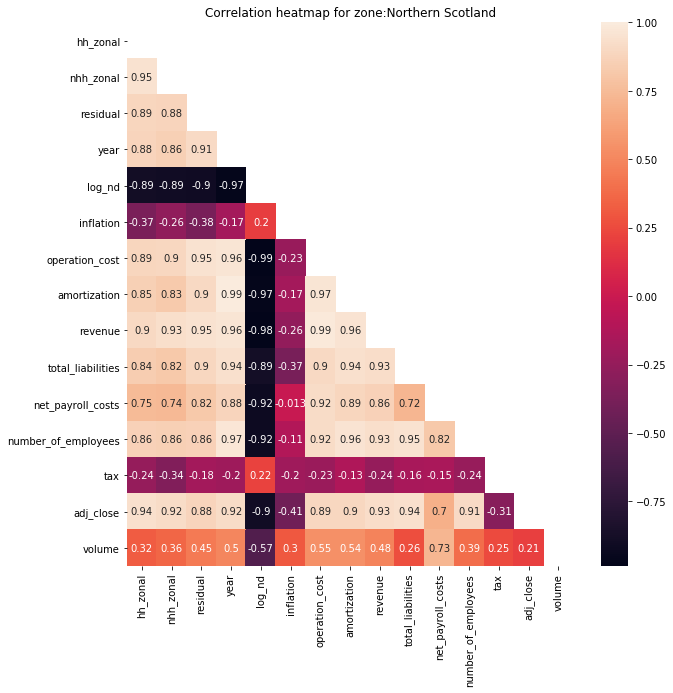

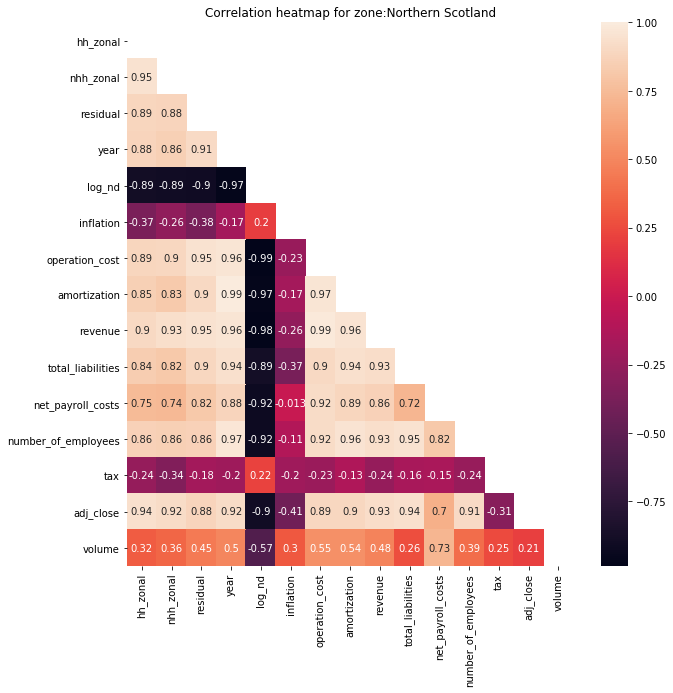

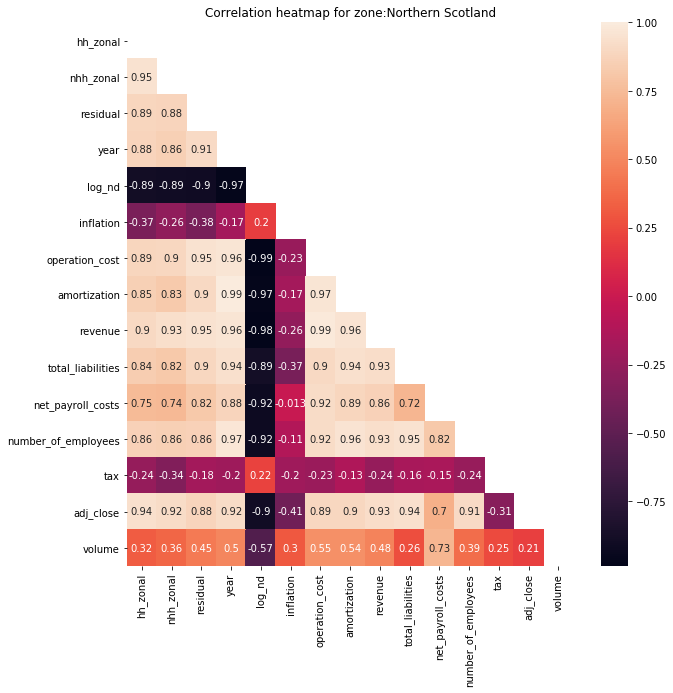

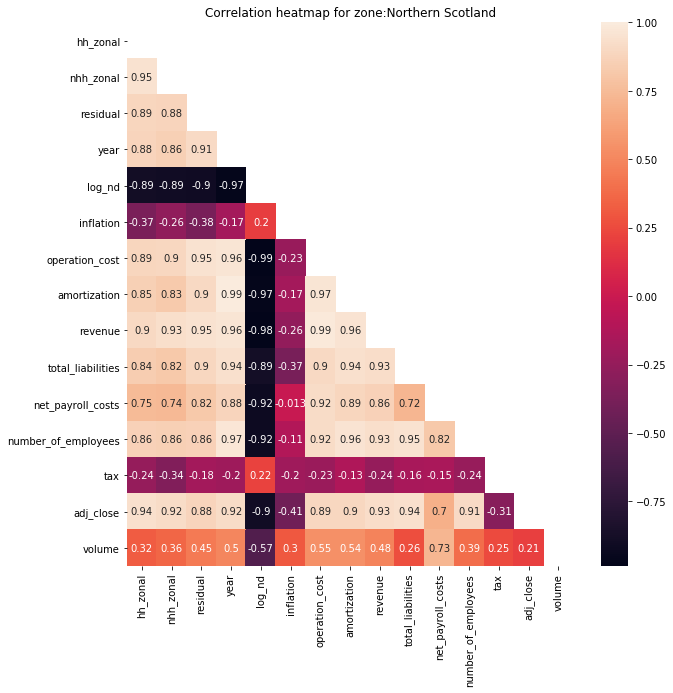

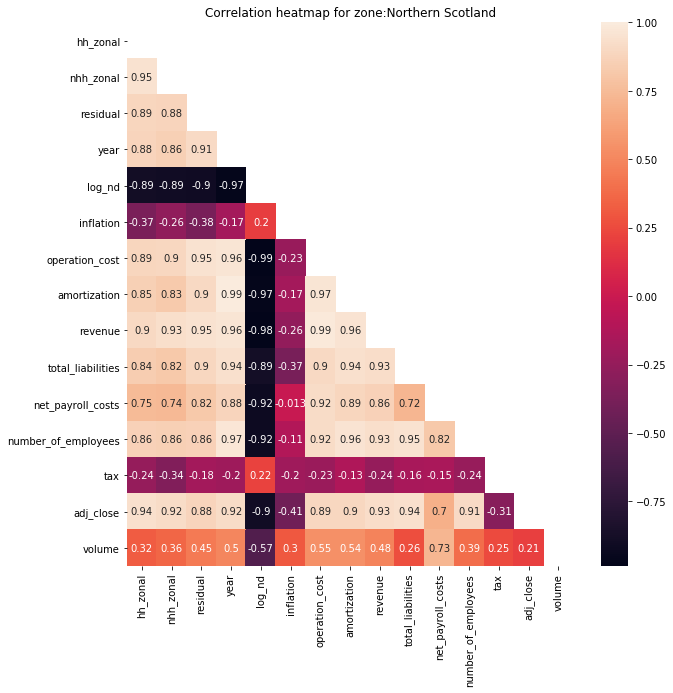

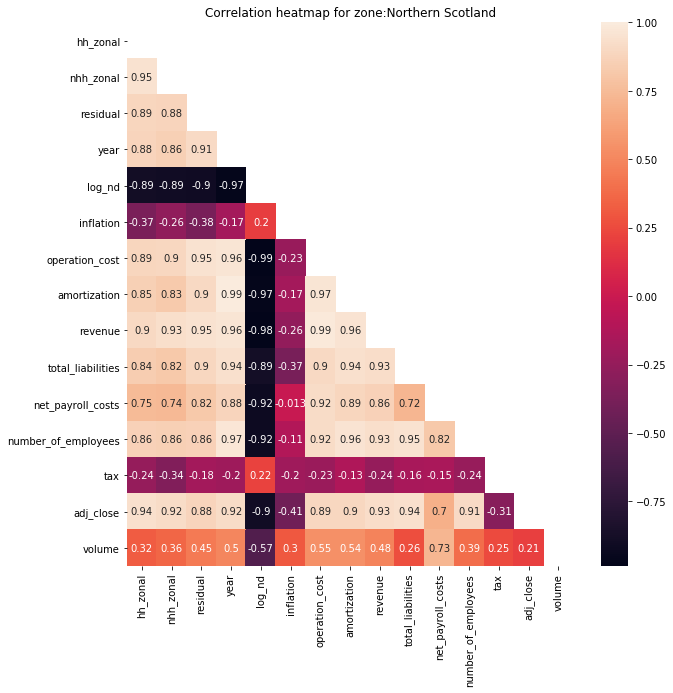

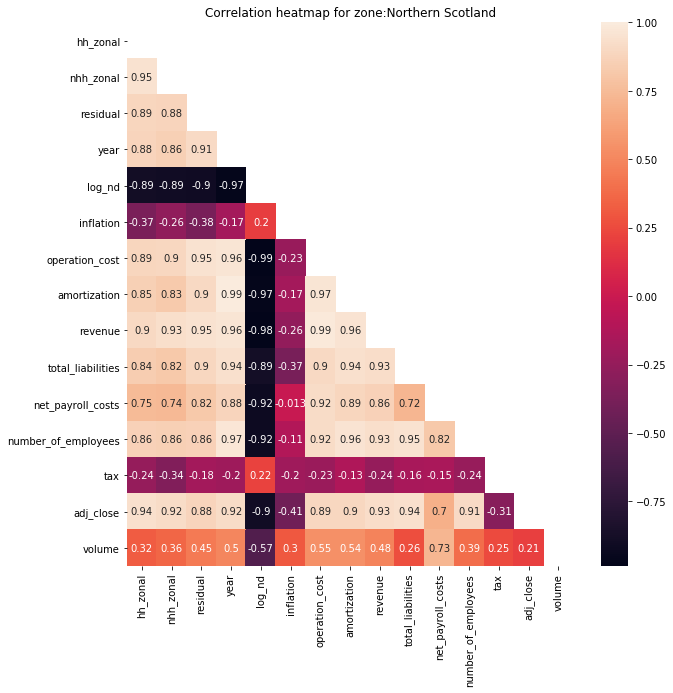

In [394]:
for i in zones:
    temp = df[df.zone_name==zone]
    mask = np.zeros_like(temp.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(10,10))
    sns.heatmap(temp.corr(),annot=True,mask=mask)
    plt.title("Correlation heatmap for zone:"+zone)
    plt.show()

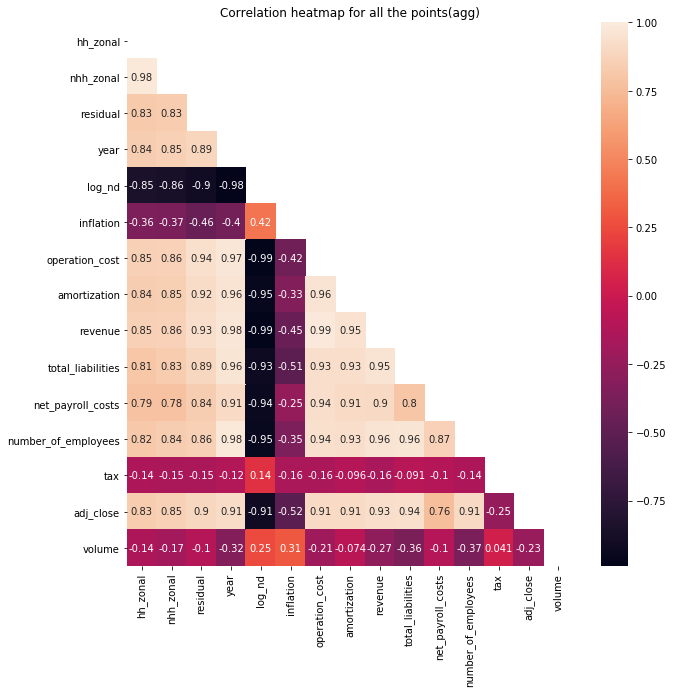

In [13]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,mask=mask)
plt.title("Correlation heatmap for all the points(agg)")
plt.show()

### From the heatmap we can see taht all the features are correlated(almost all), and to run a regression on this would be bad, so I decided to use some regualarization and to check which features will not be shrunk. I will use LASSO.

### Regularization technique #1: LASSO

In [31]:
## creating a function
from sklearn.linear_model import Lasso
import operator
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.model_selection import GridSearchCV
lasso_selected= {}
from sklearn.feature_selection import SelectKBest,SelectFromModel
import warnings
from statsmodels.api import OLS
warnings.filterwarnings("ignore")
def create_lasso_feat_plot(df,zone_name,var="hh_zonal",alpha=0.01):
    #creating vectors
    print('For',zone_name)

    
    temp = df[df.zone_name == zone_name]
    temp.drop(["zone_name",'year'],axis=1,inplace=True)
    X = temp.drop(var,axis=1)
    y = temp[[var]]

    lasso = Lasso()
    
    params = {"alpha":[1e-15,1e-10,1e-3,1e-2,1,5,10,20]}

    lasso_reg = GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=3,)

    lasso_reg.fit(X,y)
    
    sel_ = SelectFromModel(lasso_reg.best_estimator_)
    sel_.fit(X,y)
    
  
    
    
    
    
    
    coef_lasso = pd.Series(lasso_reg.best_estimator_.coef_,index = X.columns)
    print("LASSO coef:")
    print(coef_lasso)
    coef_lasso.plot(kind="barh")
    plt.show()
    print('***************************************')
    selected_feat = X.columns[(sel_.get_support())]
    print('For',zone_name)
    print('total features: {}'.format((X.shape[1])))
    print('selected features: {}'.format(len(selected_feat)))
    print('features with coefficients shrank to zero: {}'.format(
          np.sum(sel_.estimator_.coef_ == 0))) 
    
    indicies = [i for i, x in enumerate(sel_.get_support()) if x]
    selected_features = operator.itemgetter(*indicies)(X.columns)
    print("\n")
    print("Selected features: ",selected_features)
    lasso_selected[zone_name] = selected_features
    print('***********************************************************\n\n')
    
    
    
    

For Southern Scotland
LASSO coef:
nhh_zonal              4.84046
residual               0.05437
log_nd                -0.50855
inflation             -0.03349
operation_cost        -0.00447
amortization           0.01102
revenue                0.00260
total_liabilities     -0.00046
net_payroll_costs      0.05308
number_of_employees   -0.00094
tax                    0.00918
adj_close              0.00898
volume                -0.00000
dtype: float64


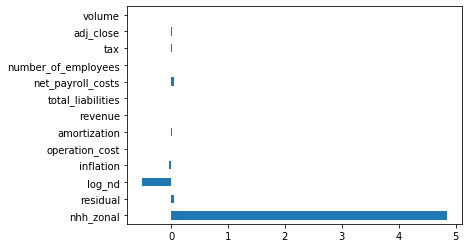

***************************************
For Southern Scotland
total features: 13
selected features: 12
features with coefficients shrank to zero: 0


Selected features:  ('nhh_zonal', 'residual', 'log_nd', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************


For Northern
LASSO coef:
nhh_zonal              0.00000
residual               0.00000
log_nd                -0.00000
inflation             -0.00000
operation_cost         0.00903
amortization           0.00000
revenue                0.00000
total_liabilities     -0.00133
net_payroll_costs      0.00000
number_of_employees    0.00437
tax                    0.00156
adj_close              0.03182
volume                -0.00000
dtype: float64


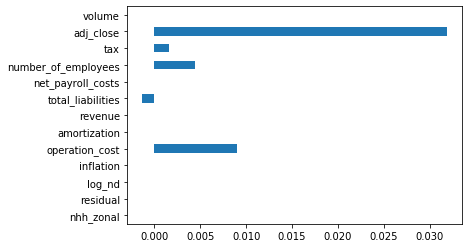

***************************************
For Northern
total features: 13
selected features: 5
features with coefficients shrank to zero: 7


Selected features:  ('operation_cost', 'total_liabilities', 'number_of_employees', 'tax', 'adj_close')
***********************************************************


For North West
LASSO coef:
nhh_zonal              3.06592
residual               0.06996
log_nd                -0.00000
inflation              0.12012
operation_cost         0.00497
amortization          -0.03370
revenue                0.00283
total_liabilities     -0.00123
net_payroll_costs      0.03120
number_of_employees    0.00254
tax                    0.02341
adj_close              0.02062
volume                 0.00000
dtype: float64


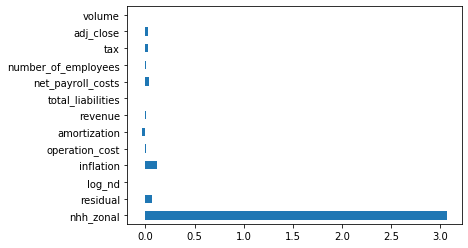

***************************************
For North West
total features: 13
selected features: 11
features with coefficients shrank to zero: 1


Selected features:  ('nhh_zonal', 'residual', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************


For Yorkshire
LASSO coef:
nhh_zonal              0.00000
residual               0.00000
log_nd                -0.00000
inflation              0.00000
operation_cost         0.00667
amortization           0.00000
revenue                0.00497
total_liabilities     -0.00032
net_payroll_costs      0.00000
number_of_employees    0.00420
tax                    0.00000
adj_close              0.01101
volume                 0.00000
dtype: float64


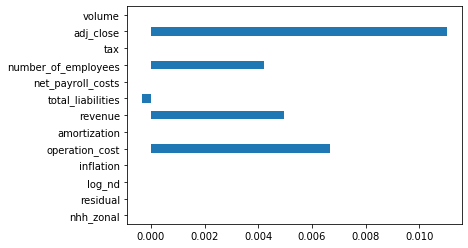

***************************************
For Yorkshire
total features: 13
selected features: 5
features with coefficients shrank to zero: 7


Selected features:  ('operation_cost', 'revenue', 'total_liabilities', 'number_of_employees', 'adj_close')
***********************************************************


For N Wales & Mersey
LASSO coef:
nhh_zonal              4.34600
residual               0.03511
log_nd                -0.00000
inflation              0.08806
operation_cost         0.01462
amortization           0.00542
revenue               -0.00375
total_liabilities     -0.00034
net_payroll_costs     -0.03998
number_of_employees    0.00188
tax                   -0.00497
adj_close             -0.00688
volume                 0.00000
dtype: float64


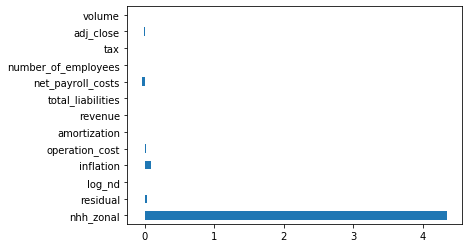

***************************************
For N Wales & Mersey
total features: 13
selected features: 11
features with coefficients shrank to zero: 1


Selected features:  ('nhh_zonal', 'residual', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************


For East Midlands
LASSO coef:
nhh_zonal              0.00000
residual               0.00000
log_nd                -0.00000
inflation              0.00000
operation_cost         0.00752
amortization           0.00000
revenue                0.00486
total_liabilities     -0.00000
net_payroll_costs      0.00000
number_of_employees    0.00362
tax                    0.00000
adj_close              0.00814
volume                 0.00000
dtype: float64


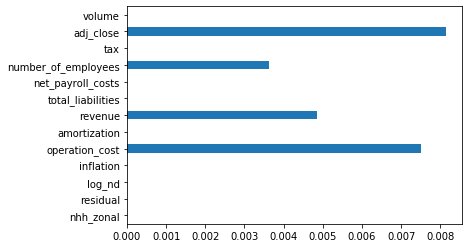

***************************************
For East Midlands
total features: 13
selected features: 4
features with coefficients shrank to zero: 8


Selected features:  ('operation_cost', 'revenue', 'number_of_employees', 'adj_close')
***********************************************************


For Midlands
LASSO coef:
nhh_zonal              3.57669
residual               0.05730
log_nd                 0.00000
inflation              0.09324
operation_cost        -0.00120
amortization          -0.01048
revenue                0.00659
total_liabilities     -0.00065
net_payroll_costs      0.03329
number_of_employees    0.00038
tax                    0.01008
adj_close              0.00984
volume                 0.00000
dtype: float64


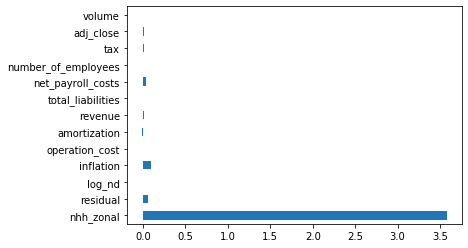

***************************************
For Midlands
total features: 13
selected features: 11
features with coefficients shrank to zero: 1


Selected features:  ('nhh_zonal', 'residual', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************


For Eastern
LASSO coef:
nhh_zonal              3.82951
residual               0.01618
log_nd                -0.00000
inflation              0.03314
operation_cost         0.00303
amortization          -0.00695
revenue                0.00144
total_liabilities     -0.00029
net_payroll_costs      0.03084
number_of_employees   -0.00112
tax                    0.01783
adj_close              0.01685
volume                -0.00000
dtype: float64


***************************************
For Eastern
total features: 13
selected features: 11
features with coefficients shrank to zero: 1


Selected features:  ('nhh_zonal', 'residual', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************


For South Wales
LASSO coef:
nhh_zonal              0.00000
residual               0.00000
log_nd                -0.00000
inflation              0.00000
operation_cost         0.01114
amortization           0.00000
revenue                0.00261
total_liabilities     -0.00017
net_payroll_costs      0.00000
number_of_employees   -0.00000
tax                    0.00000
adj_close              0.00538
volume                 0.00000
dtype: float64


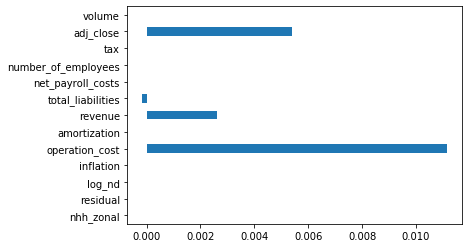

***************************************
For South Wales
total features: 13
selected features: 4
features with coefficients shrank to zero: 8


Selected features:  ('operation_cost', 'revenue', 'total_liabilities', 'adj_close')
***********************************************************


For South East
LASSO coef:
nhh_zonal              2.85480
residual              -0.02064
log_nd                -0.00000
inflation              0.08779
operation_cost         0.00567
amortization          -0.01382
revenue                0.00252
total_liabilities     -0.00036
net_payroll_costs      0.02347
number_of_employees   -0.00180
tax                    0.02451
adj_close              0.02204
volume                 0.00000
dtype: float64


***************************************
For South East
total features: 13
selected features: 11
features with coefficients shrank to zero: 1


Selected features:  ('nhh_zonal', 'residual', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************


For London
LASSO coef:
nhh_zonal              0.00000
residual               0.03661
log_nd                 0.00000
inflation              0.00000
operation_cost         0.00734
amortization           0.02283
revenue                0.00503
total_liabilities     -0.00273
net_payroll_costs      0.00681
number_of_employees    0.00452
tax                    0.02800
adj_close              0.02103
volume                 0.00000
dtype: float64


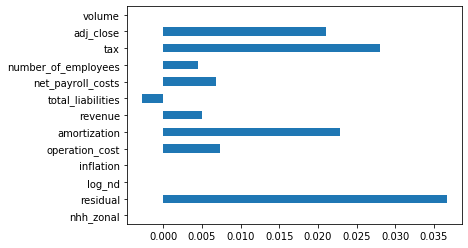

***************************************
For London
total features: 13
selected features: 9
features with coefficients shrank to zero: 3


Selected features:  ('residual', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************


For Southern
LASSO coef:
nhh_zonal              0.00000
residual               0.00000
log_nd                -0.00000
inflation              0.00000
operation_cost         0.00683
amortization           0.03301
revenue                0.00434
total_liabilities     -0.00192
net_payroll_costs      0.00475
number_of_employees    0.00356
tax                    0.01633
adj_close              0.01787
volume                -0.00000
dtype: float64


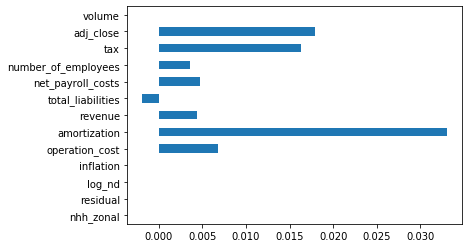

***************************************
For Southern
total features: 13
selected features: 8
features with coefficients shrank to zero: 4


Selected features:  ('operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************


For South Western
LASSO coef:
nhh_zonal              1.08479
residual               0.03611
log_nd                -0.00000
inflation              0.10653
operation_cost        -0.00317
amortization           0.01021
revenue                0.00593
total_liabilities      0.00009
net_payroll_costs      0.10392
number_of_employees   -0.00341
tax                    0.01373
adj_close              0.02095
volume                 0.00000
dtype: float64


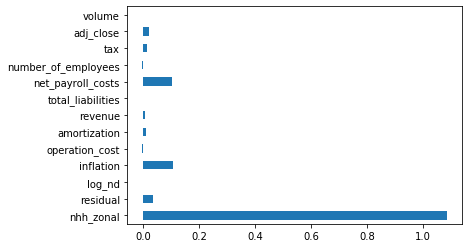

***************************************
For South Western
total features: 13
selected features: 11
features with coefficients shrank to zero: 1


Selected features:  ('nhh_zonal', 'residual', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************


For Northern Scotland
LASSO coef:
nhh_zonal              2.98627
residual               0.43601
log_nd                12.61617
inflation              0.85272
operation_cost         0.00846
amortization          -0.02482
revenue               -0.01561
total_liabilities     -0.00264
net_payroll_costs      0.25052
number_of_employees   -0.01195
tax                    0.11077
adj_close              0.08895
volume                -0.00000
dtype: float64


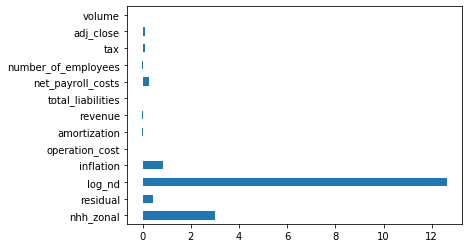

***************************************
For Northern Scotland
total features: 13
selected features: 12
features with coefficients shrank to zero: 0


Selected features:  ('nhh_zonal', 'residual', 'log_nd', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
***********************************************************




In [32]:
for i in zones:
    create_lasso_feat_plot(df,zone_name=i,var="hh_zonal")

To make the everything simple the following list is created

In [33]:
for i,j in lasso_selected.items():
    print(i)
    print(j)
    print("______________________")

Southern Scotland
('nhh_zonal', 'residual', 'log_nd', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
______________________
Northern
('operation_cost', 'total_liabilities', 'number_of_employees', 'tax', 'adj_close')
______________________
North West
('nhh_zonal', 'residual', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
______________________
Yorkshire
('operation_cost', 'revenue', 'total_liabilities', 'number_of_employees', 'adj_close')
______________________
N Wales & Mersey
('nhh_zonal', 'residual', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'tax', 'adj_close')
______________________
East Midlands
('operation_cost', 'revenue', 'number_of_employees', 'adj_close')
______________________
Midlands
('nhh_zonal', 'residu

In [34]:
def make_lin_reg(zone_name,y="hh_zonal",tree_feat = False):
    temp = df[df.zone_name == zone_name]
    temp = temp.drop(["zone_name","year"],axis=1)

    if tree_feat:
        temp_1 = temp[list(trees_selected[zone].index)]
        ols = OLS(temp[[y]],temp_1,).fit().summary()
        display(ols)
    
    
    
    #because it wont give me confidence intervals, more features than rows
    if len(temp) >= len(lasso_selected[zone_name]) and tree_feat == False:
        display(OLS(temp[[y]], temp[list(lasso_selected[zone_name])]).fit().summary())
        

In [35]:
list(trees_selected[zones[0]].index)

NameError: name 'trees_selected' is not defined

In [36]:
for zone in zones:
    print("For zone",zone)
    make_lin_reg(zone)

For zone Southern Scotland


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hh_zonal   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                nan
Time:                        07:30:21   Log-Likelihood:                 325.73
No. Observations:                  12   AIC:                            -627.5
Df Residuals:                       0   BIC:                            -621.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
nhh_zonal               7.3485        inf          0        nan         nan         nan
residual               -0.0472        inf         -0        nan         nan         nan
log_nd                 -0.0016        inf         -0        nan         nan         nan
inflation              -0.0393        inf         -0        nan         nan         nan
operation_cost         -0.0190        inf         -0        nan         nan         nan
amortization            0.0451        inf          0        nan         nan         nan
revenue                 0.0121        inf          0        nan         nan         nan
total_liabilities       0.0026        inf          0        nan         nan         nan
net_payroll_costs       0.1020        inf          0        nan         nan         nan
number_of_employees    -0.0102        inf         -0        nan         nan         nan
tax                    -0.0138        inf         -0        nan         nan         nan
adj_close              -0.0217        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                        0.823   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.734
Skew:                          -0.389   Prob(JB):                        0.693
Kurtosis:                       2.070   Cond. No.                     2.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For zone Northern


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              171.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    3.66e-07
Time:                        07:30:21   Log-Likelihood:                         -27.364
No. Observations:                  12   AIC:                                      64.73
Df Residuals:                       7   BIC:                                      67.15
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
operation_cost          0.0120      0.005      2.483      0.042       0.001       0.023
total_liabilities      -0.0026      0.003     -0.998      0.351      -0.009       0.004
number_of_employees    -0.0031      0.006     -0.519      0.619      -0.017       0.011
tax                     0.0013      0.027      0.049      0.962      -0.062       0.065
adj_close               0.0500      0.016      3.127      0.017       0.012       0.088
==============================================================================
Omnibus:                        1.385   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.001
Skew:                          -0.636   Prob(JB):                        0.606
Kurtosis:                       2.380   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For zone North West


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              730.7
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                      0.0288
Time:                        07:30:21   Log-Likelihood:                         -3.7251
No. Observations:                  12   AIC:                                      29.45
Df Residuals:                       1   BIC:                                      34.78
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
nhh_zonal               5.5686      1.337      4.166      0.150     -11.414      22.551
residual                0.0858      0.102      0.842      0.554      -1.209       1.380
inflation               0.0073      0.150      0.048      0.969      -1.901       1.915
operation_cost         -0.0002      0.011     -0.015      0.991      -0.145       0.144
amortization            0.0113      0.039      0.290      0.821      -0.485       0.508
revenue                 0.0049      0.007      0.746      0.592      -0.078       0.088
total_liabilities      -0.0024      0.002     -1.261      0.427      -0.027       0.022
net_payroll_costs      -0.0160      0.078     -0.206      0.871      -1.006       0.974
number_of_employees     0.0010      0.006      0.187      0.882      -0.070       0.072
tax                     0.0101      0.014      0.750      0.590      -0.162       0.182
adj_close               0.0071      0.010      0.750      0.590      -0.114       0.128
==============================================================================
Omnibus:                        5.987   Durbin-Watson:                   2.969
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                2.938
Skew:                          -1.186   Prob(JB):                        0.230
Kurtosis:                       3.500   Cond. No.                     4.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For zone Yorkshire


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              279.3
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    6.76e-08
Time:                        07:30:21   Log-Likelihood:                         -25.913
No. Observations:                  12   AIC:                                      61.83
Df Residuals:                       7   BIC:                                      64.25
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
operation_cost          0.0133      0.011      1.180      0.276      -0.013       0.040
revenue                 0.0028      0.010      0.273      0.792      -0.021       0.027
total_liabilities      -0.0020      0.002     -0.966      0.366      -0.007       0.003
number_of_employees    -0.0037      0.005     -0.693      0.511      -0.016       0.009
adj_close               0.0316      0.012      2.637      0.034       0.003       0.060
==============================================================================
Omnibus:                        0.765   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.702
Skew:                          -0.371   Prob(JB):                        0.704
Kurtosis:                       2.075   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For zone N Wales & Mersey


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.655e+04
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                     0.00408
Time:                        07:30:21   Log-Likelihood:                          19.508
No. Observations:                  12   AIC:                                     -17.02
Df Residuals:                       1   BIC:                                     -11.68
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
nhh_zonal               5.4786      0.179     30.537      0.021       3.199       7.758
residual                0.0297      0.016      1.864      0.313      -0.173       0.232
inflation               0.0390      0.022      1.741      0.332      -0.246       0.324
operation_cost          0.0152      0.002      8.216      0.077      -0.008       0.039
amortization            0.0295      0.006      5.224      0.120      -0.042       0.101
revenue                -0.0048      0.001     -4.275      0.146      -0.019       0.010
total_liabilities      -0.0005      0.000     -1.381      0.399      -0.005       0.004
net_payroll_costs      -0.0707      0.011     -6.437      0.098      -0.210       0.069
number_of_employees     0.0009      0.001      1.053      0.484      -0.010       0.011
tax                    -0.0154      0.002     -8.586      0.074      -0.038       0.007
adj_close              -0.0170      0.001    -11.737      0.054      -0.035       0.001
==============================================================================
Omnibus:                        5.017   Durbin-Watson:                   2.773
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                2.468
Skew:                          -1.101   Prob(JB):                        0.291
Kurtosis:                       3.300   Cond. No.                     3.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For zone East Midlands


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              538.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    9.37e-10
Time:                        07:30:21   Log-Likelihood:                         -25.122
No. Observations:                  12   AIC:                                      58.24
Df Residuals:                       8   BIC:                                      60.18
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
operation_cost          0.0163      0.010      1.678      0.132      -0.006       0.039
revenue                 0.0002      0.009      0.023      0.982      -0.020       0.020
number_of_employees    -0.0066      0.003     -2.382      0.044      -0.013      -0.000
adj_close               0.0230      0.009      2.480      0.038       0.002       0.044
==============================================================================
Omnibus:                        1.496   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.113
Skew:                          -0.656   Prob(JB):                        0.573
Kurtosis:                       2.290   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For zone Midlands


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              2021.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                      0.0173
Time:                        07:30:21   Log-Likelihood:                         0.91221
No. Observations:                  12   AIC:                                      20.18
Df Residuals:                       1   BIC:                                      25.51
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
nhh_zonal               4.7454      0.968      4.902      0.128      -7.555      17.046
residual                0.0881      0.070      1.255      0.428      -0.803       0.980
inflation              -0.0121      0.102     -0.119      0.924      -1.304       1.280
operation_cost         -0.0072      0.008     -0.941      0.519      -0.105       0.090
amortization            0.0332      0.026      1.266      0.426      -0.300       0.366
revenue                 0.0098      0.004      2.252      0.266      -0.045       0.065
total_liabilities      -0.0018      0.001     -1.364      0.403      -0.019       0.015
net_payroll_costs      -0.0020      0.052     -0.039      0.975      -0.664       0.660
number_of_employees    -0.0001      0.004     -0.035      0.978      -0.050       0.050
tax                    -0.0017      0.009     -0.195      0.877      -0.112       0.109
adj_close               0.0003      0.006      0.039      0.975      -0.082       0.083
==============================================================================
Omnibus:                        5.597   Durbin-Watson:                   2.998
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                2.757
Skew:                          -1.156   Prob(JB):                        0.252
Kurtosis:                       3.409   Cond. No.                     4.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For zone Eastern


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9478.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                     0.00801
Time:                        07:30:21   Log-Likelihood:                          10.124
No. Observations:                  12   AIC:                                      1.752
Df Residuals:                       1   BIC:                                      7.086
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
nhh_zonal               5.7695      0.437     13.202      0.048       0.217      11.322
residual               -0.0231      0.034     -0.676      0.622      -0.458       0.411
inflation               0.0299      0.047      0.637      0.639      -0.567       0.626
operation_cost          0.0040      0.004      1.111      0.467      -0.042       0.050
amortization           -0.0261      0.014     -1.808      0.322      -0.210       0.158
revenue                -0.0011      0.002     -0.499      0.705      -0.029       0.027
total_liabilities       0.0005      0.001      0.723      0.602      -0.008       0.009
net_payroll_costs       0.0294      0.025      1.168      0.451      -0.291       0.350
number_of_employees    -0.0029      0.002     -1.658      0.345      -0.025       0.019
tax                     0.0146      0.004      3.386      0.183      -0.040       0.069
adj_close               0.0147      0.003      4.740      0.132      -0.025       0.054
==============================================================================
Omnibus:                        5.978   Durbin-Watson:                   2.902
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                2.933
Skew:                          -1.185   Prob(JB):                        0.231
Kurtosis:                       3.499   Cond. No.                     4.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For zone South Wales


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              975.0
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    8.77e-11
Time:                        07:30:21   Log-Likelihood:                         -21.529
No. Observations:                  12   AIC:                                      51.06
Df Residuals:                       8   BIC:                                      53.00
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
operation_cost        0.0194      0.007      2.654      0.029       0.003       0.036
revenue              -0.0035      0.006     -0.534      0.608      -0.018       0.012
total_liabilities    -0.0009      0.001     -1.183      0.271      -0.003       0.001
adj_close             0.0127      0.006      1.999      0.081      -0.002       0.027
==============================================================================
Omnibus:                        2.782   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                1.109
Skew:                           0.739   Prob(JB):                        0.574
Kurtosis:                       3.183   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For zone South East


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              7922.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                     0.00876
Time:                        07:30:21   Log-Likelihood:                          8.1050
No. Observations:                  12   AIC:                                      5.790
Df Residuals:                       1   BIC:                                      11.12
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
nhh_zonal               4.7345      0.523      9.049      0.070      -1.913      11.382
residual               -0.0177      0.036     -0.493      0.708      -0.474       0.438
inflation               0.0536      0.054      0.998      0.501      -0.629       0.737
operation_cost          0.0032      0.004      0.772      0.581      -0.050       0.057
amortization           -0.0222      0.017     -1.324      0.412      -0.236       0.191
revenue                 0.0015      0.003      0.612      0.650      -0.030       0.033
total_liabilities   -4.608e-06      0.001     -0.006      0.996      -0.010       0.010
net_payroll_costs       0.0212      0.030      0.700      0.611      -0.364       0.406
number_of_employees    -0.0032      0.002     -1.555      0.364      -0.029       0.023
tax                     0.0200      0.005      3.951      0.158      -0.044       0.084
adj_close               0.0195      0.004      5.255      0.120      -0.028       0.067
==============================================================================
Omnibus:                        5.858   Durbin-Watson:                   2.878
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                2.874
Skew:                          -1.175   Prob(JB):                        0.238
Kurtosis:                       3.474   Cond. No.                     4.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For zone London


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              470.4
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    0.000146
Time:                        07:30:21   Log-Likelihood:                         -17.288
No. Observations:                  12   AIC:                                      52.58
Df Residuals:                       3   BIC:                                      56.94
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
residual                0.1945      0.158      1.229      0.307      -0.309       0.698
operation_cost          0.0001      0.019      0.006      0.995      -0.059       0.059
amortization            0.0351      0.039      0.904      0.433      -0.089       0.159
revenue                 0.0088      0.011      0.839      0.463      -0.025       0.042
total_liabilities      -0.0032      0.002     -1.421      0.250      -0.010       0.004
net_payroll_costs       0.0141      0.134      0.105      0.923      -0.413       0.441
number_of_employees     0.0013      0.007      0.194      0.859      -0.020       0.023
tax                     0.0154      0.020      0.789      0.488      -0.047       0.077
adj_close               0.0202      0.013      1.561      0.216      -0.021       0.061
==============================================================================
Omnibus:                        0.206   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.345
Skew:                          -0.231   Prob(JB):                        0.841
Kurtosis:                       2.310   Cond. No.                     2.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For zone Southern


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              424.3
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    1.38e-05
Time:                        07:30:21   Log-Likelihood:                         -20.005
No. Observations:                  12   AIC:                                      56.01
Df Residuals:                       4   BIC:                                      59.89
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
operation_cost          0.0091      0.018      0.507      0.639      -0.041       0.059
amortization            0.0439      0.042      1.047      0.354      -0.072       0.160
revenue                 0.0054      0.011      0.489      0.650      -0.025       0.036
total_liabilities      -0.0021      0.002     -0.854      0.441      -0.009       0.005
net_payroll_costs      -0.0330      0.139     -0.237      0.824      -0.420       0.354
number_of_employees    -0.0016      0.007     -0.227      0.832      -0.021       0.018
tax                     0.0017      0.021      0.080      0.940      -0.057       0.060
adj_close               0.0186      0.014      1.333      0.253      -0.020       0.057
==============================================================================
Omnibus:                        0.747   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.643
Skew:                          -0.460   Prob(JB):                        0.725
Kurtosis:                       2.338   Cond. No.                     2.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For zone South Western


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.819e+04
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                     0.00578
Time:                        07:30:21   Log-Likelihood:                          12.814
No. Observations:                  12   AIC:                                     -3.627
Df Residuals:                       1   BIC:                                      1.707
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
nhh_zonal               2.8605      0.622      4.599      0.136      -5.043      10.764
residual                0.0175      0.028      0.618      0.648      -0.342       0.377
inflation               0.0745      0.035      2.105      0.282      -0.375       0.524
operation_cost         -0.0047      0.003     -1.665      0.344      -0.041       0.031
amortization            0.0038      0.013      0.301      0.814      -0.156       0.164
revenue                 0.0052      0.002      2.990      0.205      -0.017       0.027
total_liabilities       0.0007      0.001      1.049      0.485      -0.007       0.009
net_payroll_costs       0.0993      0.020      4.887      0.128      -0.159       0.357
number_of_employees    -0.0051      0.002     -3.272      0.189      -0.025       0.015
tax                     0.0101      0.003      3.041      0.202      -0.032       0.052
adj_close               0.0165      0.002      6.856      0.092      -0.014       0.047
==============================================================================
Omnibus:                        6.002   Durbin-Watson:                   2.908
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                2.945
Skew:                          -1.187   Prob(JB):                        0.229
Kurtosis:                       3.504   Cond. No.                     7.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For zone Northern Scotland


### The OLS regressions p-values are not significant, and also I can not check the distribution of the residuals, so I have question for Eszter about what to do next here

### Lets see more information about the hh_tariff by demand zone

Text(0.5, 1.0, 'Mean HH Zonal tariff by zone')

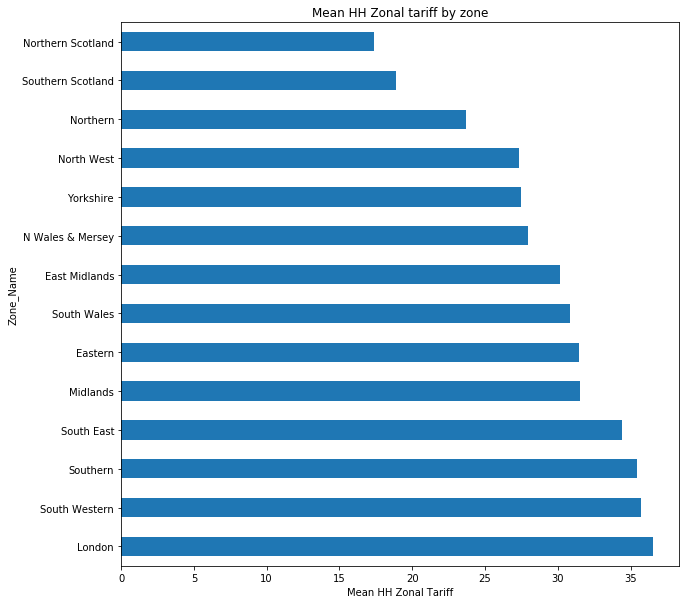

In [21]:
plt.figure(figsize=(10,10))
df.groupby("zone_name").mean()["hh_zonal"].nlargest(14).plot(kind="barh")
plt.xlabel("Mean HH Zonal Tariff")
plt.ylabel("Zone_Name")
plt.title("Mean HH Zonal tariff by zone")

### From here we can see that the London demand zone is the most expensive and the Northern Scotalnd is the cheapest. I think that the norhtern zones in the UK are cheaper than the southern demand zones. Why?

In [39]:
lasso_selected

{'Southern Scotland': ('nhh_zonal',
  'residual',
  'log_nd',
  'inflation',
  'operation_cost',
  'amortization',
  'revenue',
  'total_liabilities',
  'net_payroll_costs',
  'number_of_employees',
  'tax',
  'adj_close'),
 'Northern': ('operation_cost',
  'total_liabilities',
  'number_of_employees',
  'tax',
  'adj_close'),
 'North West': ('nhh_zonal',
  'residual',
  'inflation',
  'operation_cost',
  'amortization',
  'revenue',
  'total_liabilities',
  'net_payroll_costs',
  'number_of_employees',
  'tax',
  'adj_close'),
 'Yorkshire': ('operation_cost',
  'revenue',
  'total_liabilities',
  'number_of_employees',
  'adj_close'),
 'N Wales & Mersey': ('nhh_zonal',
  'residual',
  'inflation',
  'operation_cost',
  'amortization',
  'revenue',
  'total_liabilities',
  'net_payroll_costs',
  'number_of_employees',
  'tax',
  'adj_close'),
 'East Midlands': ('operation_cost',
  'revenue',
  'number_of_employees',
  'adj_close'),
 'Midlands': ('nhh_zonal',
  'residual',
  'inflation'

### I would like to have understanding on the features I have, so I will try a feature importnace of a ensemble method in my case I will use sklearn ExtraTreeRegressor. Question to Eszter If I have extremly low amount of data, will bootstraping make sense. I think its not, but how would you proceed.

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
trees_selected = {}
def plot_feat_imp_tree(zone,n_estimators=10,grang_feat = False,return_dict=False):
    #filtering for the zone
    temp = df[df.zone_name == zone]
    #dropping some features that are not required
    X = temp.drop(["zone_name","year","hh_zonal"],axis=1)
    #if to include the grangers test selected features
    if grang_feat:
        X = temp[list(grangers_selected_features[zone])]
    y = temp[["hh_zonal"]]
    #instance of ExtraTreesRegressor
    reg = ExtraTreesRegressor(n_estimators=n_estimators,bootstrap=False,random_state=42,max_features="auto")
    #fitting 
    reg = reg.fit(X, y)
    #plotting
    plt.figure(figsize=(10,10))
    pd.Series(reg.feature_importances_,index=X.columns).nlargest(10).plot(kind="bar")
    plt.title("Feature Importance for zone:"+zone)
    plt.show()

    if return_dict:
        trees_selected[zone] = pd.Series(reg.feature_importances_,index=X.columns).nlargest(5)        
    
    

Southern Scotland


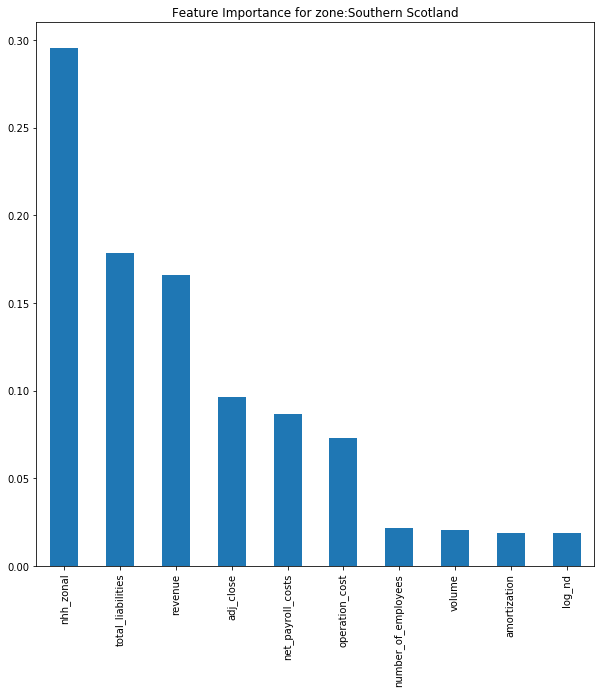

Northern


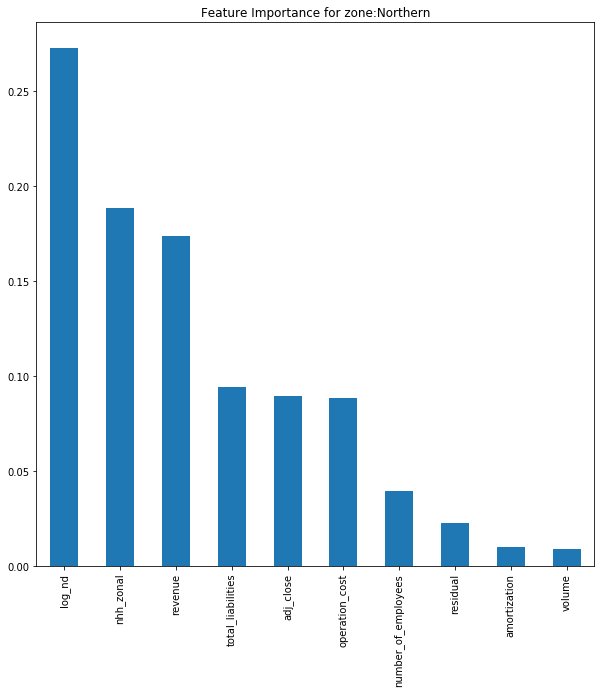

North West


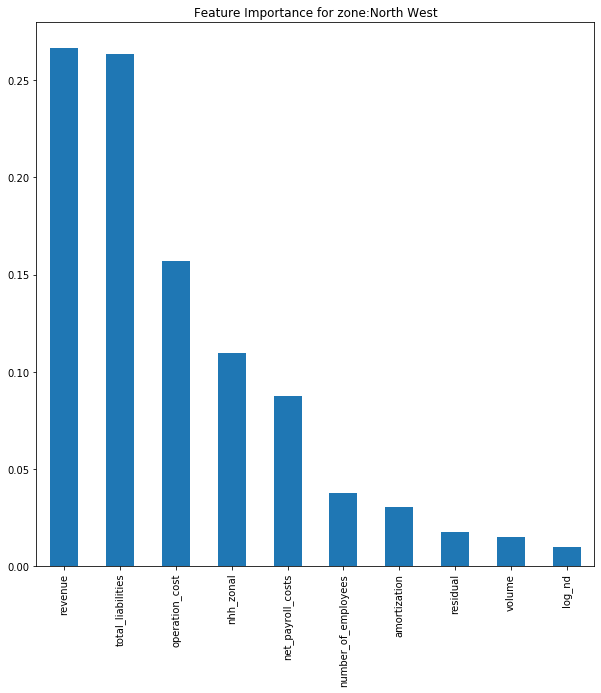

Yorkshire


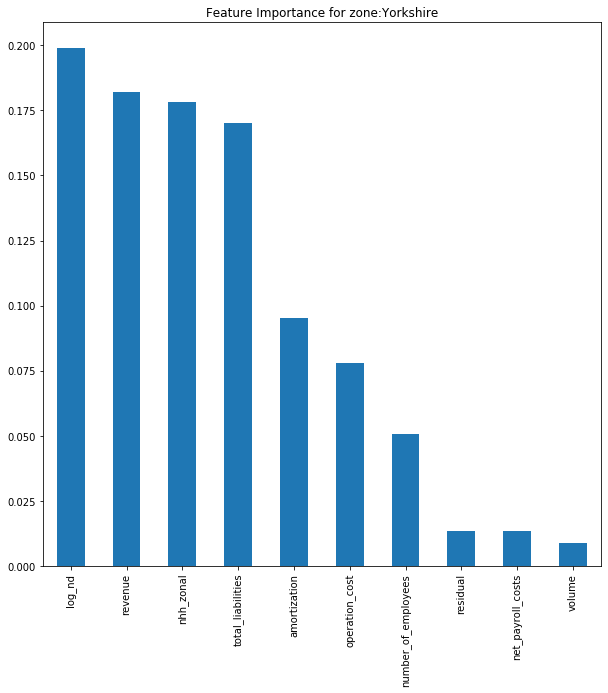

N Wales & Mersey


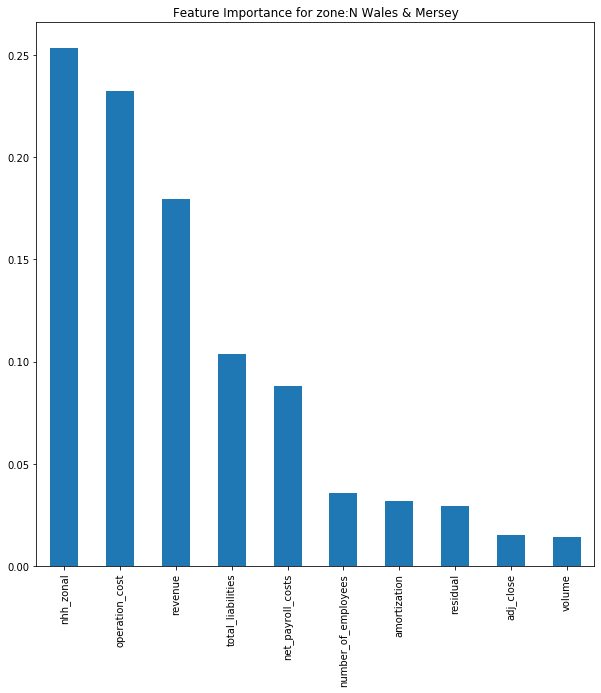

East Midlands


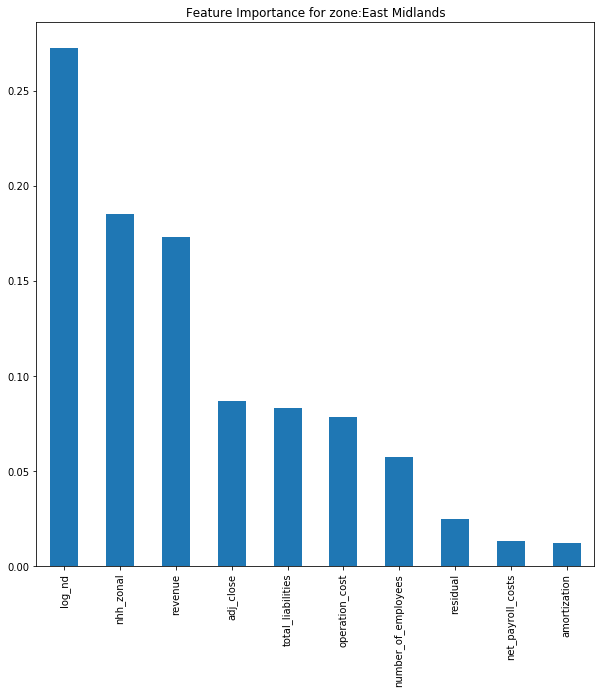

Midlands


Eastern


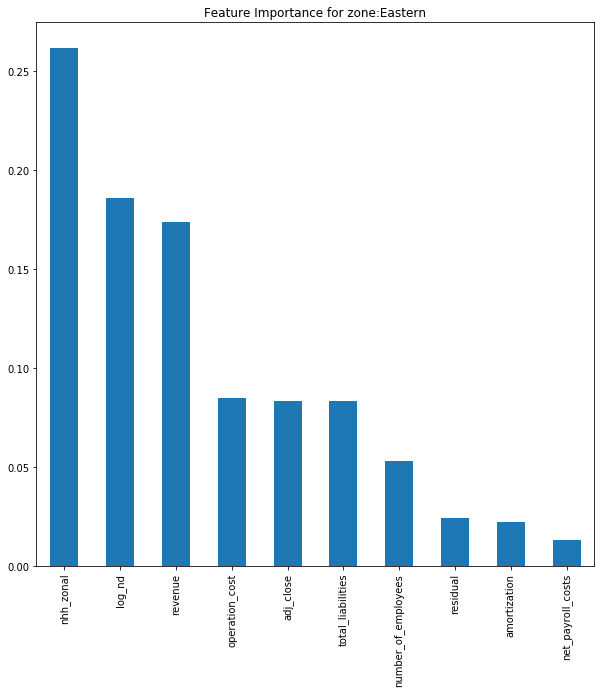

South Wales


South East


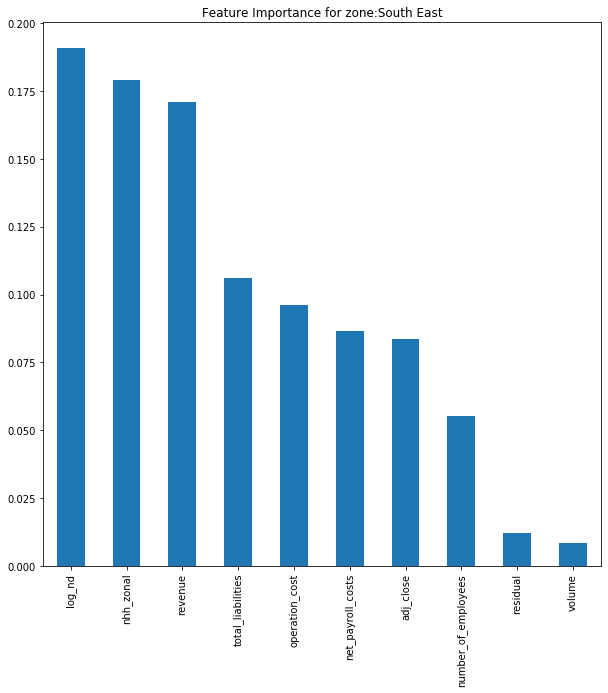

London


Southern


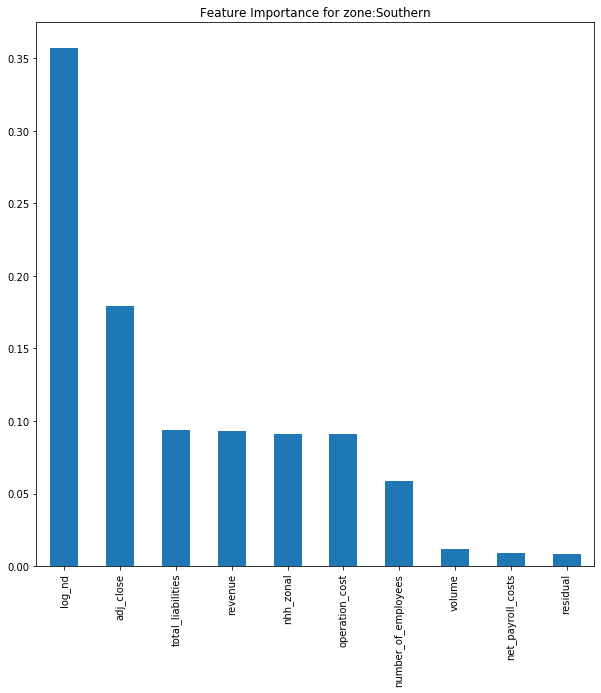

South Western


Northern Scotland


In [47]:
for i in zones:
    print(i)
    plot_feat_imp_tree(i)

In [24]:
grangers_matricies={}
grangers_selected_features = {}
for zone in zones:
    temp = df[df.zone_name == zone]
#    temp.set_index("settlement_date",inplace = True)

    temp.drop(["zone_name","year"],axis=1,inplace=True)
    
    print("ZONE:",zone)
    grangers_df = ts.grangers_causation_matrix(temp,temp.columns,maxlag=2)
    p_values = (grangers_df[grangers_df.index == "hh_zonal_y"])
    grangers_matricies[zone] = p_values
    display(p_values.T)
    sel_features = []
    #going through the p-values and if its below 0.05, then its selected
    for i,j in p_values.iteritems():
        if j[0] <= 0.05:
            #get rid of _x in each of them
            i_sub = i.replace("_x","")
            
            sel_features.append(i_sub)
    print("SELECTED FEATURES:",sel_features)
    #put it to the dictionary
    grangers_selected_features[zone]= sel_features
    
    
    
    print("_______________________________________")
    print("\n")

ZONE: Southern Scotland


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0000
residual_x                 0.8533
log_nd_x                   0.0034
inflation_x                0.0249
operation_cost_x           0.0163
amortization_x             0.0009
revenue_x                  0.0015
total_liabilities_x        0.0020
net_payroll_costs_x        0.4876
number_of_employees_x      0.1593
tax_x                      0.0120
adj_close_x                0.0047
volume_x                   0.3618

SELECTED FEATURES: ['nhh_zonal', 'log_nd', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'tax', 'adj_close']
_______________________________________


ZONE: Northern


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0000
residual_x                 0.4917
log_nd_x                   0.0824
inflation_x                0.0479
operation_cost_x           0.3209
amortization_x             0.0039
revenue_x                  0.0418
total_liabilities_x        0.0013
net_payroll_costs_x        0.8049
number_of_employees_x      0.2454
tax_x                      0.0162
adj_close_x                0.0435
volume_x                   0.2644

SELECTED FEATURES: ['nhh_zonal', 'inflation', 'amortization', 'revenue', 'total_liabilities', 'tax', 'adj_close']
_______________________________________


ZONE: North West


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0000
residual_x                 0.2046
log_nd_x                   0.1406
inflation_x                0.0208
operation_cost_x           0.5993
amortization_x             0.0001
revenue_x                  0.1055
total_liabilities_x        0.0002
net_payroll_costs_x        0.3696
number_of_employees_x      0.1060
tax_x                      0.2252
adj_close_x                0.0024
volume_x                   0.1538

SELECTED FEATURES: ['nhh_zonal', 'inflation', 'amortization', 'total_liabilities', 'adj_close']
_______________________________________


ZONE: Yorkshire


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0094
residual_x                 0.0720
log_nd_x                   0.2151
inflation_x                0.0360
operation_cost_x           0.8446
amortization_x             0.0009
revenue_x                  0.3224
total_liabilities_x        0.0001
net_payroll_costs_x        0.2268
number_of_employees_x      0.0925
tax_x                      0.2897
adj_close_x                0.0097
volume_x                   0.1007

SELECTED FEATURES: ['nhh_zonal', 'inflation', 'amortization', 'total_liabilities', 'adj_close']
_______________________________________


ZONE: N Wales & Mersey


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0006
residual_x                 0.1875
log_nd_x                   0.0989
inflation_x                0.0086
operation_cost_x           0.5099
amortization_x             0.0006
revenue_x                  0.0761
total_liabilities_x        0.0000
net_payroll_costs_x        0.2172
number_of_employees_x      0.0822
tax_x                      0.2098
adj_close_x                0.0002
volume_x                   0.1769

SELECTED FEATURES: ['nhh_zonal', 'inflation', 'amortization', 'total_liabilities', 'adj_close']
_______________________________________


ZONE: East Midlands


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0116
residual_x                 0.0232
log_nd_x                   0.3569
inflation_x                0.0448
operation_cost_x           0.7916
amortization_x             0.0014
revenue_x                  0.5130
total_liabilities_x        0.0001
net_payroll_costs_x        0.2502
number_of_employees_x      0.0280
tax_x                      0.4188
adj_close_x                0.0029
volume_x                   0.0816

SELECTED FEATURES: ['nhh_zonal', 'residual', 'inflation', 'amortization', 'total_liabilities', 'number_of_employees', 'adj_close']
_______________________________________


ZONE: Midlands


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0010
residual_x                 0.1217
log_nd_x                   0.1777
inflation_x                0.0201
operation_cost_x           0.7664
amortization_x             0.0046
revenue_x                  0.3458
total_liabilities_x        0.0000
net_payroll_costs_x        0.1664
number_of_employees_x      0.1175
tax_x                      0.2879
adj_close_x                0.0008
volume_x                   0.1268

SELECTED FEATURES: ['nhh_zonal', 'inflation', 'amortization', 'total_liabilities', 'adj_close']
_______________________________________


ZONE: Eastern


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0001
residual_x                 0.0047
log_nd_x                   0.0765
inflation_x                0.0853
operation_cost_x           0.7261
amortization_x             0.0921
revenue_x                  0.8088
total_liabilities_x        0.0003
net_payroll_costs_x        0.2924
number_of_employees_x      0.0137
tax_x                      0.1589
adj_close_x                0.0037
volume_x                   0.0666

SELECTED FEATURES: ['nhh_zonal', 'residual', 'total_liabilities', 'number_of_employees', 'adj_close']
_______________________________________


ZONE: South Wales


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.1290
residual_x                 0.3385
log_nd_x                   0.0091
inflation_x                0.0430
operation_cost_x           0.0000
amortization_x             0.0000
revenue_x                  0.0000
total_liabilities_x        0.0000
net_payroll_costs_x        0.0491
number_of_employees_x      0.0017
tax_x                      0.5904
adj_close_x                0.0000
volume_x                   0.0060

SELECTED FEATURES: ['log_nd', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'adj_close', 'volume']
_______________________________________


ZONE: South East


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.3223
residual_x                 0.0019
log_nd_x                   0.0108
inflation_x                0.0848
operation_cost_x           0.5898
amortization_x             0.1001
revenue_x                  0.2500
total_liabilities_x        0.0001
net_payroll_costs_x        0.1846
number_of_employees_x      0.0831
tax_x                      0.5871
adj_close_x                0.0009
volume_x                   0.1273

SELECTED FEATURES: ['residual', 'log_nd', 'total_liabilities', 'adj_close']
_______________________________________


ZONE: London


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0000
residual_x                 0.5954
log_nd_x                   0.4150
inflation_x                0.1862
operation_cost_x           0.5542
amortization_x             0.0004
revenue_x                  0.0757
total_liabilities_x        0.0000
net_payroll_costs_x        0.1221
number_of_employees_x      0.0044
tax_x                      0.3926
adj_close_x                0.0000
volume_x                   0.1743

SELECTED FEATURES: ['nhh_zonal', 'amortization', 'total_liabilities', 'number_of_employees', 'adj_close']
_______________________________________


ZONE: Southern


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0008
residual_x                 0.4576
log_nd_x                   0.3096
inflation_x                0.0436
operation_cost_x           0.0347
amortization_x             0.0000
revenue_x                  0.0524
total_liabilities_x        0.0001
net_payroll_costs_x        0.0002
number_of_employees_x      0.0720
tax_x                      0.4662
adj_close_x                0.0034
volume_x                   0.0708

SELECTED FEATURES: ['nhh_zonal', 'inflation', 'operation_cost', 'amortization', 'total_liabilities', 'net_payroll_costs', 'adj_close']
_______________________________________


ZONE: South Western


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.4674
residual_x                 0.6112
log_nd_x                   0.2369
inflation_x                0.0351
operation_cost_x           0.0170
amortization_x             0.0210
revenue_x                  0.0037
total_liabilities_x        0.0000
net_payroll_costs_x        0.0000
number_of_employees_x      0.0456
tax_x                      0.3390
adj_close_x                0.0001
volume_x                   0.0023

SELECTED FEATURES: ['inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'net_payroll_costs', 'number_of_employees', 'adj_close', 'volume']
_______________________________________


ZONE: Northern Scotland


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0000
residual_x                 0.3133
log_nd_x                   0.0000
inflation_x                0.0000
operation_cost_x           0.0035
amortization_x             0.0003
revenue_x                  0.0002
total_liabilities_x        0.0160
net_payroll_costs_x        0.6731
number_of_employees_x      0.3679
tax_x                      0.0050
adj_close_x                0.0000
volume_x                   0.1178

SELECTED FEATURES: ['nhh_zonal', 'log_nd', 'inflation', 'operation_cost', 'amortization', 'revenue', 'total_liabilities', 'tax', 'adj_close']
_______________________________________




 ### Plotting again Feature Importance but now with the features from the grangers test(features with p-value less than 0.05)

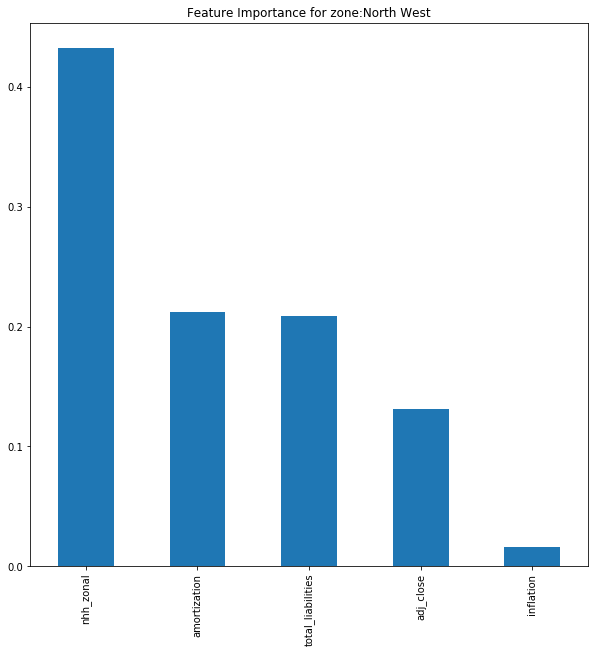

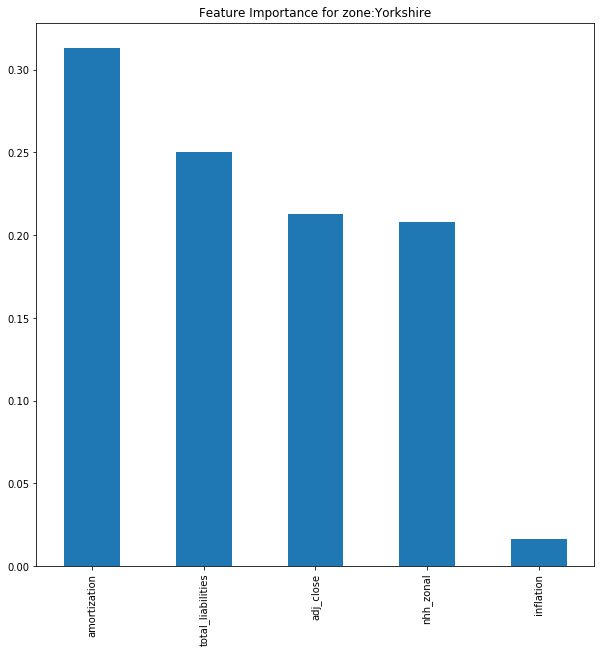

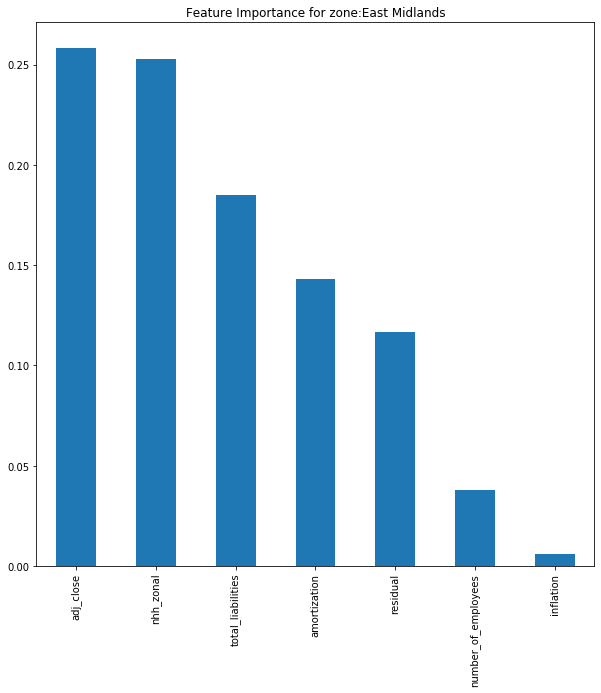

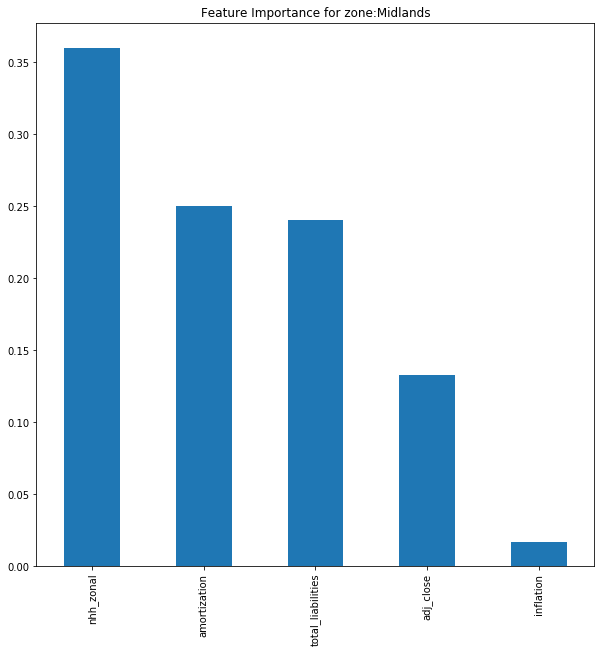

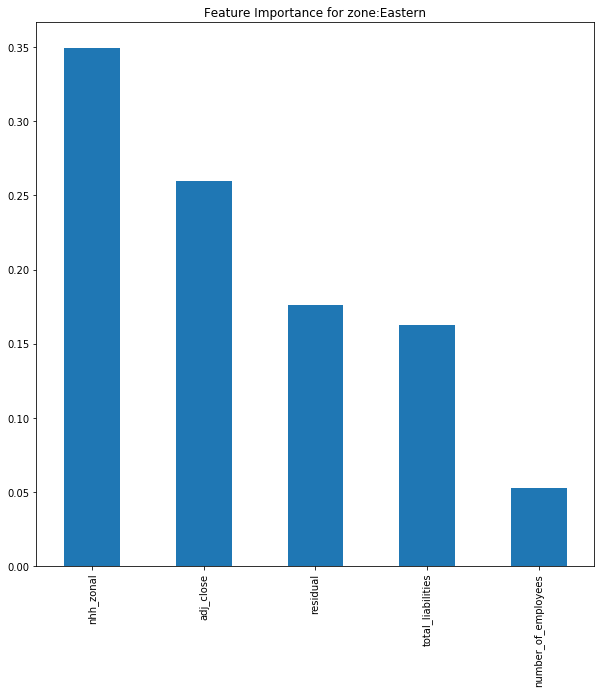

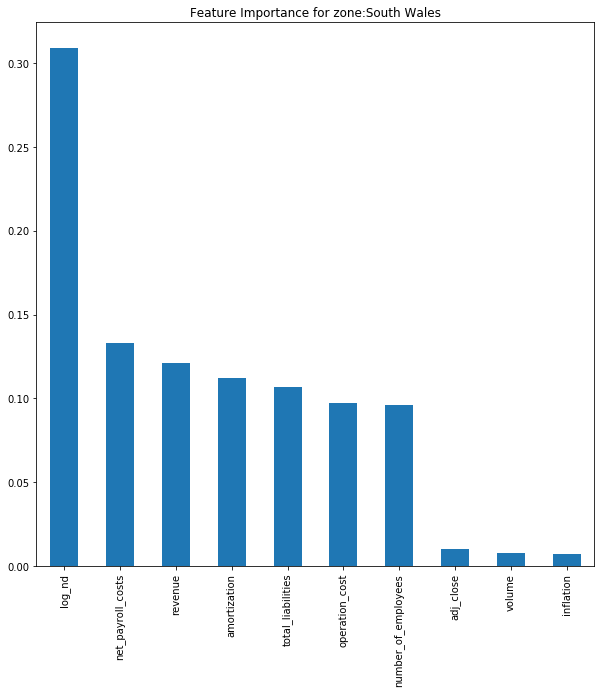

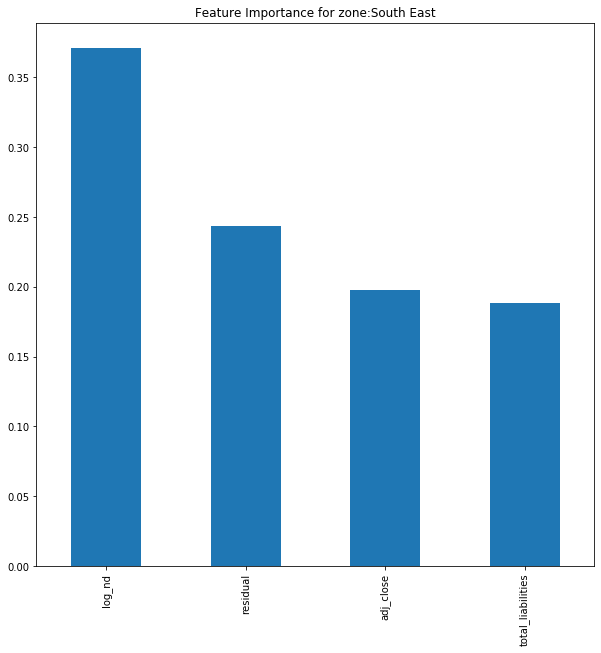

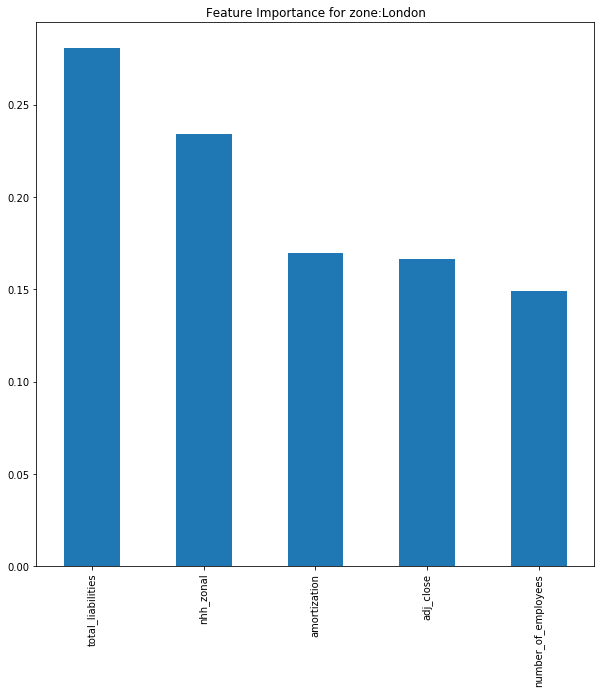

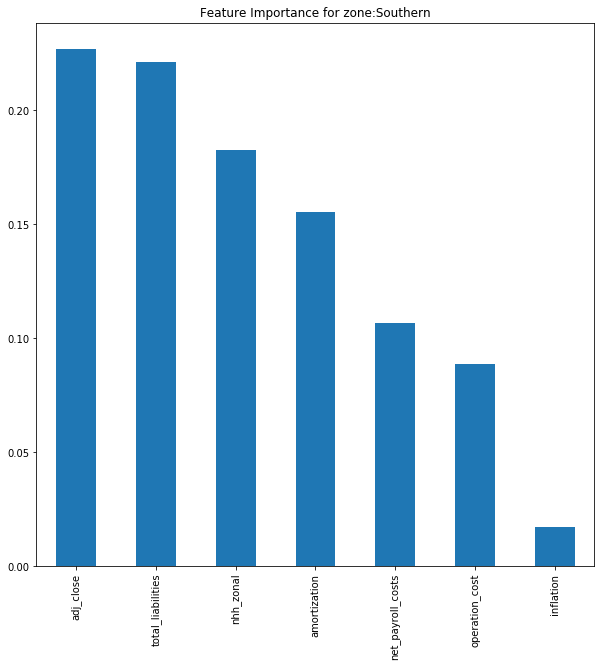

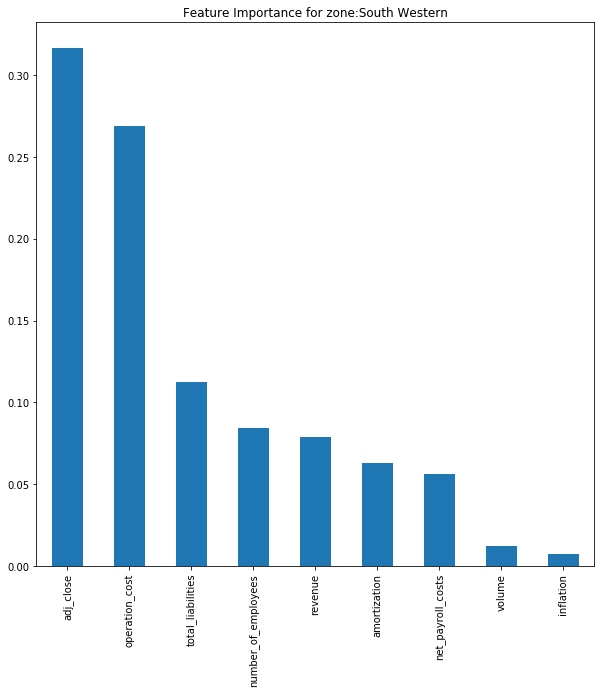

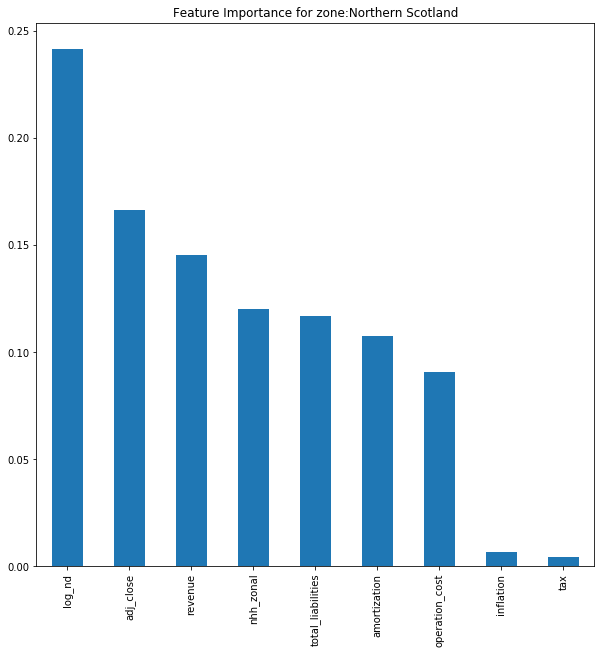

In [25]:
for zone in zones:
    plot_feat_imp_tree(zone,n_estimators=20,grang_feat=True,return_dict=True)

### Trying again OLS with the features I got from grangers test

In [26]:
for zone in zones:
    print("Summary of OLS with the features from tree_importance",zone)
    print("\n")
    make_lin_reg(zone,tree_feat=True)
    print("**********************************")

Summary of OLS with the features from tree_importance Southern Scotland




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              106.8
Date:                Thu, 28 May 2020   Prob (F-statistic):                    1.88e-06
Time:                        09:17:42   Log-Likelihood:                         -27.762
No. Observations:                  12   AIC:                                      65.52
Df Residuals:                       7   BIC:                                      67.95
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
total_liabilities    -0.0018      0.002     -0.908      0.394      -0.006       0.003
revenue               0.0061      0.005      1.284      0.240      -0.005       0.017
amortization         -0.0075      0.040     -0.190      0.855      -0.101       0.086
adj_close             0.0444      0.015      3.029      0.019       0.010       0.079
log_nd               -0.4131      0.297     -1.392      0.207      -1.115       0.289
==============================================================================
Omnibus:                        0.198   Durbin-Watson:                   2.609
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.097
Skew:                           0.135   Prob(JB):                        0.953
Kurtosis:                       2.651   Cond. No.                     3.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance Northern




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              652.2
Date:                Thu, 28 May 2020   Prob (F-statistic):                    3.52e-09
Time:                        09:17:42   Log-Likelihood:                         -19.390
No. Observations:                  12   AIC:                                      48.78
Df Residuals:                       7   BIC:                                      51.20
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
adj_close            -0.0008      0.012     -0.068      0.948      -0.030       0.028
nhh_zonal             5.8055      1.191      4.872      0.002       2.988       8.623
revenue              -0.0012      0.003     -0.378      0.717      -0.008       0.006
total_liabilities  1.666e-06      0.001      0.001      0.999      -0.003       0.003
amortization          0.0271      0.020      1.368      0.214      -0.020       0.074
==============================================================================
Omnibus:                        2.169   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.228
Skew:                           0.769   Prob(JB):                        0.541
Kurtosis:                       2.699   Cond. No.                     2.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance North West




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              1381.
Date:                Thu, 28 May 2020   Prob (F-statistic):                    2.56e-10
Time:                        09:17:42   Log-Likelihood:                         -16.308
No. Observations:                  12   AIC:                                      42.62
Df Residuals:                       7   BIC:                                      45.04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
nhh_zonal             7.1633      0.925      7.740      0.000       4.975       9.352
amortization          0.0229      0.019      1.208      0.266      -0.022       0.068
total_liabilities    -0.0009      0.001     -1.710      0.131      -0.002       0.000
adj_close             0.0027      0.007      0.404      0.699      -0.013       0.018
inflation            -0.0090      0.076     -0.118      0.910      -0.189       0.171
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.629
Skew:                           0.501   Prob(JB):                        0.730
Kurtosis:                       2.496   Cond. No.                     2.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance Yorkshire




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              951.3
Date:                Thu, 28 May 2020   Prob (F-statistic):                    9.42e-10
Time:                        09:17:42   Log-Likelihood:                         -18.581
No. Observations:                  12   AIC:                                      47.16
Df Residuals:                       7   BIC:                                      49.59
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
amortization          0.0394      0.022      1.793      0.116      -0.013       0.091
total_liabilities    -0.0005      0.001     -0.737      0.485      -0.002       0.001
adj_close            -0.0087      0.009     -0.928      0.384      -0.031       0.014
nhh_zonal             6.5460      1.089      6.012      0.001       3.971       9.121
inflation            -0.0240      0.093     -0.257      0.804      -0.244       0.196
==============================================================================
Omnibus:                        3.499   Durbin-Watson:                   2.482
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                0.995
Skew:                           0.556   Prob(JB):                        0.608
Kurtosis:                       3.868   Cond. No.                     2.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance N Wales & Mersey




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              806.7
Date:                Thu, 28 May 2020   Prob (F-statistic):                    1.68e-09
Time:                        09:17:42   Log-Likelihood:                         -19.768
No. Observations:                  12   AIC:                                      49.54
Df Residuals:                       7   BIC:                                      51.96
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
nhh_zonal             6.4656      1.056      6.122      0.000       3.968       8.963
amortization          0.0515      0.024      2.187      0.065      -0.004       0.107
total_liabilities    -0.0008      0.001     -1.074      0.318      -0.003       0.001
adj_close            -0.0117      0.010     -1.168      0.281      -0.035       0.012
inflation            -0.0057      0.100     -0.057      0.956      -0.243       0.231
==============================================================================
Omnibus:                        1.102   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.576   Jarque-Bera (JB):                0.585
Skew:                          -0.518   Prob(JB):                        0.746
Kurtosis:                       2.689   Cond. No.                     1.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance East Midlands




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              2111.
Date:                Thu, 28 May 2020   Prob (F-statistic):                    5.81e-11
Time:                        09:17:42   Log-Likelihood:                         -14.800
No. Observations:                  12   AIC:                                      39.60
Df Residuals:                       7   BIC:                                      42.02
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
adj_close            -0.0034      0.006     -0.563      0.591      -0.018       0.011
nhh_zonal             6.5095      1.061      6.136      0.000       4.001       9.018
total_liabilities    -0.0004      0.000     -0.746      0.480      -0.002       0.001
amortization          0.0207      0.014      1.454      0.189      -0.013       0.054
residual              0.0771      0.064      1.199      0.270      -0.075       0.229
==============================================================================
Omnibus:                        1.716   Durbin-Watson:                   3.284
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                0.839
Skew:                           0.640   Prob(JB):                        0.658
Kurtosis:                       2.807   Cond. No.                     2.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance Midlands




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              1670.
Date:                Thu, 28 May 2020   Prob (F-statistic):                    1.32e-10
Time:                        09:17:42   Log-Likelihood:                         -16.635
No. Observations:                  12   AIC:                                      43.27
Df Residuals:                       7   BIC:                                      45.70
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
nhh_zonal             6.7741      1.002      6.763      0.000       4.405       9.143
amortization          0.0181      0.021      0.854      0.421      -0.032       0.068
total_liabilities    -0.0007      0.001     -1.209      0.266      -0.002       0.001
adj_close             0.0035      0.006      0.557      0.595      -0.012       0.019
inflation             0.0120      0.078      0.154      0.882      -0.172       0.196
==============================================================================
Omnibus:                        8.256   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                4.229
Skew:                           1.380   Prob(JB):                        0.121
Kurtosis:                       3.915   Cond. No.                     2.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance Eastern




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              4289.
Date:                Thu, 28 May 2020   Prob (F-statistic):                    4.87e-12
Time:                        09:17:42   Log-Likelihood:                         -11.038
No. Observations:                  12   AIC:                                      32.08
Df Residuals:                       7   BIC:                                      34.50
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
nhh_zonal               5.6900      0.606      9.388      0.000       4.257       7.123
adj_close               0.0069      0.004      1.744      0.125      -0.002       0.016
residual                0.0254      0.061      0.420      0.687      -0.118       0.169
total_liabilities       0.0003      0.001      0.489      0.640      -0.001       0.002
number_of_employees    -0.0003      0.002     -0.159      0.878      -0.004       0.004
==============================================================================
Omnibus:                        1.643   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                0.802
Skew:                           0.625   Prob(JB):                        0.670
Kurtosis:                       2.800   Cond. No.                     2.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance South Wales




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              941.0
Date:                Thu, 28 May 2020   Prob (F-statistic):                    9.79e-10
Time:                        09:17:42   Log-Likelihood:                         -19.605
No. Observations:                  12   AIC:                                      49.21
Df Residuals:                       7   BIC:                                      51.63
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
log_nd               -0.0152      0.167     -0.091      0.930      -0.410       0.379
net_payroll_costs    -0.0372      0.058     -0.645      0.539      -0.173       0.099
revenue               0.0107      0.003      3.540      0.009       0.004       0.018
amortization          0.0834      0.025      3.343      0.012       0.024       0.142
total_liabilities    -0.0028      0.001     -2.442      0.045      -0.006    -8.9e-05
==============================================================================
Omnibus:                        0.330   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.459
Skew:                           0.165   Prob(JB):                        0.795
Kurtosis:                       2.101   Cond. No.                     3.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance South East




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              358.6
Date:                Thu, 28 May 2020   Prob (F-statistic):                    4.71e-09
Time:                        09:17:42   Log-Likelihood:                         -28.980
No. Observations:                  12   AIC:                                      65.96
Df Residuals:                       8   BIC:                                      67.90
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
log_nd               -0.0722      0.346     -0.208      0.840      -0.871       0.726
residual              0.3382      0.168      2.012      0.079      -0.049       0.726
adj_close             0.0175      0.015      1.146      0.285      -0.018       0.053
total_liabilities     0.0019      0.002      1.182      0.271      -0.002       0.006
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.133
Skew:                           0.740   Prob(JB):                        0.568
Kurtosis:                       2.726   Cond. No.                     3.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance London




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              312.7
Date:                Thu, 28 May 2020   Prob (F-statistic):                    4.56e-08
Time:                        09:17:42   Log-Likelihood:                         -28.325
No. Observations:                  12   AIC:                                      66.65
Df Residuals:                       7   BIC:                                      69.07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
total_liabilities      -0.0023      0.003     -0.885      0.405      -0.008       0.004
nhh_zonal               2.4510      3.153      0.777      0.462      -5.004       9.906
amortization            0.0930      0.039      2.366      0.050    6.63e-05       0.186
adj_close               0.0237      0.017      1.391      0.207      -0.017       0.064
number_of_employees     0.0007      0.006      0.102      0.922      -0.015       0.016
==============================================================================
Omnibus:                        0.470   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.433
Skew:                           0.364   Prob(JB):                        0.805
Kurtosis:                       2.421   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance Southern




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              2240.
Date:                Thu, 28 May 2020   Prob (F-statistic):                    4.73e-11
Time:                        09:17:42   Log-Likelihood:                         -16.204
No. Observations:                  12   AIC:                                      42.41
Df Residuals:                       7   BIC:                                      44.83
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
adj_close             0.0156      0.007      2.342      0.052      -0.000       0.031
total_liabilities    -0.0008      0.001     -1.556      0.164      -0.002       0.000
nhh_zonal             5.6873      1.045      5.444      0.001       3.217       8.158
amortization         -0.0053      0.022     -0.246      0.813      -0.057       0.046
net_payroll_costs     0.0630      0.036      1.768      0.120      -0.021       0.147
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.311
Skew:                          -0.206   Prob(JB):                        0.856
Kurtosis:                       2.328   Cond. No.                     2.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************
Summary of OLS with the features from tree_importance South Western




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              1528.
Date:                Thu, 28 May 2020   Prob (F-statistic):                    1.80e-10
Time:                        09:17:42   Log-Likelihood:                         -18.451
No. Observations:                  12   AIC:                                      46.90
Df Residuals:                       7   BIC:                                      49.33
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
adj_close               0.0200      0.006      3.111      0.017       0.005       0.035
operation_cost          0.0159      0.006      2.635      0.034       0.002       0.030
total_liabilities      -0.0012      0.001     -1.015      0.344      -0.004       0.002
number_of_employees     0.0020      0.003      0.706      0.503      -0.005       0.009
revenue                -0.0022      0.005     -0.401      0.700      -0.015       0.011
==============================================================================
Omnibus:                        0.290   Durbin-Watson:                   2.815
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.432
Skew:                           0.029   Prob(JB):                        0.806
Kurtosis:                       2.072   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**********************************
Summary of OLS with the features from tree_importance Northern Scotland




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               hh_zonal   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              56.94
Date:                Thu, 28 May 2020   Prob (F-statistic):                    0.000209
Time:                        09:17:42   Log-Likelihood:                         -24.307
No. Observations:                  10   AIC:                                      58.61
Df Residuals:                       5   BIC:                                      60.13
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
log_nd               -0.0443      0.592     -0.075      0.943      -1.567       1.478
adj_close             0.0426      0.032      1.342      0.237      -0.039       0.124
revenue              -0.0004      0.009     -0.041      0.969      -0.023       0.022
nhh_zonal             2.9818      2.791      1.068      0.334      -4.194      10.157
total_liabilities    -0.0017      0.004     -0.436      0.681      -0.011       0.008
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.800
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.138
Skew:                           0.021   Prob(JB):                        0.934
Kurtosis:                       2.427   Cond. No.                     2.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**********************************


### only nhh zonal is with low p-value, the other variables are high, and also I think the features are correlated.

### Nevermind I will build the first model, I know I should not build ARIMA model, because of not enough data, but I will stack them

In [410]:
## I will try first with yorkshire
york = df[df.zone_name == "Yorkshire"].drop(["zone_name","year"],axis=1)
york

hh_zonal  nhh_zonal   residual     log_nd  inflation  \
date                                                                
2007-12-31  13.615270   1.750626  14.061505  20.319042   5.588235   
2008-12-31  14.829178   1.935788  15.403402  20.313523  17.130920   
2009-12-31  16.297940   2.126680  16.943694  20.260050   0.237812   
2010-12-31  18.344745   2.520788  18.558560  20.277094   5.812574   
2011-12-31  19.582975   2.704505   3.607933  20.238285  11.883410   
2012-12-31  23.180244   3.216258  22.828373  20.241926   5.010020   
2013-12-31  25.485035   3.508859  25.408454  20.230591   3.339695   
2014-12-31  30.248609   4.112721  30.052442  20.180207   0.092336   
2015-12-31  36.287690   5.185476  35.634955  20.151214  -7.749077   
2016-12-31  42.493827   6.543088  45.333826  20.127212  -2.500000   
2017-12-31  44.967107   5.978783  47.260756  20.091862   6.051282   
2018-12-31  44.073211   5.785198  46.933426  20.087578   6.866538   

            operation_cost  amortization  revenue  total_liabilities  \
date                                                                   
2007-12-31          1433.0         245.0   1991.0             5887.0   
2008-12-31          1461.0         244.0   2106.0             6299.0   
2009-12-31          1848.0         221.0   2566.0             6681.0   
2010-12-31          1693.0         240.0   2484.0             6885.0   
2011-12-31          1730.0         264.0   2549.0             7022.0   
2012-12-31          1948.0         276.0   2813.0             8178.0   
2013-12-31          2102.0         325.0   3111.0             9854.0   
2014-12-31          2375.0         341.0   3393.0             9559.0   
2015-12-31          2529.0         375.0   3713.0            10467.0   
2016-12-31          2818.0         390.0   3979.0            10405.0   
2017-12-31          3093.0         419.0   4493.0            10801.0   
2018-12-31          3125.0         464.0   4158.0            10682.0   

            net_payroll_costs  number_of_employees    tax   adj_close  \
date                                                                    
2007-12-31               89.0               2073.0  126.0  393.191688   
2008-12-31               94.0               2288.0  140.0  371.787890   
2009-12-31              111.0               2352.0  153.0  335.913735   
2010-12-31               97.0               2488.0  183.0  367.357994   
2011-12-31              112.0               2784.0  139.0  434.997279   
2012-12-31              121.0               2978.0  101.0  508.046112   
2013-12-31              104.0               3229.0  161.0  605.459168   
2014-12-31              120.0               3044.0   79.0  725.807424   
2015-12-31              133.0               3270.0  203.0  779.542343   
2016-12-31              141.0               3520.0  114.0  921.059987   
2017-12-31              156.0               3692.0   87.0  854.296926   
2018-12-31              181.0               3679.0  165.0  739.531153   

                  volume  
date                      
2007-12-31  3.193817e+08  
2008-12-31  2.007195e+08  
2009-12-31  1.465296e+08  
2010-12-31  1.723851e+08  
2011-12-31  1.566390e+08  
2012-12-31  1.361455e+08  
2013-12-31  1.262065e+08  
2014-12-31  1.365219e+08  
2015-12-31  1.603617e+08  
2016-12-31  1.468067e+08  
2017-12-31  1.827168e+08  
2018-12-31  2.155613e+08

In [27]:
list(trees_selected["Yorkshire"].index)
def build_formula(list_of_features,target="hh_zonal"):
    formula = "hh_zonal~1+"
    for i in list_of_features:
        formula+=i+"+"
    return formula[:len(formula)-1]

build_formula(list(trees_selected["Yorkshire"].index))
    
    

'hh_zonal~1+amortization+total_liabilities+adj_close+nhh_zonal+inflation'

## Doing  amodel for yorkshire

In [29]:
import pyflux as pf
arimax_model = pf.ARIMAX(data=temp, formula=build_formula(list(trees_selected["Yorkshire"].index)),ar=1, ma=0)
x = arimax_model.fit()
x.summary()

Normal ARIMAX(1,0,0)                                                                                      
======================================================= ==================================================
Dependent Variable: hh_zonal                            Method: MLE                                       
Start Date: 2010-12-31                                  Log Likelihood: -17.2174                          
End Date: 2018-12-31                                    AIC: 50.4349                                      
Number of observations: 9                               BIC: 52.0126                                      
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    -0.6252    0.2617     -2.3891  0.0169   (-1.1382 | -0.1123)      
Beta 1                               

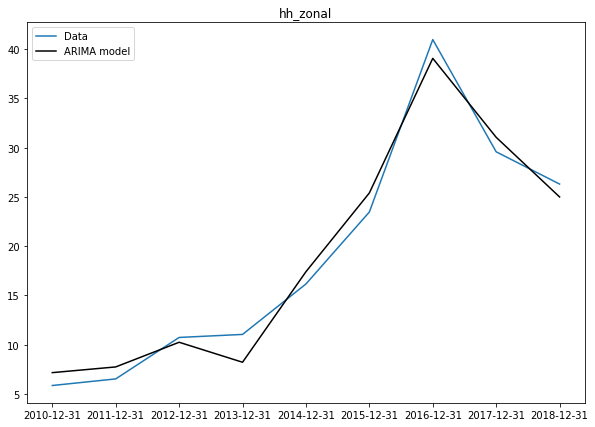

In [30]:
arimax_model.plot_fit()

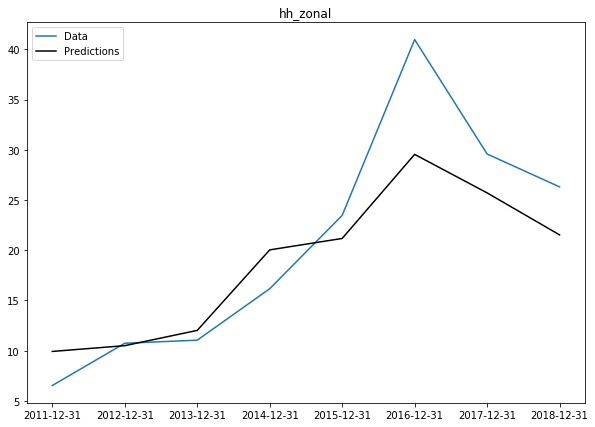

In [31]:
arimax_model.plot_predict_is(h=8,fit_method="MLE")

In [441]:
## I think there is a bug in the pyflux package.
## link of stackoverflow: https://stackoverflow.com/questions/42793253/pyflux-prediction-function

In [440]:
arimax_model.predict(oos_data=york,intervals=True)

hh_zonal  1% Prediction Interval  5% Prediction Interval  \
date                                                                    
2014-12-31   4.492927                0.644644                1.797233   
2015-12-31  14.717876               10.186886               11.482015   
2016-12-31   8.906423                4.185734                5.601598   
2017-12-31  15.758074               10.892805               12.290868   
2018-12-31  14.219308                9.438934               10.876769   

            95% Prediction Interval  99% Prediction Interval  
date                                                          
2014-12-31                 7.203908                 8.345954  
2015-12-31                17.888652                19.227920  
2016-12-31                12.263142                13.757214  
2017-12-31                19.107208                20.569179  
2018-12-31                17.671634                19.174550

In [443]:
df

zone_name   hh_zonal  nhh_zonal   residual    year  \
date                                                                     
2007-12-31  Southern Scotland   6.362303   0.830136  14.061505  2007.0   
2007-12-31           Northern   9.884146   1.287148  14.061505  2007.0   
2007-12-31         North West  13.646168   1.734890  14.061505  2007.0   
2007-12-31          Yorkshire  13.615270   1.750626  14.061505  2007.0   
2007-12-31   N Wales & Mersey  14.084355   1.805802  14.061505  2007.0   
...                       ...        ...        ...        ...     ...   
2018-12-31        South Wales  45.804410   5.552697  46.933426  2018.0   
2018-12-31         South East  52.110398   7.713198  46.933426  2018.0   
2018-12-31             London  54.906683   6.106170  46.933426  2018.0   
2018-12-31           Southern  53.419807   7.317489  46.933426  2018.0   
2018-12-31      South Western  51.867520   7.560093  46.933426  2018.0   

               log_nd  inflation  operation_cost  amortization  revenue  \
date                                                                      
2007-12-31  20.319042   5.588235          1433.0         245.0   1991.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   1991.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   1991.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   1991.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   1991.0   
...               ...        ...             ...           ...      ...   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   4158.0   

            total_liabilities  net_payroll_costs  number_of_employees    tax  \
date                                                                           
2007-12-31             5887.0               89.0               2073.0  126.0   
2007-12-31             5887.0               89.0               2073.0  126.0   
2007-12-31             5887.0               89.0               2073.0  126.0   
2007-12-31             5887.0               89.0               2073.0  126.0   
2007-12-31             5887.0               89.0               2073.0  126.0   
...                       ...                ...                  ...    ...   
2018-12-31            10682.0              181.0               3679.0  165.0   
2018-12-31            10682.0              181.0               3679.0  165.0   
2018-12-31            10682.0              181.0               3679.0  165.0   
2018-12-31            10682.0              181.0               3679.0  165.0   
2018-12-31            10682.0              181.0               3679.0  165.0   

             adj_close        volume  
date                                  
2007-12-31  393.191688  3.193817e+08  
2007-12-31  393.191688  3.193817e+08  
2007-12-31  393.191688  3.193817e+08  
2007-12-31  393.191688  3.193817e+08  
2007-12-31  393.191688  3.193817e+08  
...                ...           ...  
2018-12-31  739.531153  2.155613e+08  
2018-12-31  739.531153  2.155613e+08  
2018-12-31  739.531153  2.155613e+08  
2018-12-31  739.531153  2.155613e+08  
2018-12-31  739.531153  2.155613e+08  

[166 rows x 16 columns]

## Trying Prophet

#### NOTE: After some exhaustive trial and error, I realized strandardized total liabilities, are good exogenous regressor for this forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Southern Scotland




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  28.421898   20.946292   35.310192
1 2020-12-31  34.486345   27.748197   40.903101
2 2021-12-31  35.441629   28.039130   43.103727
3 2022-12-31  36.661239   29.892701   43.777662
4 2023-12-31  38.269197   31.446878   45.291896
5 2024-12-31  45.155598   38.323055   52.870293

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


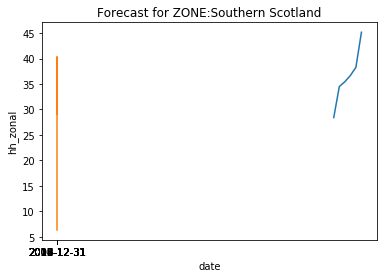

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Northern




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  36.554408   30.935729   42.296246
1 2020-12-31  41.535807   35.628214   47.044239
2 2021-12-31  43.381402   37.307602   48.474566
3 2022-12-31  45.548589   39.447778   51.092349
4 2023-12-31  48.169296   42.373299   53.964932
5 2024-12-31  54.029755   48.469207   59.970125

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


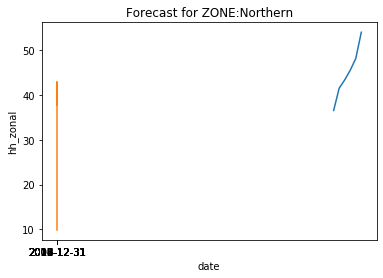

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: North West




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  47.699425   42.680261   52.892111
1 2020-12-31  52.025059   47.185833   57.302247
2 2021-12-31  54.480534   48.894463   59.450249
3 2022-12-31  57.284060   52.054177   62.494208
4 2023-12-31  60.434803   55.536502   65.377996
5 2024-12-31  64.751532   59.993143   69.871363

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Yorkshire




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  46.800007   42.217328   51.606809
1 2020-12-31  50.737473   45.941494   55.259589
2 2021-12-31  53.263225   48.571625   58.066423
3 2022-12-31  56.150593   51.265585   61.008052
4 2023-12-31  59.424183   54.733672   64.387392
5 2024-12-31  63.524347   58.401896   68.221226

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


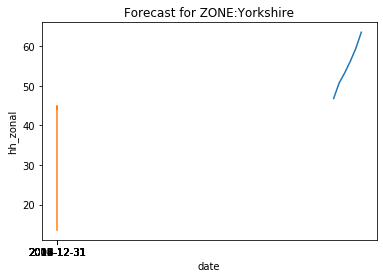

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: N Wales & Mersey




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  52.103850   47.001303   56.966378
1 2020-12-31  56.637235   51.723062   61.494257
2 2021-12-31  59.240226   54.330117   64.354192
3 2022-12-31  62.241800   56.680970   67.137152
4 2023-12-31  65.574542   60.117370   70.981622
5 2024-12-31  69.652386   64.602515   75.196297

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: East Midlands




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  50.202489   45.171961   55.456397
1 2020-12-31  53.870975   48.998342   58.910243
2 2021-12-31  56.583103   51.844355   61.433921
3 2022-12-31  59.615543   54.832015   64.499437
4 2023-12-31  62.985621   57.917143   67.769001
5 2024-12-31  66.768824   61.732974   71.578612

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


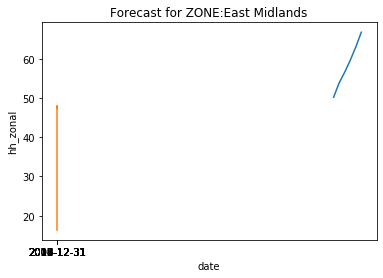

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Midlands




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  54.286443   49.615797   59.097313
1 2020-12-31  58.355308   53.810742   63.209661
2 2021-12-31  60.945583   56.172322   65.829857
3 2022-12-31  63.964382   59.195200   69.229323
4 2023-12-31  67.368269   62.504141   72.317052
5 2024-12-31  71.143426   66.064008   75.812910

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


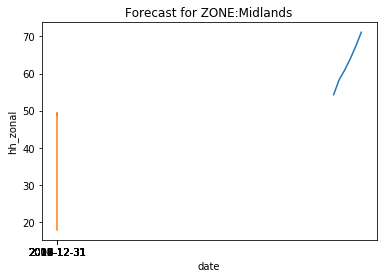

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Eastern




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  49.452372   44.387232   54.862983
1 2020-12-31  52.975453   47.745915   58.048185
2 2021-12-31  55.872240   50.720224   60.814143
3 2022-12-31  58.965127   54.128512   63.861229
4 2023-12-31  62.326496   57.055733   67.444709
5 2024-12-31  66.333975   61.291120   71.252863

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


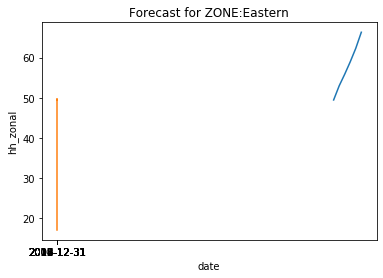

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: South Wales




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  48.130812   41.596452   54.142435
1 2020-12-31  51.441214   45.104866   58.075951
2 2021-12-31  53.522611   47.333548   60.164896
3 2022-12-31  55.795799   49.529428   61.896964
4 2023-12-31  58.231538   52.346183   64.894627
5 2024-12-31  61.343591   55.002782   67.557067

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


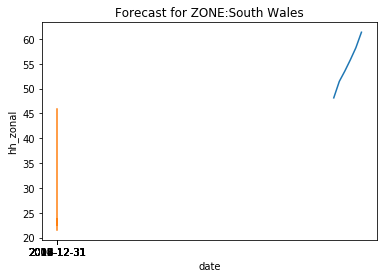

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: South East




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  53.839936   48.833739   59.021989
1 2020-12-31  57.070569   51.963805   62.201627
2 2021-12-31  60.064308   55.083918   65.210098
3 2022-12-31  63.270250   57.835492   68.362180
4 2023-12-31  66.729760   61.398426   71.839946
5 2024-12-31  70.237403   65.033407   75.289895

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


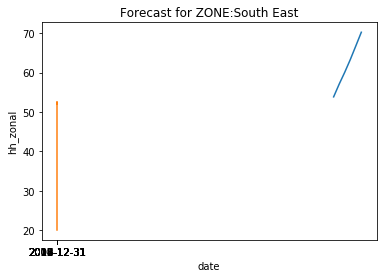

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: London




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  58.056627   52.661584   63.518803
1 2020-12-31  61.940321   56.500931   67.016714
2 2021-12-31  64.738323   59.064596   69.970947
3 2022-12-31  67.911008   62.450065   73.389242
4 2023-12-31  71.462531   65.580024   77.280642
5 2024-12-31  75.372313   69.910563   80.894022

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


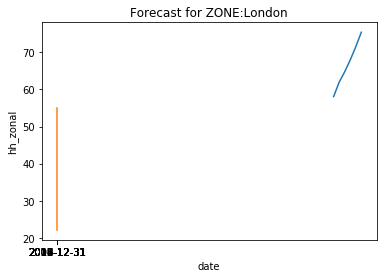

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Southern




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  55.538805   50.524329   60.416906
1 2020-12-31  59.023607   54.383406   63.575873
2 2021-12-31  61.859318   57.131853   66.549610
3 2022-12-31  65.049691   60.513683   69.718659
4 2023-12-31  68.626857   64.053842   73.111578
5 2024-12-31  72.326216   67.600616   76.762610

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


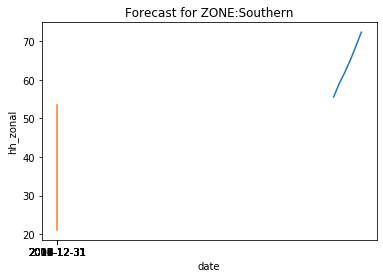

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: South Western




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  53.506668   48.499723   58.129161
1 2020-12-31  56.682773   52.074437   61.546373
2 2021-12-31  59.058357   54.269614   64.056666
3 2022-12-31  61.831843   56.895388   66.747877
4 2023-12-31  65.028576   60.419618   70.227572
5 2024-12-31  68.373598   63.194467   73.420631

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


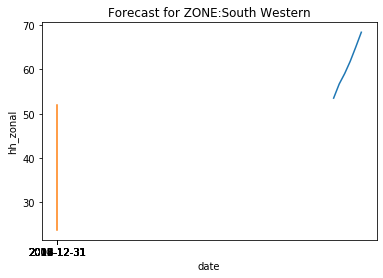

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


ZONE: Northern Scotland




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  33.858946   24.037437   43.642835
1 2020-12-31  44.603480   34.838639   54.080371
2 2021-12-31  45.471561   35.474577   55.793207
3 2022-12-31  46.523341   35.959672   55.738728
4 2023-12-31  47.813031   38.052079   57.566183
5 2024-12-31  58.608861   49.032689   68.523030

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


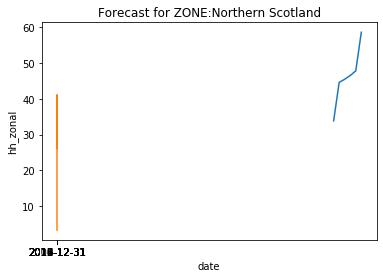

In [32]:
from fbprophet import Prophet
forecast_df = {}

def make_f(ds):
    date = (pd.to_datetime(ds)).date()
    
    if d_df[date:].empty:
        return future_temp_df[date:]['future_temp'].values[0]
    else:
        return (d_df[date:]['temp']).values[0]
    
    return 0
#create dataframes for all the zones
for i in zones:

    temp = df[df.zone_name == i]
    #drop zone name because its not required for now
    temp.drop("zone_name",axis=1,inplace=True)
    #reseting index to make the ds col for prophet
    temp = temp.reset_index()
    #rename to ds an y, because of prophet
    temp = temp.rename(columns = {"date":"ds",
                                 "hh_zonal":"y"})
    #print(temp)
    model = Prophet(interval_width=0.95)
    #adding regressors
    model.add_regressor("total_liabilities",standardize=True)# Do not ask why is total liablities, got this with
    #trial and error.
    #model.add_regressor("adj_close",standardize=True)
    #model.add_regressor("log_nd")
    model.fit(temp)
    #print("FItted")
    # 6 because I can evaluate the predictions
    future_dates = model.make_future_dataframe(6,freq="Y",include_history=False)
    
    #future_dates["log_nd"] = temp.log_nd
    future_dates["total_liabilities"] = temp.total_liabilities
    #future_dates["adj_close"] = temp.adj_close
    #future_dates["log_nd"] = temp.log_nd
    forecast = model.predict(future_dates)
    
    
    
    forecast = forecast[["ds","yhat","yhat_lower","yhat_upper"]]
    print("ZONE:",i)
    print("\n")
    display(forecast)
    
    forecast_df[i] = forecast
    
    temp_1 = df.reset_index()
    temp_1 = temp_1[temp_1.zone_name == i]
    sns.lineplot(y = "yhat",x="ds",data=forecast)
    sns.lineplot(y="hh_zonal",x="date",data=temp_1)
    plt.title("Forecast for ZONE:"+i)
    
    
    
    plt.show()
    

#### Northern Scotland is the worse for now, I can not find a reason why. I think because it moves down as the other demand zones are moving up.

### Now I am reading the forecast tables from National Grid

In [34]:
forecast_from_nget = pd.read_excel("../data/forecast_nget/TNUoS Forecast from 2020-21 to 2024-25 - Tables.xlsm",sheet_name="TC FD",skiprows=3)
#some unuseful columns
forecast_from_nget.drop(["Unnamed: 0","Zone","Unnamed: 8","Unnamed: 9"],axis=1,inplace=True)
forecast_from_nget = forecast_from_nget.iloc[1:15]
forecast_from_nget.columns = [i.lower().replace(" ","_") for i in forecast_from_nget.columns]
forecast_from_nget


zone_name  2020/21  2021/22  2022/23  2023/24  2024/25
1   Northern Scotland  23.0334  23.2669  24.6656  24.7851  26.5878
2   Southern Scotland  30.9748  32.3105  33.5333  33.4249   35.674
3            Northern   43.082  44.4393  45.5523  47.9927  49.7069
4          North West  50.3203  50.2695  52.3733   55.986  58.0277
5           Yorkshire  50.0222  51.4733  52.6488  56.0313   58.172
6    N Wales & Mersey  52.2461  51.3778  53.7511  58.2766  62.0142
7       East Midlands  53.5733  55.5369  57.3875   60.809  63.3985
8            Midlands  55.0895  56.2861  58.5221  62.5663   65.542
9             Eastern  55.3497  58.2412  59.7006  62.6955  65.3328
10        South Wales  50.8917  53.4876    57.51  62.3158   64.166
11         South East  57.7373  60.5816  62.3059  65.3747  68.1611
12             London   61.324  63.8995  66.1435  69.3206  72.2738
13           Southern  59.0107  61.7698  64.1056  67.2614  70.1771
14      South Western   57.099  59.8975  63.4575  64.4329  67.4592

In [35]:
forecast_from_nget[forecast_from_nget.zone_name == zone].T.reset_index().iloc[1:]

index        1
1  2020/21  23.0334
2  2021/22  23.2669
3  2022/23  24.6656
4  2023/24  24.7851
5  2024/25  26.5878

### Appending the prophet forecast

In [36]:
for zone in zones:
#dont have for 2019
    forecast_df[zone] = forecast_df[zone].iloc[1:]
    pred_nget = forecast_from_nget[forecast_from_nget.zone_name == zone].T.reset_index().iloc[1:]
    pred_nget.columns = ["ds","pred_nget"]
    forecast_df[zone]["nget_forecast"] = pred_nget["pred_nget"]
    

#### Forgot to add the name zone in the df

In [37]:
#add the zone name in forecast_df
for zone in zones:
    forecast_df[zone]["zone_name"] = zone

In [38]:
my_pred = pd.concat(forecast_df).reset_index().drop(["level_0","level_1"],axis=1).rename(columns = {"ds":"date"})
my_pred

date       yhat  yhat_lower  yhat_upper nget_forecast  \
0  2020-12-31  34.486345   27.748197   40.903101       30.9748   
1  2021-12-31  35.441629   28.039130   43.103727       32.3105   
2  2022-12-31  36.661239   29.892701   43.777662       33.5333   
3  2023-12-31  38.269197   31.446878   45.291896       33.4249   
4  2024-12-31  45.155598   38.323055   52.870293        35.674   
..        ...        ...         ...         ...           ...   
65 2020-12-31  44.603480   34.838639   54.080371       23.0334   
66 2021-12-31  45.471561   35.474577   55.793207       23.2669   
67 2022-12-31  46.523341   35.959672   55.738728       24.6656   
68 2023-12-31  47.813031   38.052079   57.566183       24.7851   
69 2024-12-31  58.608861   49.032689   68.523030       26.5878   

            zone_name  
0   Southern Scotland  
1   Southern Scotland  
2   Southern Scotland  
3   Southern Scotland  
4   Southern Scotland  
..                ...  
65  Northern Scotland  
66  Northern Scotland  
67  Northern Scotland  
68  Northern Scotland  
69  Northern Scotland  

[70 rows x 6 columns]

## Check if in the Prediction interval

In [39]:
def check_is_in_ci(j):
    if j.nget_forecast > j.yhat_upper or j.nget_forecast < j.yhat_lower:
        return False
    else:
        return True

In [40]:
my_pred["is_in_ci"] = my_pred.apply(check_is_in_ci,axis=1)
my_pred

date       yhat  yhat_lower  yhat_upper nget_forecast  \
0  2020-12-31  34.486345   27.748197   40.903101       30.9748   
1  2021-12-31  35.441629   28.039130   43.103727       32.3105   
2  2022-12-31  36.661239   29.892701   43.777662       33.5333   
3  2023-12-31  38.269197   31.446878   45.291896       33.4249   
4  2024-12-31  45.155598   38.323055   52.870293        35.674   
..        ...        ...         ...         ...           ...   
65 2020-12-31  44.603480   34.838639   54.080371       23.0334   
66 2021-12-31  45.471561   35.474577   55.793207       23.2669   
67 2022-12-31  46.523341   35.959672   55.738728       24.6656   
68 2023-12-31  47.813031   38.052079   57.566183       24.7851   
69 2024-12-31  58.608861   49.032689   68.523030       26.5878   

            zone_name  is_in_ci  
0   Southern Scotland      True  
1   Southern Scotland      True  
2   Southern Scotland      True  
3   Southern Scotland      True  
4   Southern Scotland     False  
..                ...       ...  
65  Northern Scotland     False  
66  Northern Scotland     False  
67  Northern Scotland     False  
68  Northern Scotland     False  
69  Northern Scotland     False  

[70 rows x 7 columns]

In [41]:
my_pred.is_in_ci.value_counts()

True     56
False    14
Name: is_in_ci, dtype: int64

#### With Prophet I have 70 predictions, and 15 of them are outside of the 95% PI, and the 15 rows below indicate the predictions that are outside of the interval

In [42]:
my_pred[my_pred.is_in_ci == False]

date       yhat  yhat_lower  yhat_upper nget_forecast  \
4  2024-12-31  45.155598   38.323055   52.870293        35.674   
14 2024-12-31  64.751532   59.993143   69.871363       58.0277   
19 2024-12-31  63.524347   58.401896   68.221226        58.172   
21 2021-12-31  59.240226   54.330117   64.354192       51.3778   
22 2022-12-31  62.241800   56.680970   67.137152       53.7511   
23 2023-12-31  65.574542   60.117370   70.981622       58.2766   
24 2024-12-31  69.652386   64.602515   75.196297       62.0142   
32 2022-12-31  63.964382   59.195200   69.229323       58.5221   
34 2024-12-31  71.143426   66.064008   75.812910        65.542   
65 2020-12-31  44.603480   34.838639   54.080371       23.0334   
66 2021-12-31  45.471561   35.474577   55.793207       23.2669   
67 2022-12-31  46.523341   35.959672   55.738728       24.6656   
68 2023-12-31  47.813031   38.052079   57.566183       24.7851   
69 2024-12-31  58.608861   49.032689   68.523030       26.5878   

            zone_name  is_in_ci  
4   Southern Scotland     False  
14         North West     False  
19          Yorkshire     False  
21   N Wales & Mersey     False  
22   N Wales & Mersey     False  
23   N Wales & Mersey     False  
24   N Wales & Mersey     False  
32           Midlands     False  
34           Midlands     False  
65  Northern Scotland     False  
66  Northern Scotland     False  
67  Northern Scotland     False  
68  Northern Scotland     False  
69  Northern Scotland     False

### Most of them are in Northern Scotalnd(as I assumed), however they are in the N Wales as well but they are close. In fact they are all close but Northern Scotalnd, because this demand zone does not have the same trend like the others.

# As a next model I chose a really simple one, because of the lack of data. The model is Holts model.

## Holt’s Method

Holt extended simple exponential smoothing (solution to data with no clear trend or seasonality) to allow the forecasting of data with trends in 1957. Holt’s method involves a forecast equation and two smoothing equations (one for the level and one for the trend):

where 0≤ α ≤1 is the level smoothing parameter, and 0≤ β* ≤1 is the trend smoothing parameter.

For long-term forecast, forecasting with Holt’s method will increase or decrease indefinitely into the future. In this case, I use the Damped trend method which has a damping parameter 0< ϕ <1 to prevent the forecast “go wild”.

In [45]:
## NEED TO COMPUTE PI
def compute_pred_intervals():
    pass

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing, Holt
holt_df = {}
for i in zones:
    #filtering the dataframe
    temp = df[df.zone_name==i]
    
    #define holts model
    holts_model = Holt(temp.hh_zonal).fit(smoothing_level=0.3,smoothing_slope=0.2,optimized = False)
    
    #forecast
    forecast = holts_model.forecast(6).rename("Holt for "+i+" zone")
    
    
    #appending to the dictionary
    holt_df[i] = pd.DataFrame(forecast)
    #displaying 
    display(pd.DataFrame(forecast))

Holt for Southern Scotland zone
2019-12-31                        35.633845
2020-12-31                        38.257336
2021-12-31                        40.880827
2022-12-31                        43.504318
2023-12-31                        46.127808
2024-12-31                        48.751299

Holt for Northern zone
2019-12-31               42.996158
2020-12-31               46.137613
2021-12-31               49.279069
2022-12-31               52.420524
2023-12-31               55.561979
2024-12-31               58.703435

Holt for North West zone
2019-12-31                 47.082980
2020-12-31                 50.353056
2021-12-31                 53.623132
2022-12-31                 56.893207
2023-12-31                 60.163283
2024-12-31                 63.433359

Holt for Yorkshire zone
2019-12-31                47.224890
2020-12-31                50.496071
2021-12-31                53.767252
2022-12-31                57.038433
2023-12-31                60.309614
2024-12-31                63.580795

Holt for N Wales & Mersey zone
2019-12-31                       48.093043
2020-12-31                       51.452904
2021-12-31                       54.812765
2022-12-31                       58.172626
2023-12-31                       61.532486
2024-12-31                       64.892347

Holt for East Midlands zone
2019-12-31                    50.157252
2020-12-31                    53.472795
2021-12-31                    56.788338
2022-12-31                    60.103881
2023-12-31                    63.419425
2024-12-31                    66.734968

Holt for Midlands zone
2019-12-31               51.267951
2020-12-31               54.553205
2021-12-31               57.838459
2022-12-31               61.123713
2023-12-31               64.408967
2024-12-31               67.694221

Holt for Eastern zone
2019-12-31              52.244519
2020-12-31              55.694905
2021-12-31              59.145292
2022-12-31              62.595678
2023-12-31              66.046065
2024-12-31              69.496451

Holt for South Wales zone
2019-12-31                  46.740581
2020-12-31                  49.403209
2021-12-31                  52.065838
2022-12-31                  54.728466
2023-12-31                  57.391095
2024-12-31                  60.053723

Holt for South East zone
2019-12-31                 54.956072
2020-12-31                 58.351549
2021-12-31                 61.747025
2022-12-31                 65.142501
2023-12-31                 68.537978
2024-12-31                 71.933454

Holt for London zone
2019-12-31             57.413309
2020-12-31             60.894153
2021-12-31             64.374997
2022-12-31             67.855841
2023-12-31             71.336685
2024-12-31             74.817529

Holt for Southern zone
2019-12-31               55.977127
2020-12-31               59.389577
2021-12-31               62.802027
2022-12-31               66.214477
2023-12-31               69.626927
2024-12-31               73.039377

Holt for South Western zone
2019-12-31                    53.965476
2020-12-31                    56.985237
2021-12-31                    60.004998
2022-12-31                    63.024760
2023-12-31                    66.044521
2024-12-31                    69.064282

Holt for Northern Scotland zone
2019-12-31                        34.924043
2020-12-31                        38.059680
2021-12-31                        41.195316
2022-12-31                        44.330953
2023-12-31                        47.466589
2024-12-31                        50.602226

#### Making the dataframes better

In [50]:
for zone in zones:
    
    temp = holt_df[zone].reset_index().iloc[1:]
    temp.columns = ["date","holts_prediction"]
    temp["zone_name"] = zone
    holt_df[zone]= temp

#### Making one dataframe of the dictionary of dataframes

In [51]:
holts_pred = pd.concat(holt_df).reset_index().drop(["level_0","level_1"],axis=1)

In [52]:
my_pred = holts_pred.merge(my_pred)
my_pred

date  holts_prediction          zone_name       yhat  yhat_lower  \
0  2020-12-31         38.257336  Southern Scotland  34.486345   27.748197   
1  2021-12-31         40.880827  Southern Scotland  35.441629   28.039130   
2  2022-12-31         43.504318  Southern Scotland  36.661239   29.892701   
3  2023-12-31         46.127808  Southern Scotland  38.269197   31.446878   
4  2024-12-31         48.751299  Southern Scotland  45.155598   38.323055   
..        ...               ...                ...        ...         ...   
65 2020-12-31         38.059680  Northern Scotland  44.603480   34.838639   
66 2021-12-31         41.195316  Northern Scotland  45.471561   35.474577   
67 2022-12-31         44.330953  Northern Scotland  46.523341   35.959672   
68 2023-12-31         47.466589  Northern Scotland  47.813031   38.052079   
69 2024-12-31         50.602226  Northern Scotland  58.608861   49.032689   

    yhat_upper nget_forecast  is_in_ci  
0    40.903101       30.9748      True  
1    43.103727       32.3105      True  
2    43.777662       33.5333      True  
3    45.291896       33.4249      True  
4    52.870293        35.674     False  
..         ...           ...       ...  
65   54.080371       23.0334     False  
66   55.793207       23.2669     False  
67   55.738728       24.6656     False  
68   57.566183       24.7851     False  
69   68.523030       26.5878     False  

[70 rows x 8 columns]

## Trying Dynamic Regression, state space model. Still reading documentation and explanations

In [59]:
from pydlm import dlm,trend,dynamic,autoReg

### Going through each zone and performing the modl

In [60]:
dlm_df = {}
for zone in zones:
    
    temp = df[df.zone_name == zone]
    temp.drop(["zone_name","year"],axis=1,inplace=True)
    #dynamic linear regression
    myDLM = dlm(temp.hh_zonal)
    #adding a trend componenet
    myDLM = myDLM + trend(degree=1, discount=0.95, name='hh_zonal_trend')
    #adding another trend componnent
    myDLM = myDLM + trend(degree=1, discount=0.99, name='hh_zonal_trend1')
    #adding an auto regressive componenet
    myDLM = myDLM+autoReg(degree=1,discount=0.95,name="hh_zonal_autoreg")
    
    #fitting the model
    myDLM.fit()
    #making predictions
    t= pd.DataFrame(myDLM.predictN(N=6)[0],columns=["DLM_pred"])
    t["date"] =[i for i in range(2019,2025)]
    t["date"] = pd.to_datetime(t["date"],format="%Y")
    
    t = t[1:]
    t["zone"] = zone
    dlm_df[zone]= t


Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.
Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing com

### Creating one df from the dictionary

In [61]:
dlm_pred = pd.concat(dlm_df).reset_index().drop(["level_0","level_1"],axis=1)
dlm_pred['year'] = dlm_pred.date.dt.year
dlm_pred

DLM_pred       date               zone  year
0   33.928007 2020-01-01  Southern Scotland  2020
1   36.112865 2021-01-01  Southern Scotland  2021
2   38.274099 2022-01-01  Southern Scotland  2022
3   40.439512 2023-01-01  Southern Scotland  2023
4   42.604185 2024-01-01  Southern Scotland  2024
..        ...        ...                ...   ...
65  31.992232 2020-01-01  Northern Scotland  2020
66  34.592107 2021-01-01  Northern Scotland  2021
67  37.187090 2022-01-01  Northern Scotland  2022
68  39.782516 2023-01-01  Northern Scotland  2023
69  42.377902 2024-01-01  Northern Scotland  2024

[70 rows x 4 columns]

#### In order to join them, I created a column year with the my_pred df

In [62]:
my_pred['year'] = my_pred.date.dt.year
my_pred

date  holts_prediction          zone_name       yhat  yhat_lower  \
0  2020-12-31         38.257336  Southern Scotland  34.486345   27.748197   
1  2021-12-31         40.880827  Southern Scotland  35.441629   28.039130   
2  2022-12-31         43.504318  Southern Scotland  36.661239   29.892701   
3  2023-12-31         46.127808  Southern Scotland  38.269197   31.446878   
4  2024-12-31         48.751299  Southern Scotland  45.155598   38.323055   
..        ...               ...                ...        ...         ...   
65 2020-12-31         38.059680  Northern Scotland  44.603480   34.838639   
66 2021-12-31         41.195316  Northern Scotland  45.471561   35.474577   
67 2022-12-31         44.330953  Northern Scotland  46.523341   35.959672   
68 2023-12-31         47.466589  Northern Scotland  47.813031   38.052079   
69 2024-12-31         50.602226  Northern Scotland  58.608861   49.032689   

    yhat_upper nget_forecast  is_in_ci  year  
0    40.903101       30.9748      True  2020  
1    43.103727       32.3105      True  2021  
2    43.777662       33.5333      True  2022  
3    45.291896       33.4249      True  2023  
4    52.870293        35.674     False  2024  
..         ...           ...       ...   ...  
65   54.080371       23.0334     False  2020  
66   55.793207       23.2669     False  2021  
67   55.738728       24.6656     False  2022  
68   57.566183       24.7851     False  2023  
69   68.523030       26.5878     False  2024  

[70 rows x 9 columns]

#### Joining them

In [63]:
my_pred = my_pred.merge(dlm_pred,left_on=["zone_name","year"], right_on=["zone","year"])
my_pred

date_x  holts_prediction          zone_name       yhat  yhat_lower  \
0  2020-12-31         38.257336  Southern Scotland  34.486345   27.748197   
1  2021-12-31         40.880827  Southern Scotland  35.441629   28.039130   
2  2022-12-31         43.504318  Southern Scotland  36.661239   29.892701   
3  2023-12-31         46.127808  Southern Scotland  38.269197   31.446878   
4  2024-12-31         48.751299  Southern Scotland  45.155598   38.323055   
..        ...               ...                ...        ...         ...   
65 2020-12-31         38.059680  Northern Scotland  44.603480   34.838639   
66 2021-12-31         41.195316  Northern Scotland  45.471561   35.474577   
67 2022-12-31         44.330953  Northern Scotland  46.523341   35.959672   
68 2023-12-31         47.466589  Northern Scotland  47.813031   38.052079   
69 2024-12-31         50.602226  Northern Scotland  58.608861   49.032689   

    yhat_upper nget_forecast  is_in_ci  year   DLM_pred     date_y  \
0    40.903101       30.9748      True  2020  33.928007 2020-01-01   
1    43.103727       32.3105      True  2021  36.112865 2021-01-01   
2    43.777662       33.5333      True  2022  38.274099 2022-01-01   
3    45.291896       33.4249      True  2023  40.439512 2023-01-01   
4    52.870293        35.674     False  2024  42.604185 2024-01-01   
..         ...           ...       ...   ...        ...        ...   
65   54.080371       23.0334     False  2020  31.992232 2020-01-01   
66   55.793207       23.2669     False  2021  34.592107 2021-01-01   
67   55.738728       24.6656     False  2022  37.187090 2022-01-01   
68   57.566183       24.7851     False  2023  39.782516 2023-01-01   
69   68.523030       26.5878     False  2024  42.377902 2024-01-01   

                 zone  
0   Southern Scotland  
1   Southern Scotland  
2   Southern Scotland  
3   Southern Scotland  
4   Southern Scotland  
..                ...  
65  Northern Scotland  
66  Northern Scotland  
67  Northern Scotland  
68  Northern Scotland  
69  Northern Scotland  

[70 rows x 12 columns]

#### Dropping some features that are duplicate

In [64]:
my_pred = my_pred.drop(["zone","date_y","is_in_ci","year"],axis=1)
my_pred

date_x  holts_prediction          zone_name       yhat  yhat_lower  \
0  2020-12-31         38.257336  Southern Scotland  34.486345   27.748197   
1  2021-12-31         40.880827  Southern Scotland  35.441629   28.039130   
2  2022-12-31         43.504318  Southern Scotland  36.661239   29.892701   
3  2023-12-31         46.127808  Southern Scotland  38.269197   31.446878   
4  2024-12-31         48.751299  Southern Scotland  45.155598   38.323055   
..        ...               ...                ...        ...         ...   
65 2020-12-31         38.059680  Northern Scotland  44.603480   34.838639   
66 2021-12-31         41.195316  Northern Scotland  45.471561   35.474577   
67 2022-12-31         44.330953  Northern Scotland  46.523341   35.959672   
68 2023-12-31         47.466589  Northern Scotland  47.813031   38.052079   
69 2024-12-31         50.602226  Northern Scotland  58.608861   49.032689   

    yhat_upper nget_forecast   DLM_pred  
0    40.903101       30.9748  33.928007  
1    43.103727       32.3105  36.112865  
2    43.777662       33.5333  38.274099  
3    45.291896       33.4249  40.439512  
4    52.870293        35.674  42.604185  
..         ...           ...        ...  
65   54.080371       23.0334  31.992232  
66   55.793207       23.2669  34.592107  
67   55.738728       24.6656  37.187090  
68   57.566183       24.7851  39.782516  
69   68.523030       26.5878  42.377902  

[70 rows x 8 columns]

### This is how my prediction looks like

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

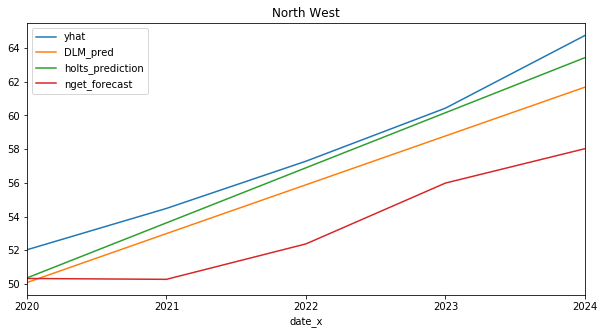

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

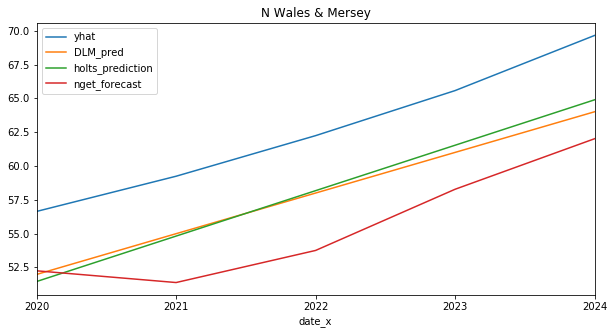

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

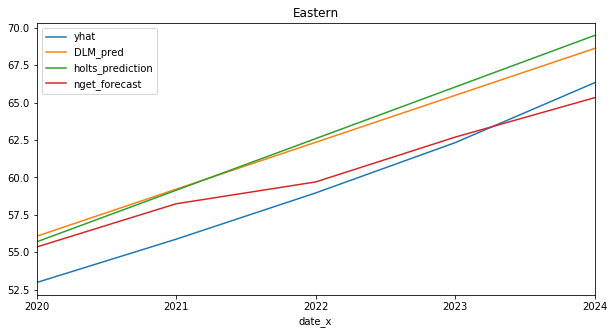

<Figure size 720x720 with 0 Axes>

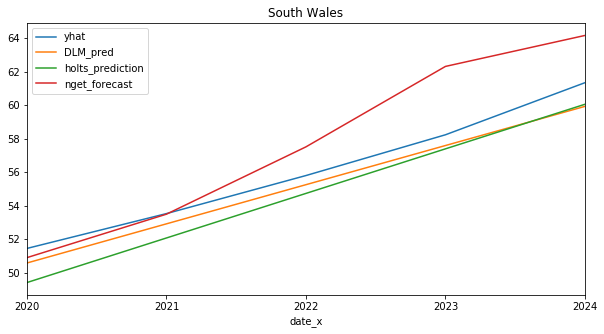

<Figure size 720x720 with 0 Axes>

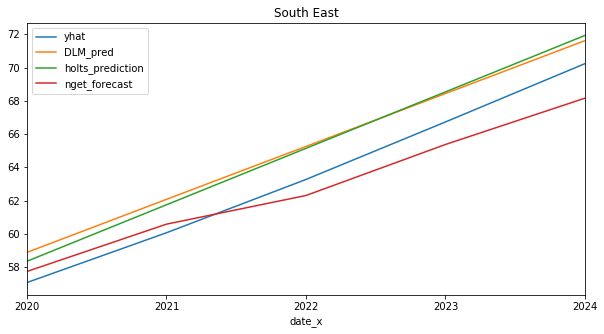

<Figure size 720x720 with 0 Axes>

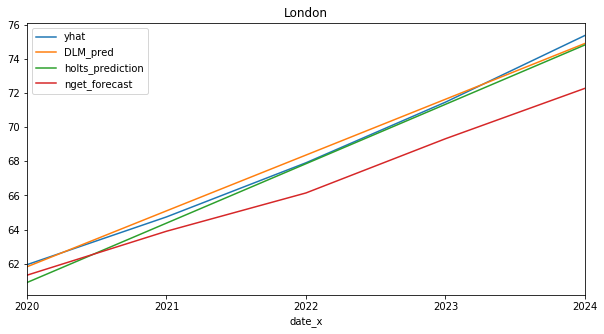

<Figure size 720x720 with 0 Axes>

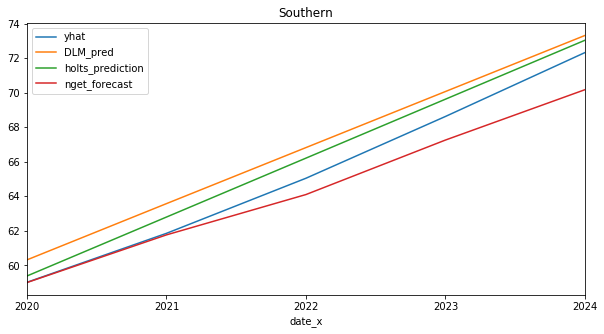

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

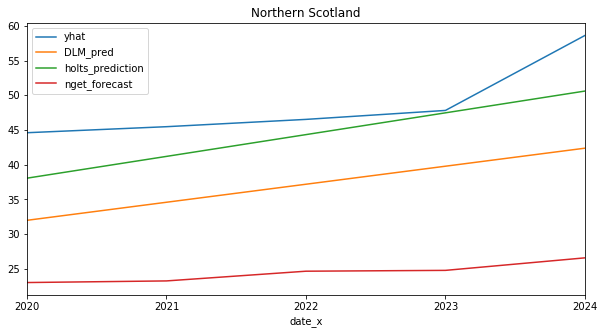

In [803]:
for zone in zones:
    temp = my_pred[my_pred.zone_name == zone]
    temp.set_index("date_x",inplace=True)
    plt.figure(figsize=(10,10))
    temp[["yhat","DLM_pred","holts_prediction","nget_forecast"]].plot(figsize=(10,5),title=zone)
    plt.show()

In [65]:
df_to_stack = my_pred[["holts_prediction","yhat","nget_forecast","DLM_pred"]]
df_to_stack

holts_prediction       yhat nget_forecast   DLM_pred
0          38.257336  34.486345       30.9748  33.928007
1          40.880827  35.441629       32.3105  36.112865
2          43.504318  36.661239       33.5333  38.274099
3          46.127808  38.269197       33.4249  40.439512
4          48.751299  45.155598        35.674  42.604185
..               ...        ...           ...        ...
65         38.059680  44.603480       23.0334  31.992232
66         41.195316  45.471561       23.2669  34.592107
67         44.330953  46.523341       24.6656  37.187090
68         47.466589  47.813031       24.7851  39.782516
69         50.602226  58.608861       26.5878  42.377902

[70 rows x 4 columns]

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [71]:
reg = RandomForestRegressor(n_estimators=50)

In [72]:
X = df_to_stack.drop("nget_forecast",axis=1)
y = df_to_stack.nget_forecast
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [73]:
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [74]:
reg.score(X_test,y_test)

0.9527466584225671

Text(0.5, 0, 'Model')

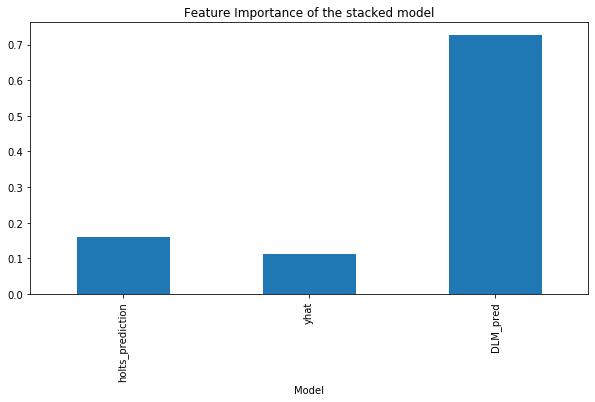

In [75]:
pd.Series(reg.feature_importances_,index = X.columns).plot(kind="bar",title="Feature Importance of the stacked model",figsize = (10,5))
plt.xlabel("Model")

#### From here we can see that the most important predictors of them was the DLM predictions

## Predictions on the test set(maybe not significant, maybe luck)

In [76]:
stack_pred = pd.DataFrame(reg.predict(X_test),columns=["Stack_prediction"])
stack_pred["nget_forecast"] = np.array(y_test)

In [77]:
stack_pred

Stack_prediction nget_forecast
0         58.503741       53.7511
1         31.408328       30.9748
2         68.733400       68.1611
3         29.780952        35.674
4         69.595289       72.2738
5         57.125707       56.0313
6         50.171143       50.3203

### Trying to average them to see the predictions

In [78]:
def get_average_forecast(j):
    return (j.holts_prediction + j.yhat + j.DLM_pred)/3

In [79]:
my_pred["avg_forecast"] = my_pred.apply(get_average_forecast,axis=1)
my_pred

date_x  holts_prediction          zone_name       yhat  yhat_lower  \
0  2020-12-31         38.257336  Southern Scotland  34.486345   27.748197   
1  2021-12-31         40.880827  Southern Scotland  35.441629   28.039130   
2  2022-12-31         43.504318  Southern Scotland  36.661239   29.892701   
3  2023-12-31         46.127808  Southern Scotland  38.269197   31.446878   
4  2024-12-31         48.751299  Southern Scotland  45.155598   38.323055   
..        ...               ...                ...        ...         ...   
65 2020-12-31         38.059680  Northern Scotland  44.603480   34.838639   
66 2021-12-31         41.195316  Northern Scotland  45.471561   35.474577   
67 2022-12-31         44.330953  Northern Scotland  46.523341   35.959672   
68 2023-12-31         47.466589  Northern Scotland  47.813031   38.052079   
69 2024-12-31         50.602226  Northern Scotland  58.608861   49.032689   

    yhat_upper nget_forecast   DLM_pred  avg_forecast  
0    40.903101       30.9748  33.928007     35.557229  
1    43.103727       32.3105  36.112865     37.478440  
2    43.777662       33.5333  38.274099     39.479885  
3    45.291896       33.4249  40.439512     41.612172  
4    52.870293        35.674  42.604185     45.503694  
..         ...           ...        ...           ...  
65   54.080371       23.0334  31.992232     38.218464  
66   55.793207       23.2669  34.592107     40.419661  
67   55.738728       24.6656  37.187090     42.680461  
68   57.566183       24.7851  39.782516     45.020712  
69   68.523030       26.5878  42.377902     50.529663  

[70 rows x 9 columns]

In [80]:
sns.distplot(my_pred.holts_prediction,kde=False)
sns.distplot(my_pred.yhat,kde=False)
sns.distplot(my_pred.nget_forecast)
plt.legend(["holts","prophet","nget"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

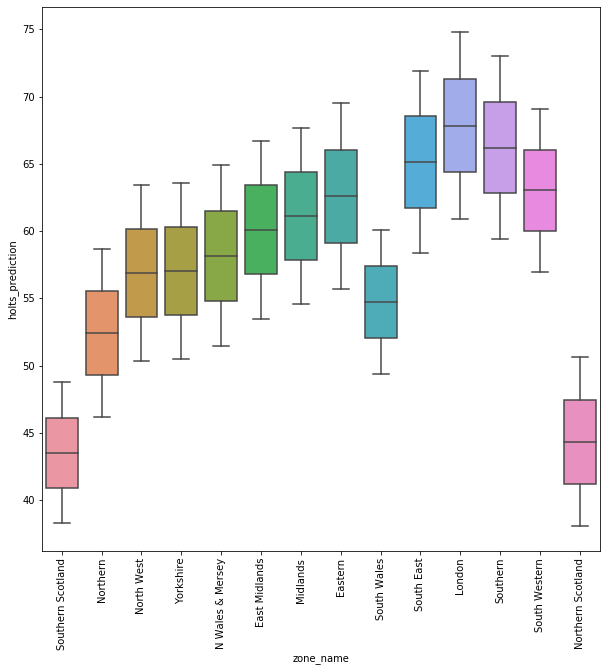

In [82]:
plt.figure(figsize=(10,10)) 
sns.boxplot(x="zone_name",y="holts_prediction",data=my_pred)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

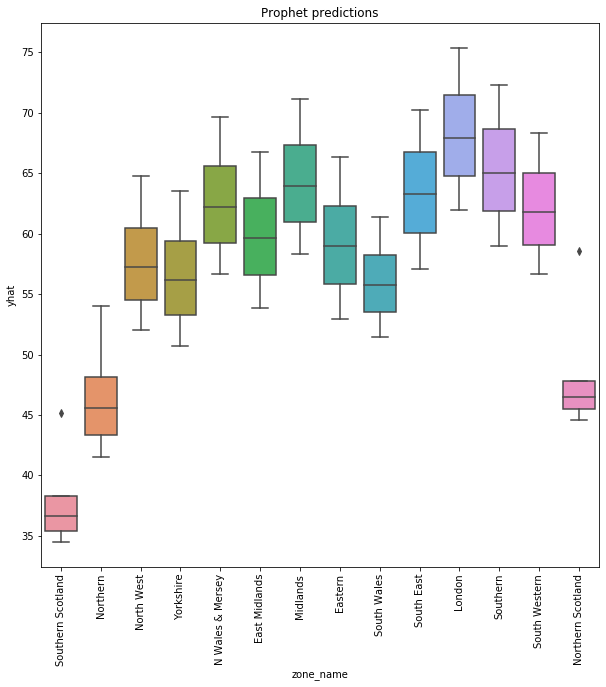

In [86]:
plt.figure(figsize=(10,10))
sns.boxplot(x="zone_name",y="yhat",data=my_pred)
plt.title("Prophet predictions")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

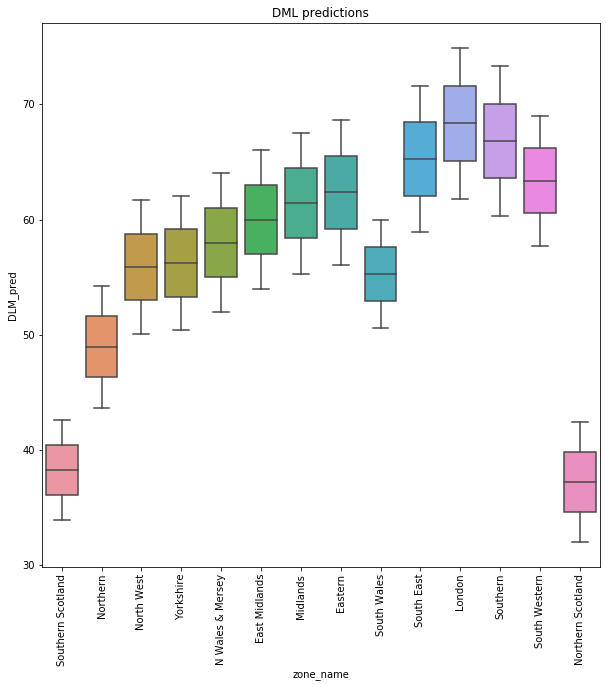

In [89]:
plt.figure(figsize=(10,10))
sns.boxplot(x="zone_name",y="DLM_pred",data=my_pred)
plt.title("DLM predictions")
plt.xticks(rotation=90)